##### Energy spectra in 3D in time

In [1]:
import os
import sys
import gc
import math as m
import numpy as np
import scipy
import pandas as pd
import pylab
from scipy import *
from scipy.signal import butter, filtfilt, hilbert
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
sys.path.append('/projects/DEIKE/cmartinb/jupyter_notebook/project_specific/turbulence')
sys.path.append('/projects/DEIKE/cmartinb/functions')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from prepare import load_object, save_object, field
from defs import Case, Interface2D
from phase import extract_phase
from funciones import * 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab
import numpy as np
from scipy.signal import find_peaks
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from branches import * 
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
os.chdir('/projects/DEIKE/cmartinb/')

In [2]:
params = {'legend.fontsize': 'x-Large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 30,
         'axes.titlesize':30,
         'xtick.labelsize':30,
         'ytick.labelsize':30,
    'font.family': 'STIXGeneral', 
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': True, # Enable LaTeX rendering
}

plt.rcParams.update(params)
pylab.rcParams.update(params)

In [3]:
# DEFINE CASE SO WE CAN AUTHOMATIZE IT 
kpHs = '0p3' # 0p16 
dt = '0p2'
uoc = '0p50' # 0p50 0p75
kp='0p157'
reW = '2.5e4' #1.0e5
g = '9p8'
'''
reA = 720
#maxLevel = 10
maxLevel = 10
Bo=200

if reW == '1.0e5':
    Re_water = 1 * 10**5
else:
    Re_water = 2.5 * 10**4


N = 1024

u = 0.25
lambdap = 2*m.pi/kp

rho1 = 1
rho2 = 1.25*10**(-3)

L0 = 2*np.pi;

ak,  c, omegap, nu_water, g, uoc_val, sigma, Tp= calculate_parameters(kpHs, uoc , u ,kp, Bo, rho1, rho2)
print('ak is', ak, 'c is' ,c, 'w_p$ is', omegap, '$\nu_w$ is' , nu_water, 'g is' ,g, 'N', N)
'''

"\nreA = 720\n#maxLevel = 10\nmaxLevel = 10\nBo=200\n\nif reW == '1.0e5':\n    Re_water = 1 * 10**5\nelse:\n    Re_water = 2.5 * 10**4\n\n\nN = 1024\n\nu = 0.25\nlambdap = 2*m.pi/kp\n\nrho1 = 1\nrho2 = 1.25*10**(-3)\n\nL0 = 2*np.pi;\n\nak,  c, omegap, nu_water, g, uoc_val, sigma, Tp= calculate_parameters(kpHs, uoc , u ,kp, Bo, rho1, rho2)\nprint('ak is', ak, 'c is' ,c, 'w_p$ is', omegap, '$\nu_w$ is' , nu_water, 'g is' ,g, 'N', N)\n"

In [4]:
graph_path = f'/projects/DEIKE/cmartinb/notebooks/graphs/rui_kpHs{kpHs}_dt{dt}_kp{kp}_g{g}/3Dspectra/'
if not os.path.exists(graph_path):
    os.makedirs(graph_path)

In [5]:
work_dir = f'/projects/DEIKE/cmartinb/Ruidata/surface_kpHs{kpHs}_dt{dt}_kp{kp}_g{g}/'

In [6]:
import h5py
h5_path = f'/projects/DEIKE/cmartinb/eta/rui_eta_series_kpHs0p3_dt0p2_kp0p157_g9p8.h5'
with h5py.File(h5_path, 'r') as f:
    # Carga todo el array en memoria (igual que np.load)
    eta_series = f['eta'][:]  

print(eta_series.shape)

(1520, 1024, 1024)


In [7]:
t = np.arange(0, eta_series.shape[0], 0.2)
tstart = t[0]
print(t[150], t.shape)

30.0 (7600,)


In [8]:
print(t[200], t.shape)

40.0 (7600,)


In [9]:
print(eta_series.shape[1])
data = eta_series

1024


In [40]:
lambdap = 40
kp = 2*m.pi/lambdap
omegap = np.sqrt(g*kp)
print(omegap)

1.2404031602668546


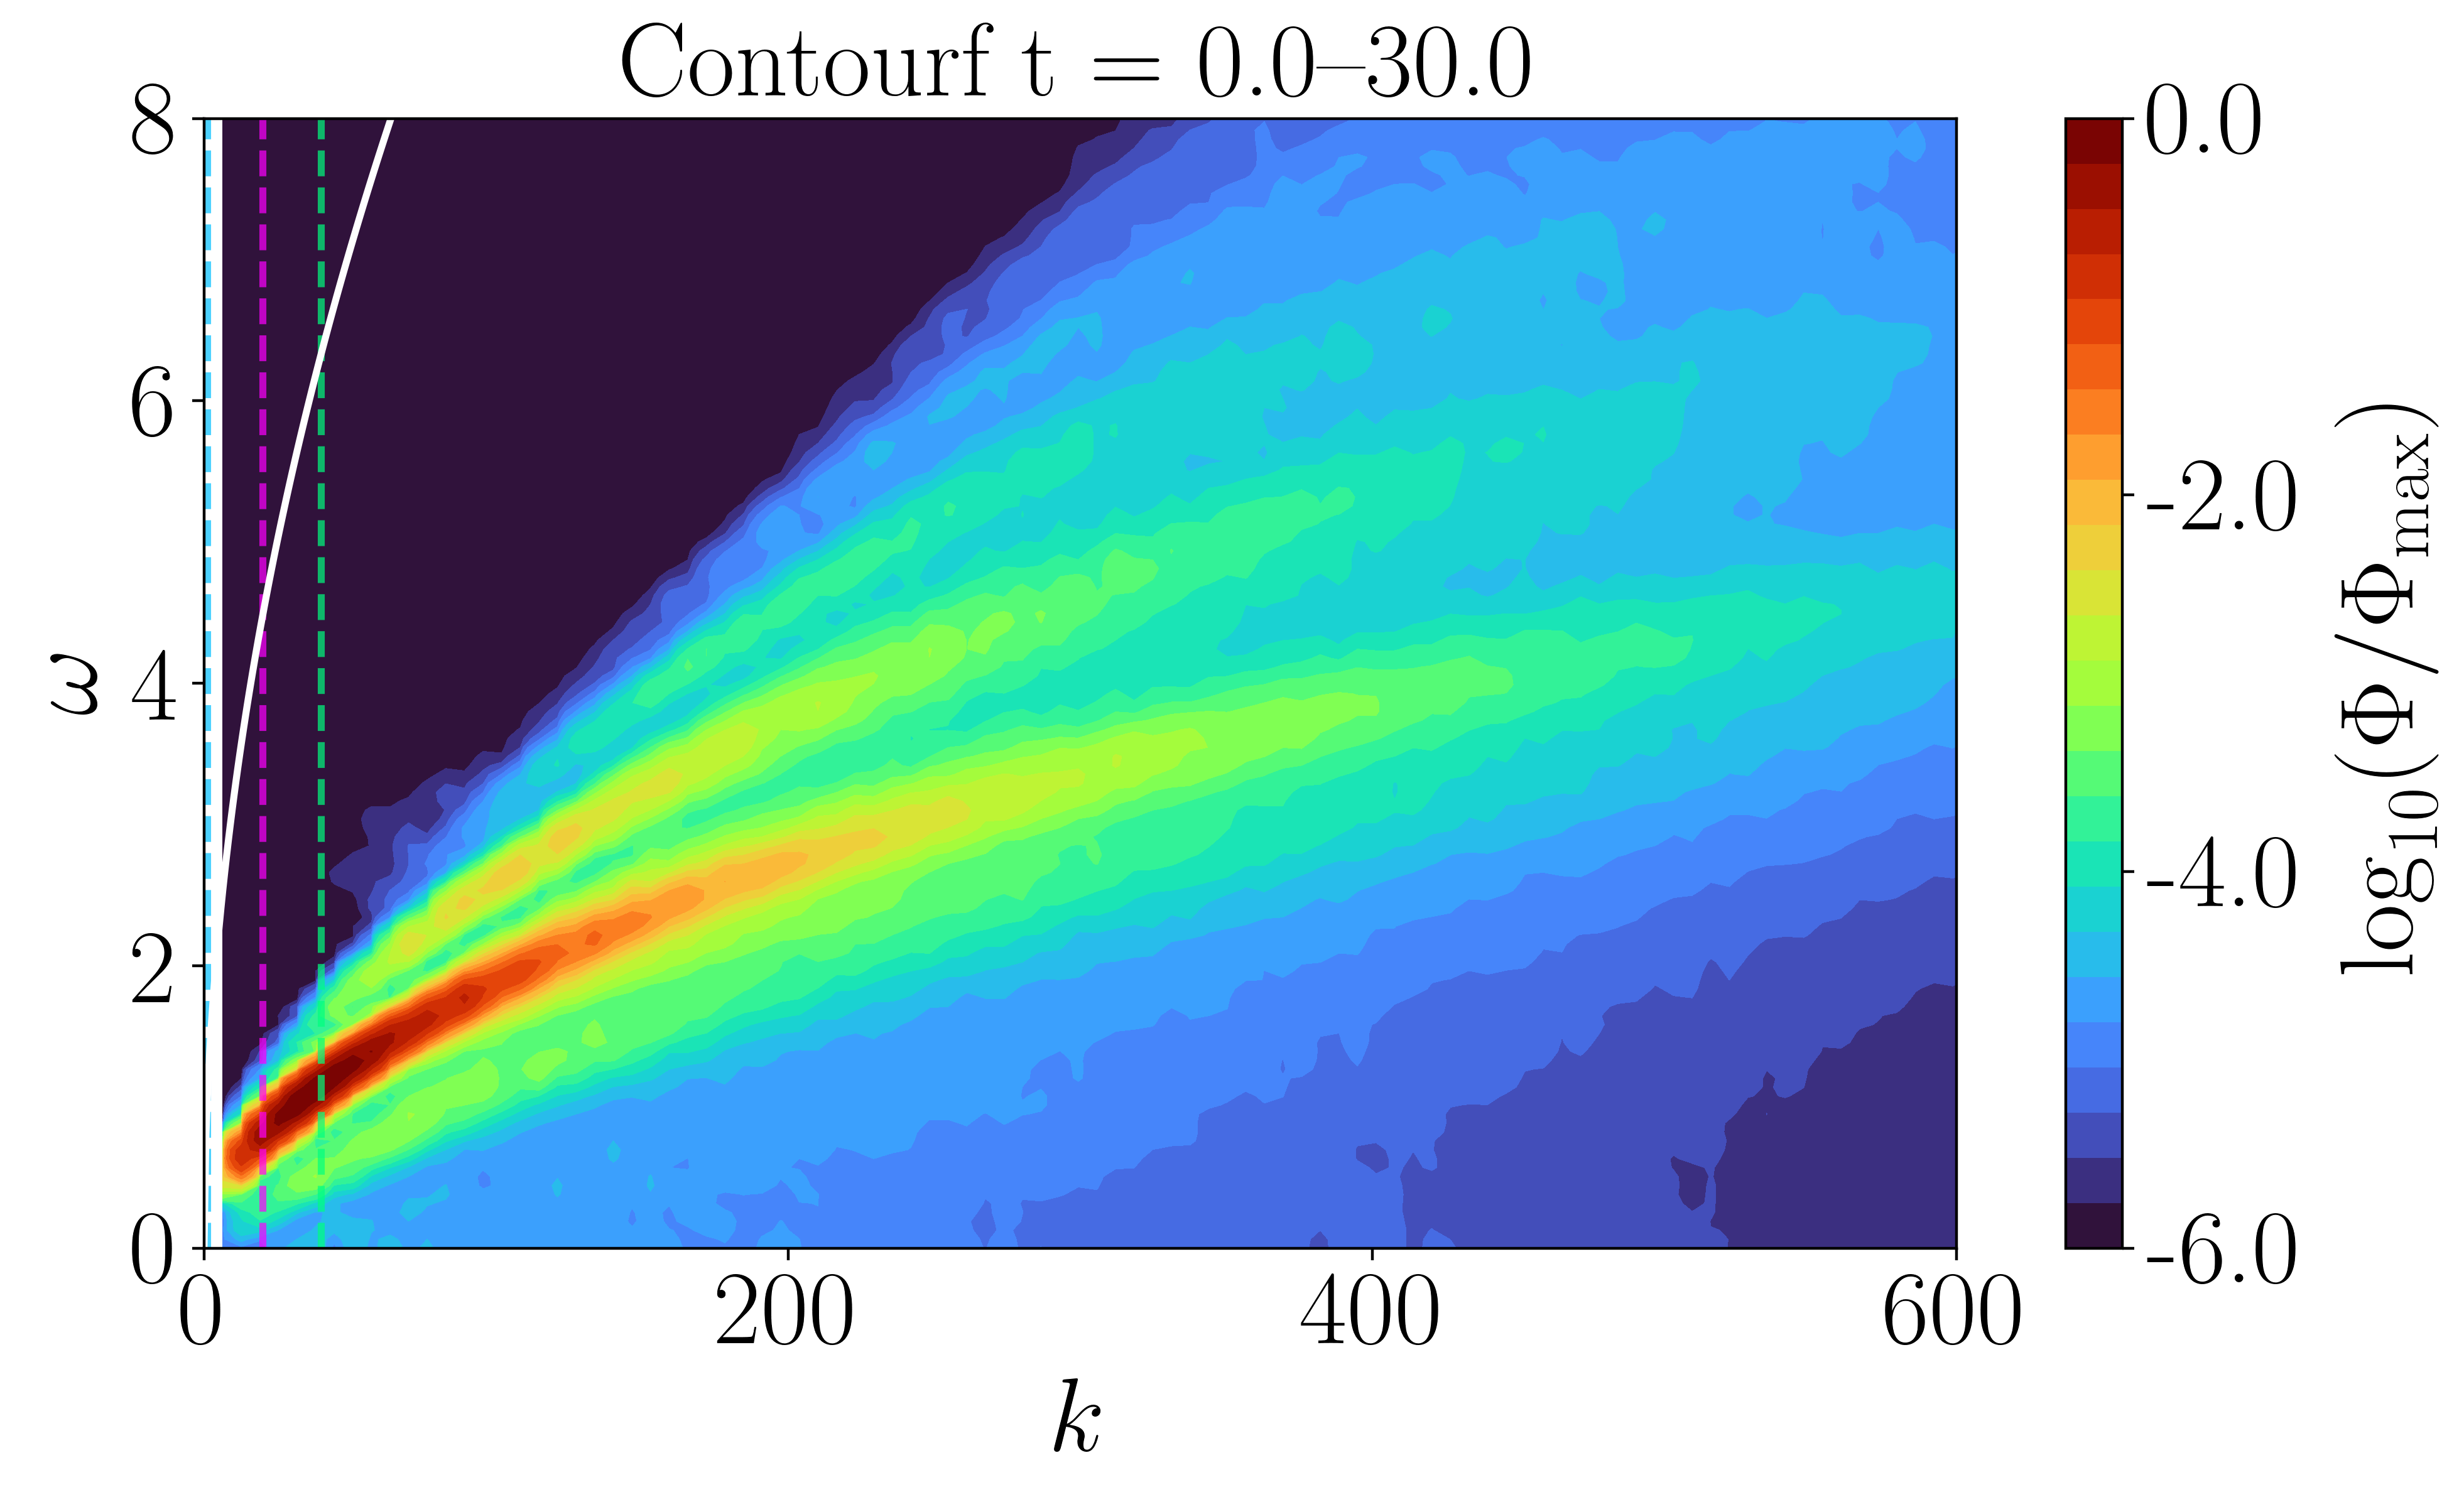

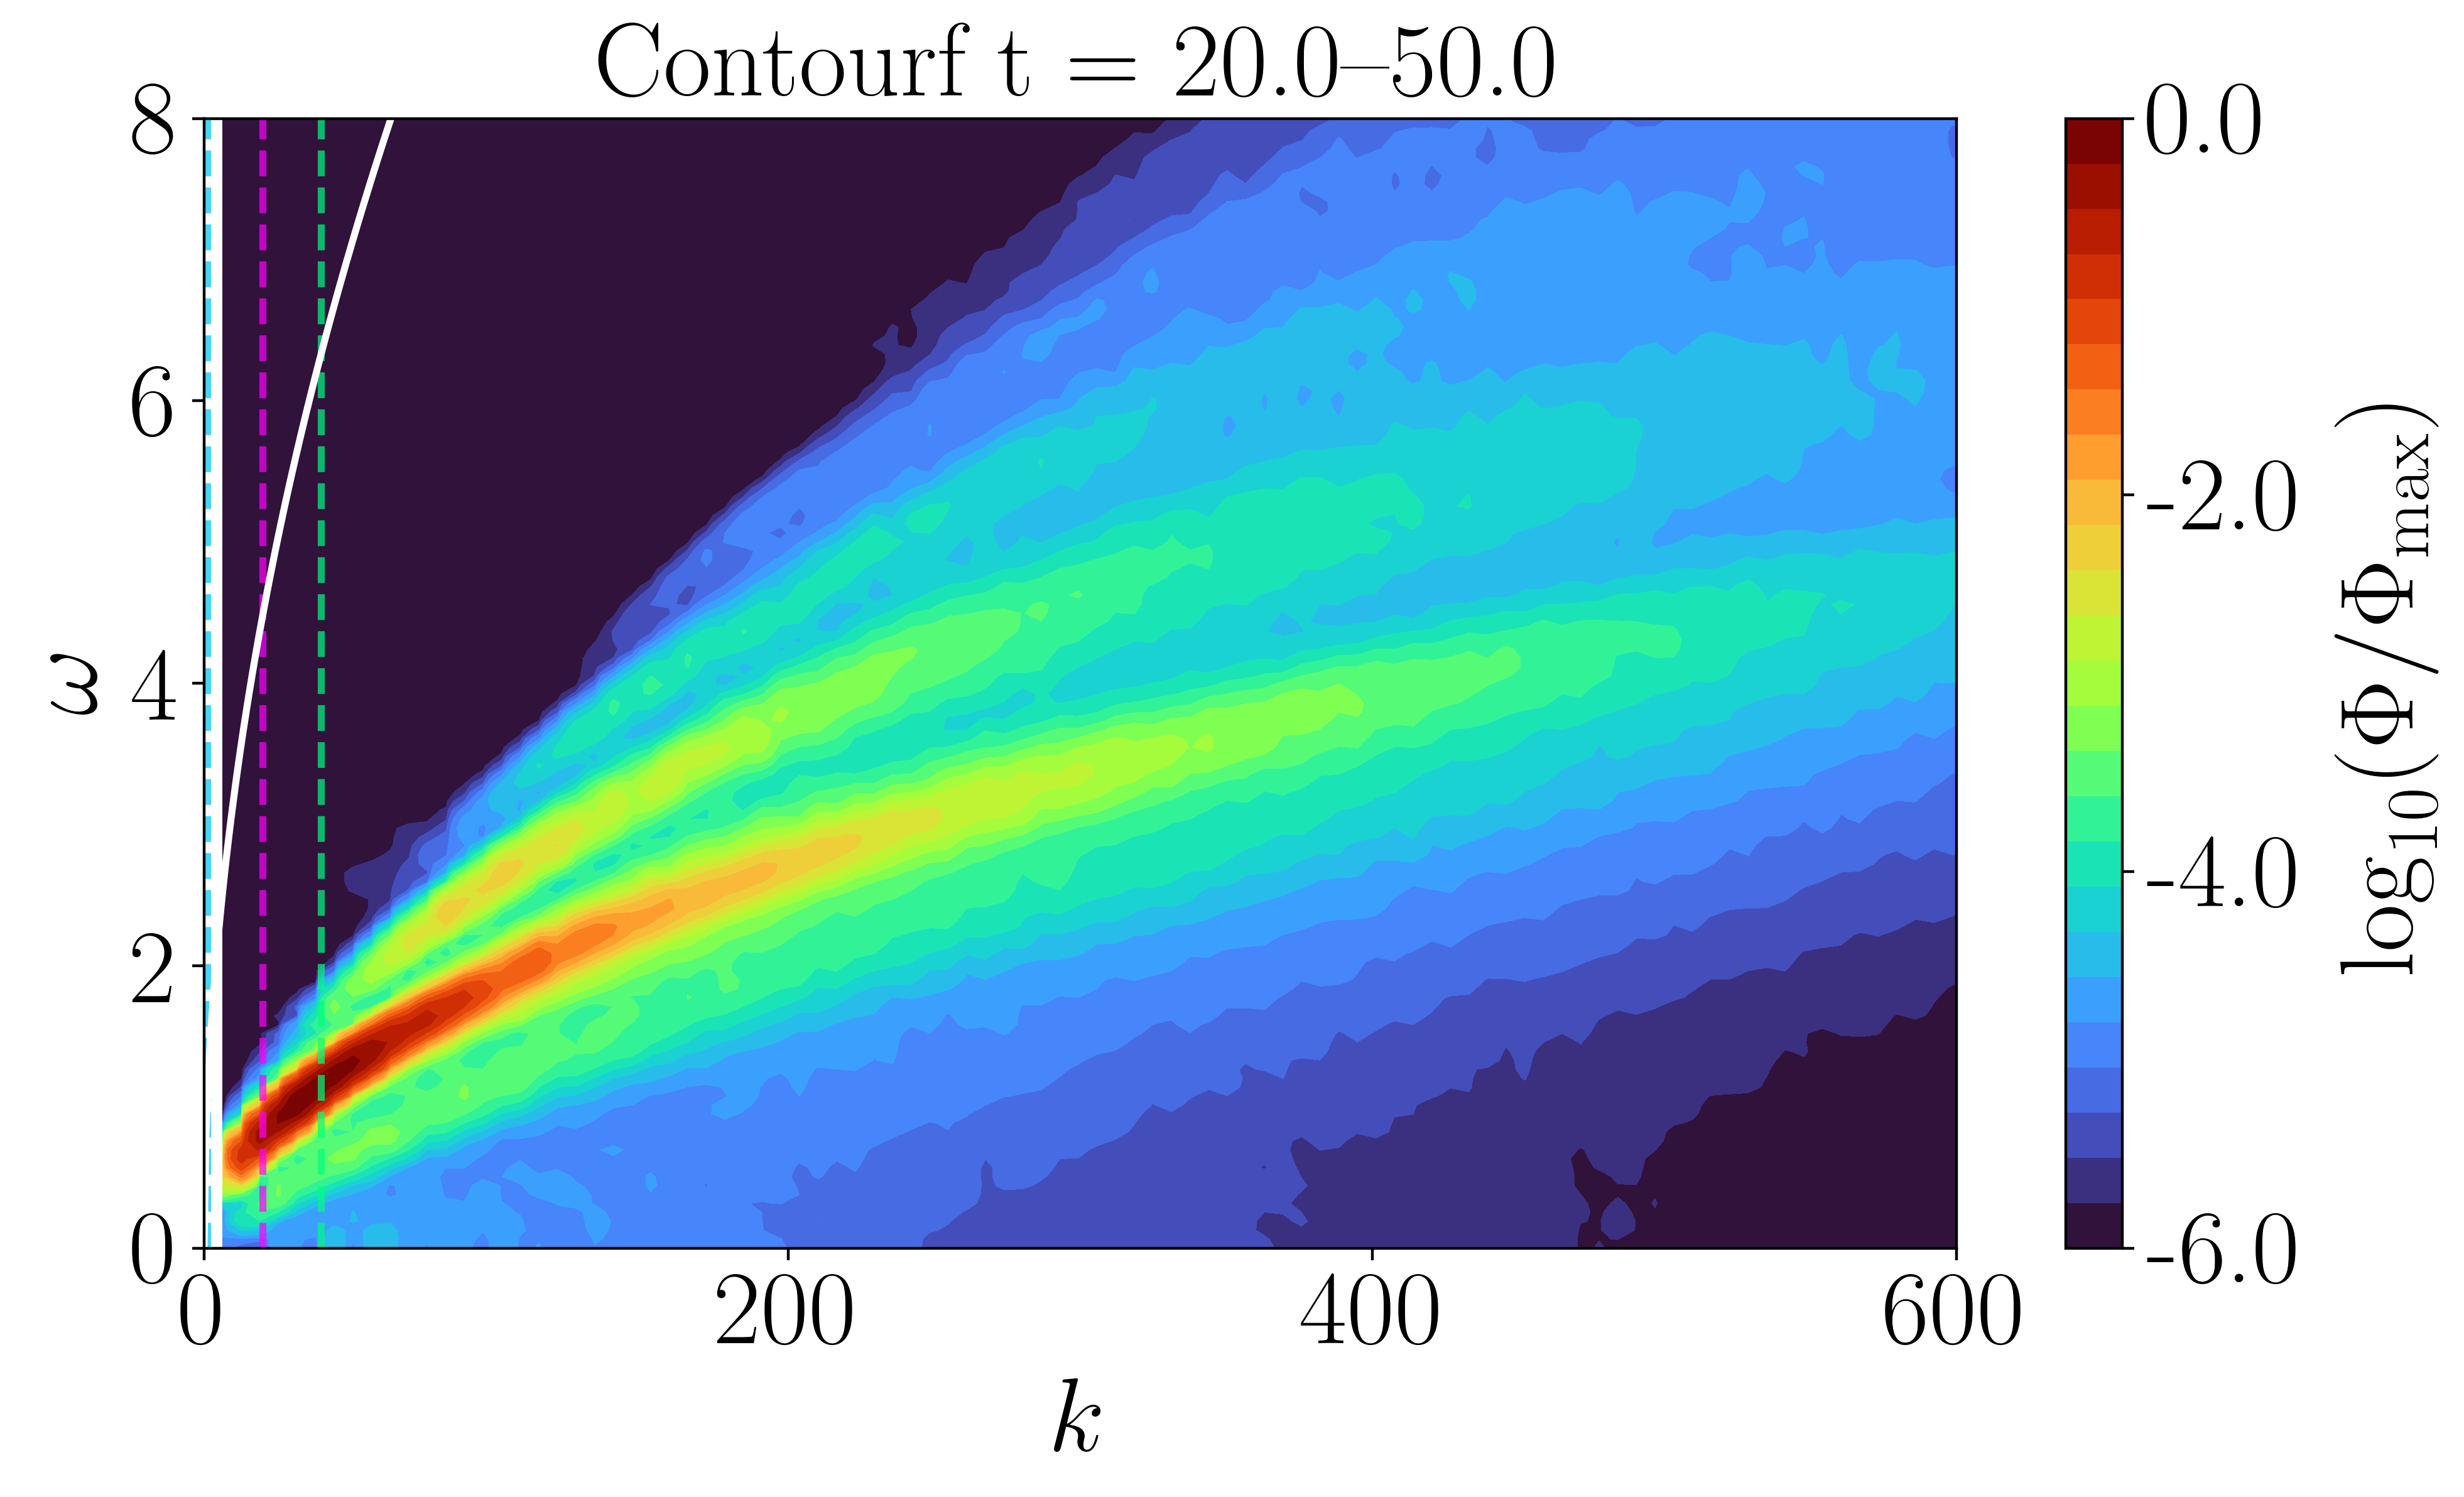

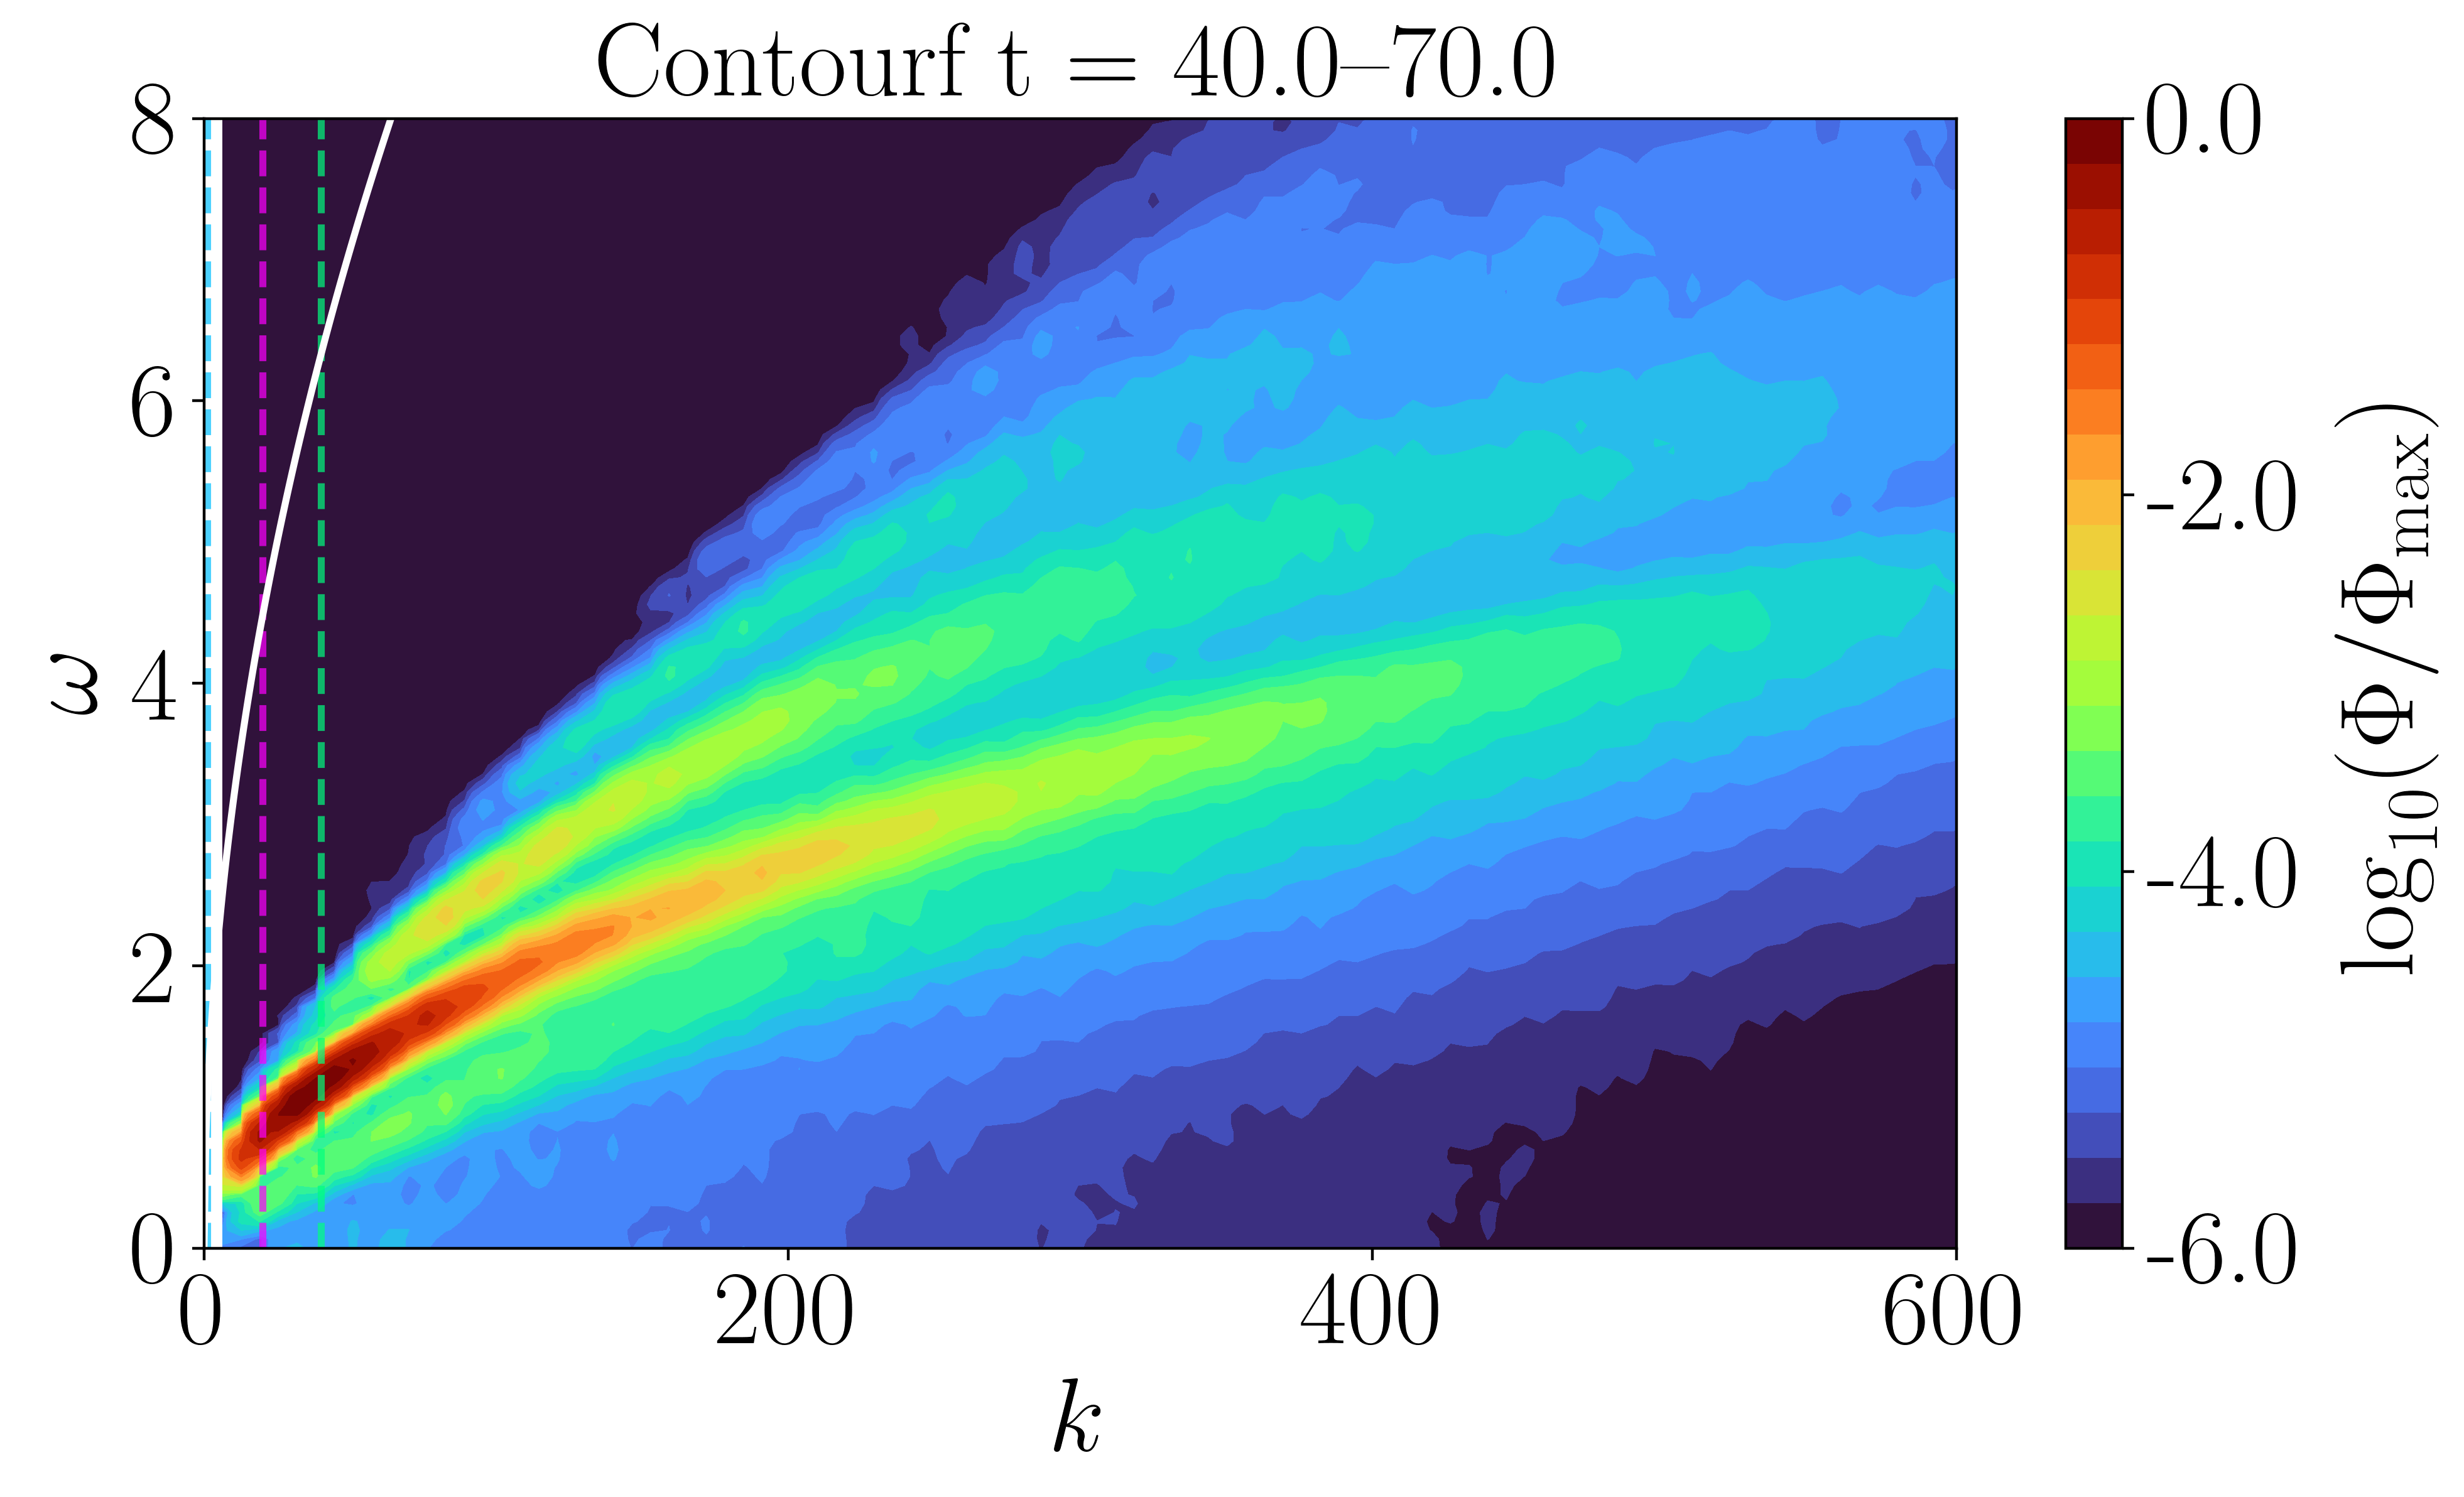

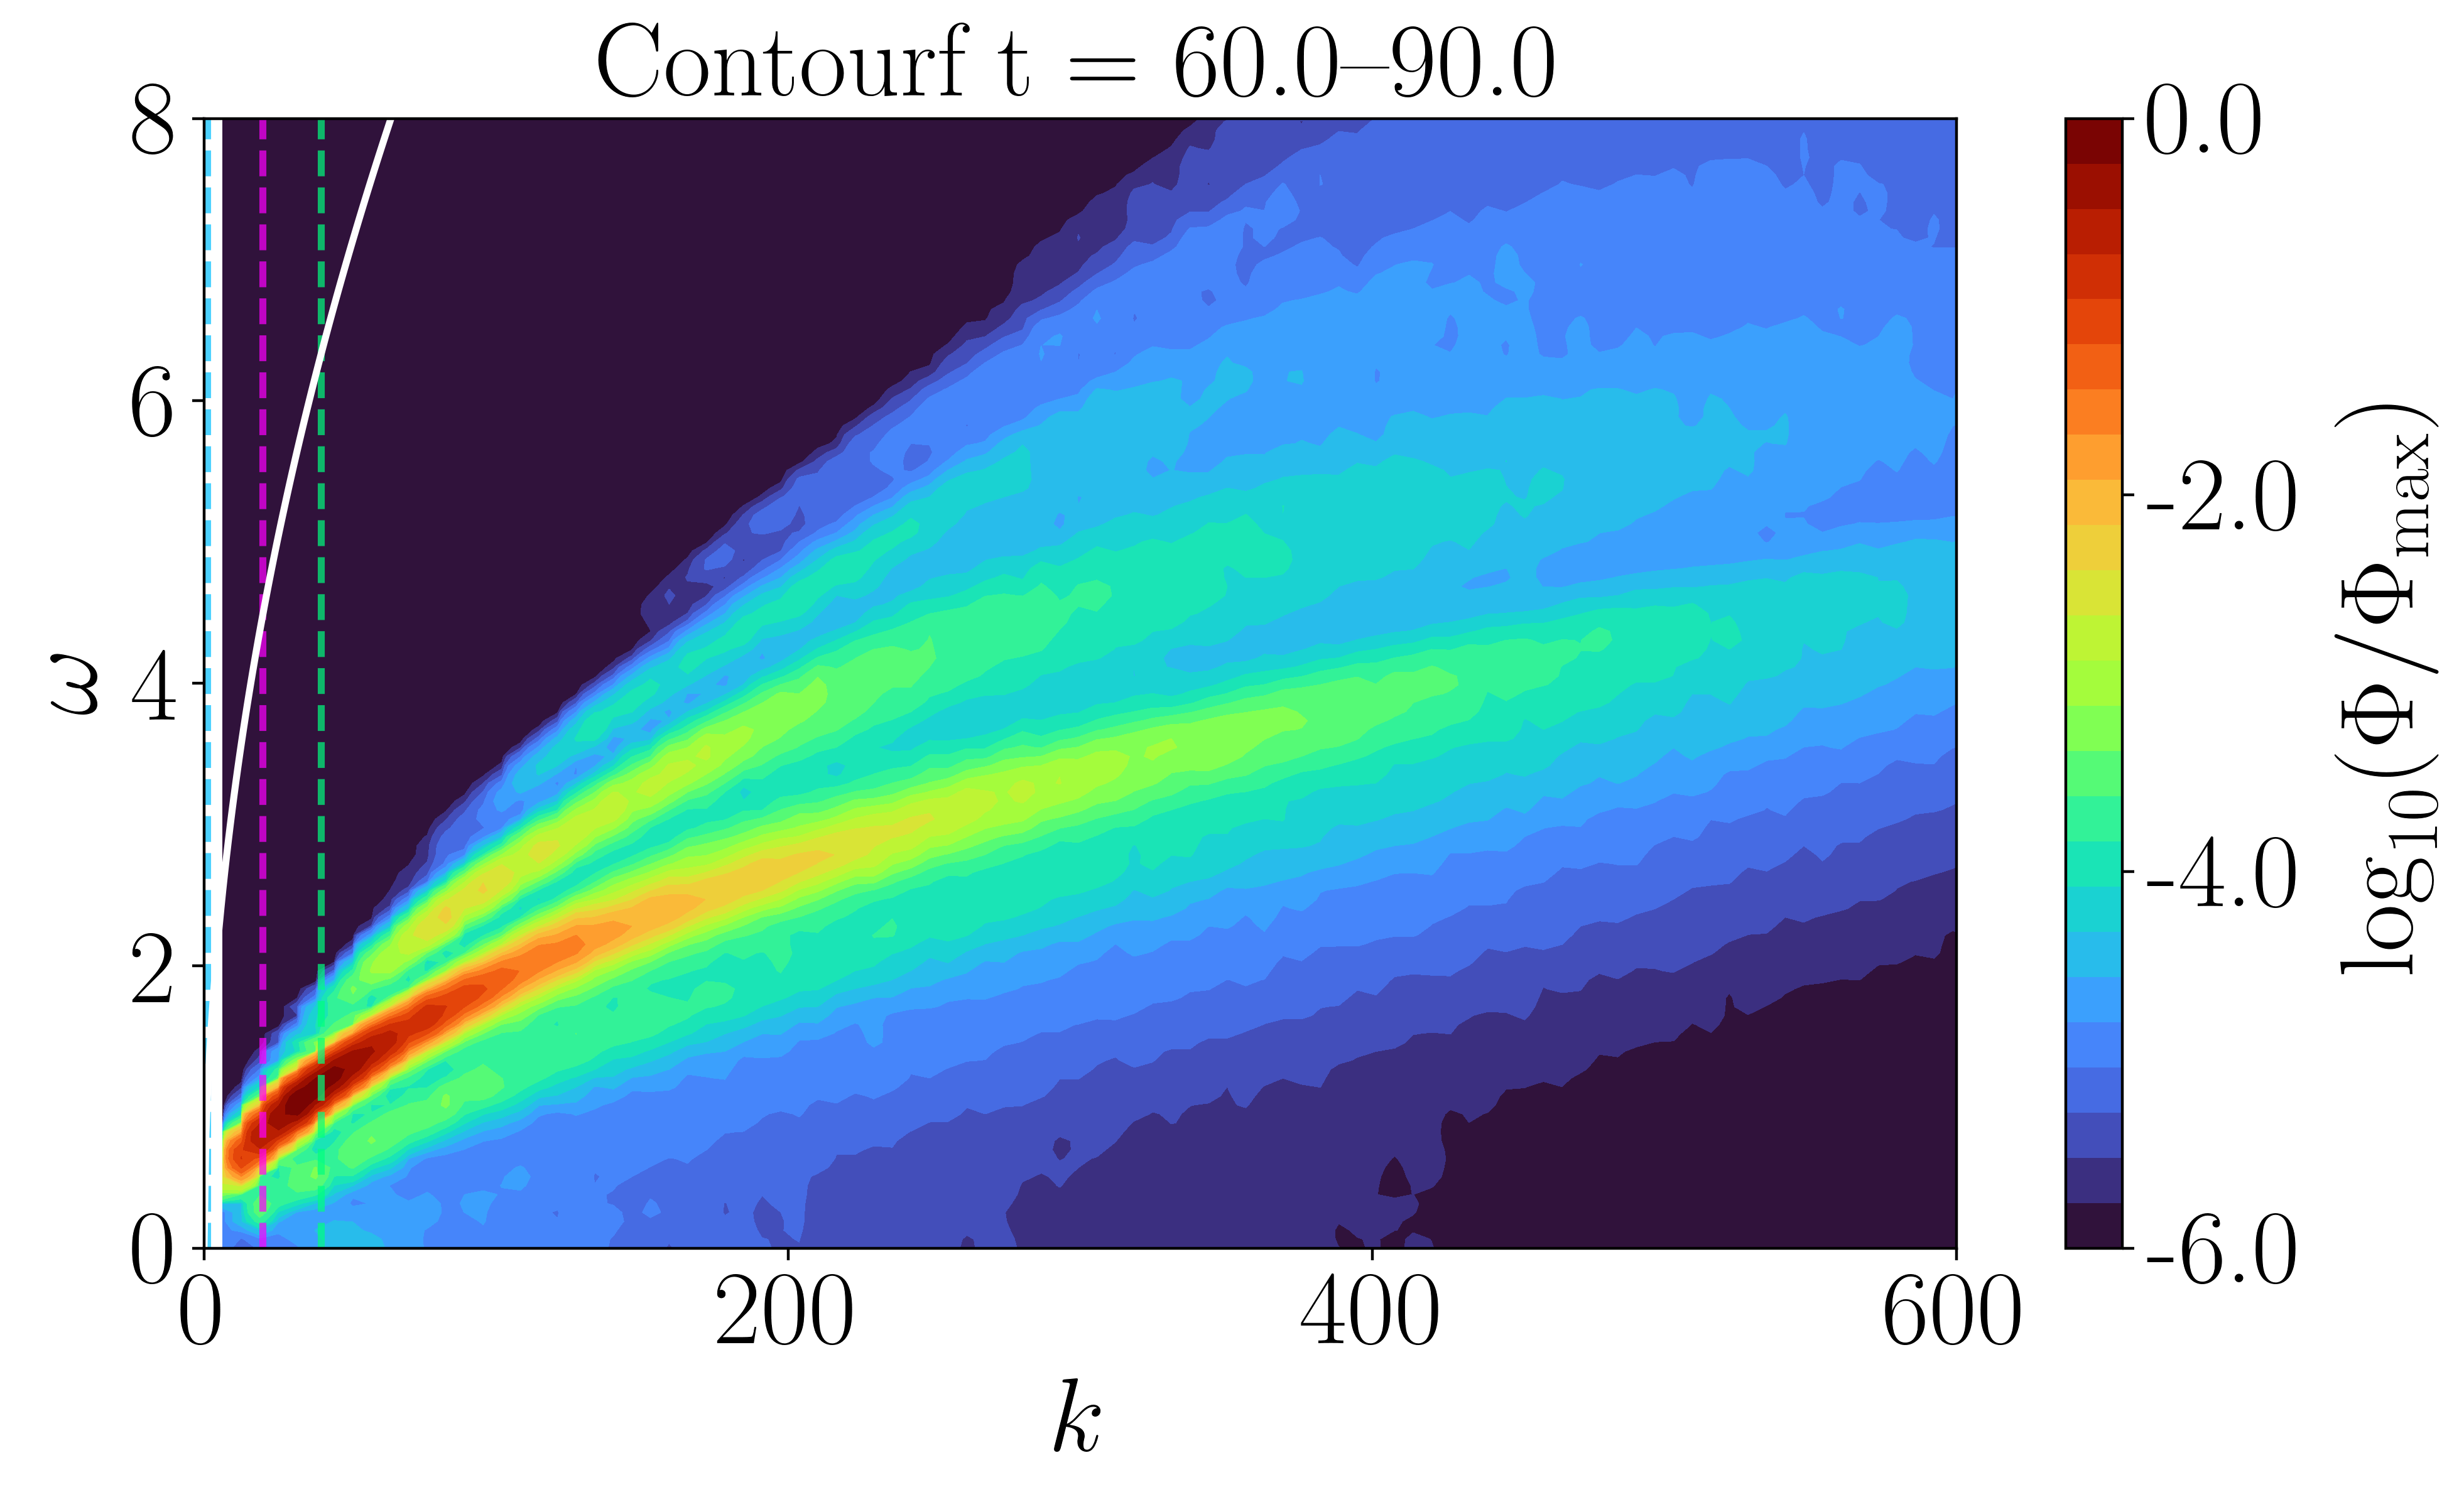

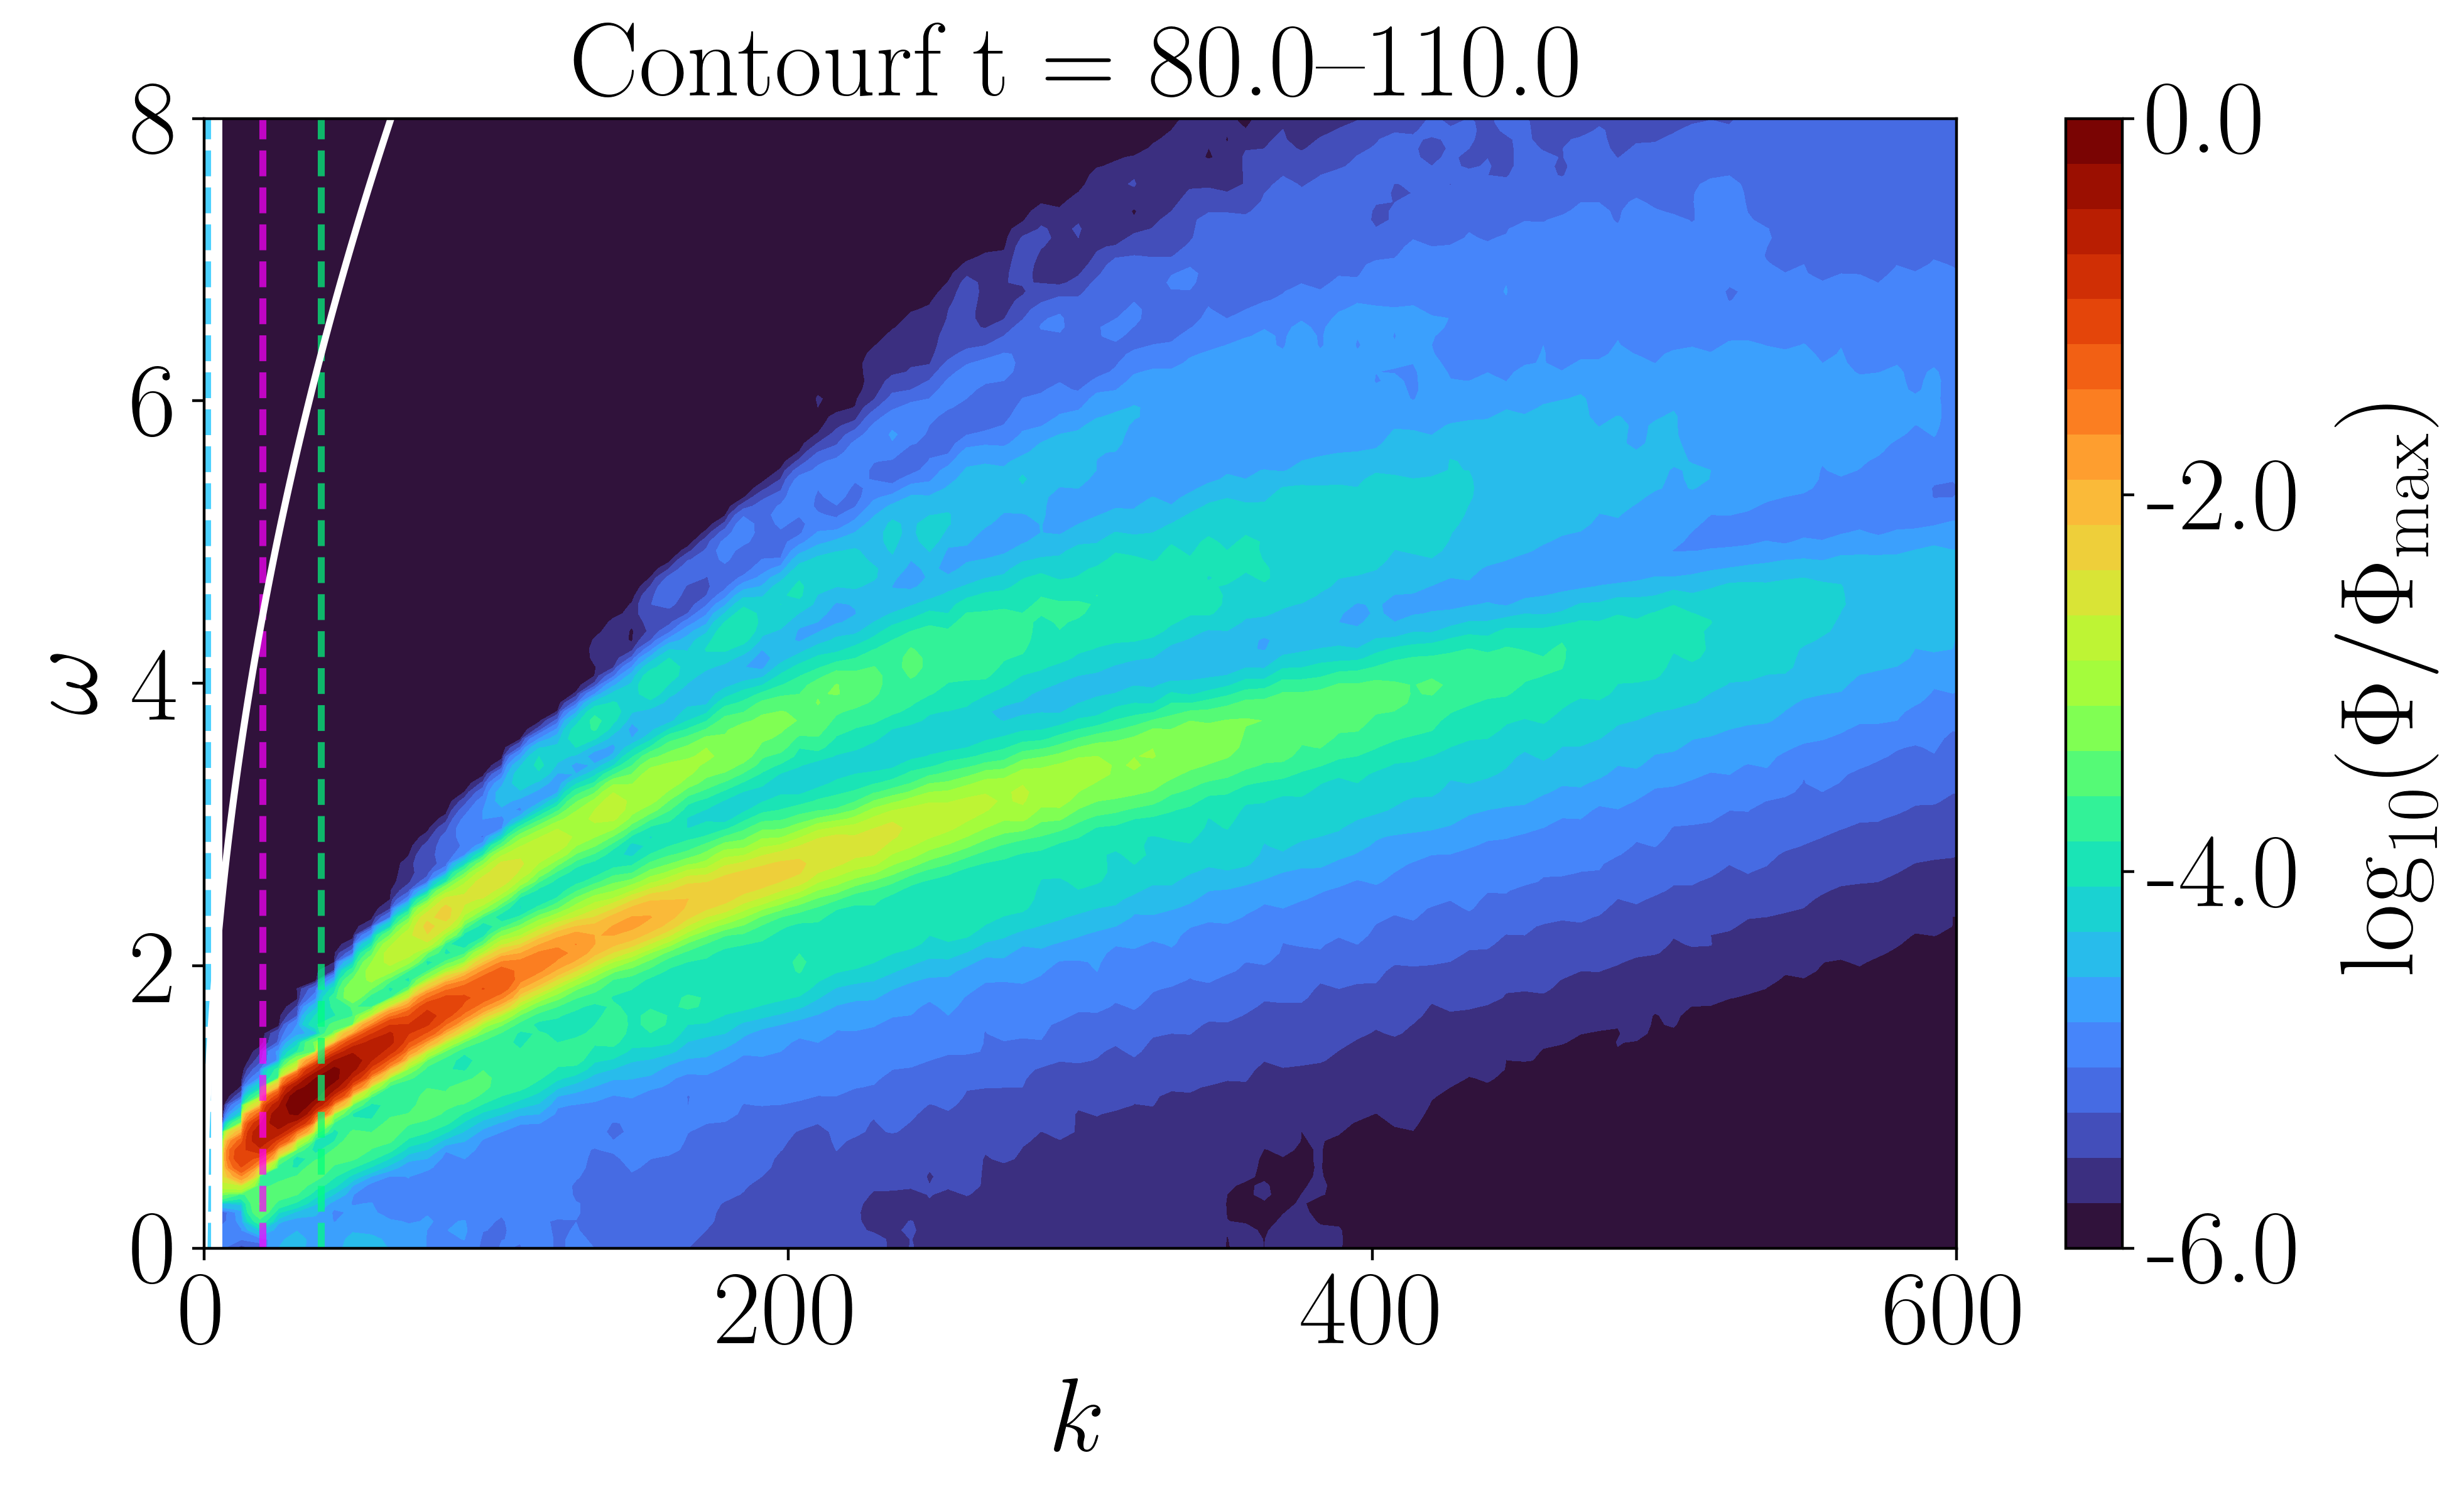

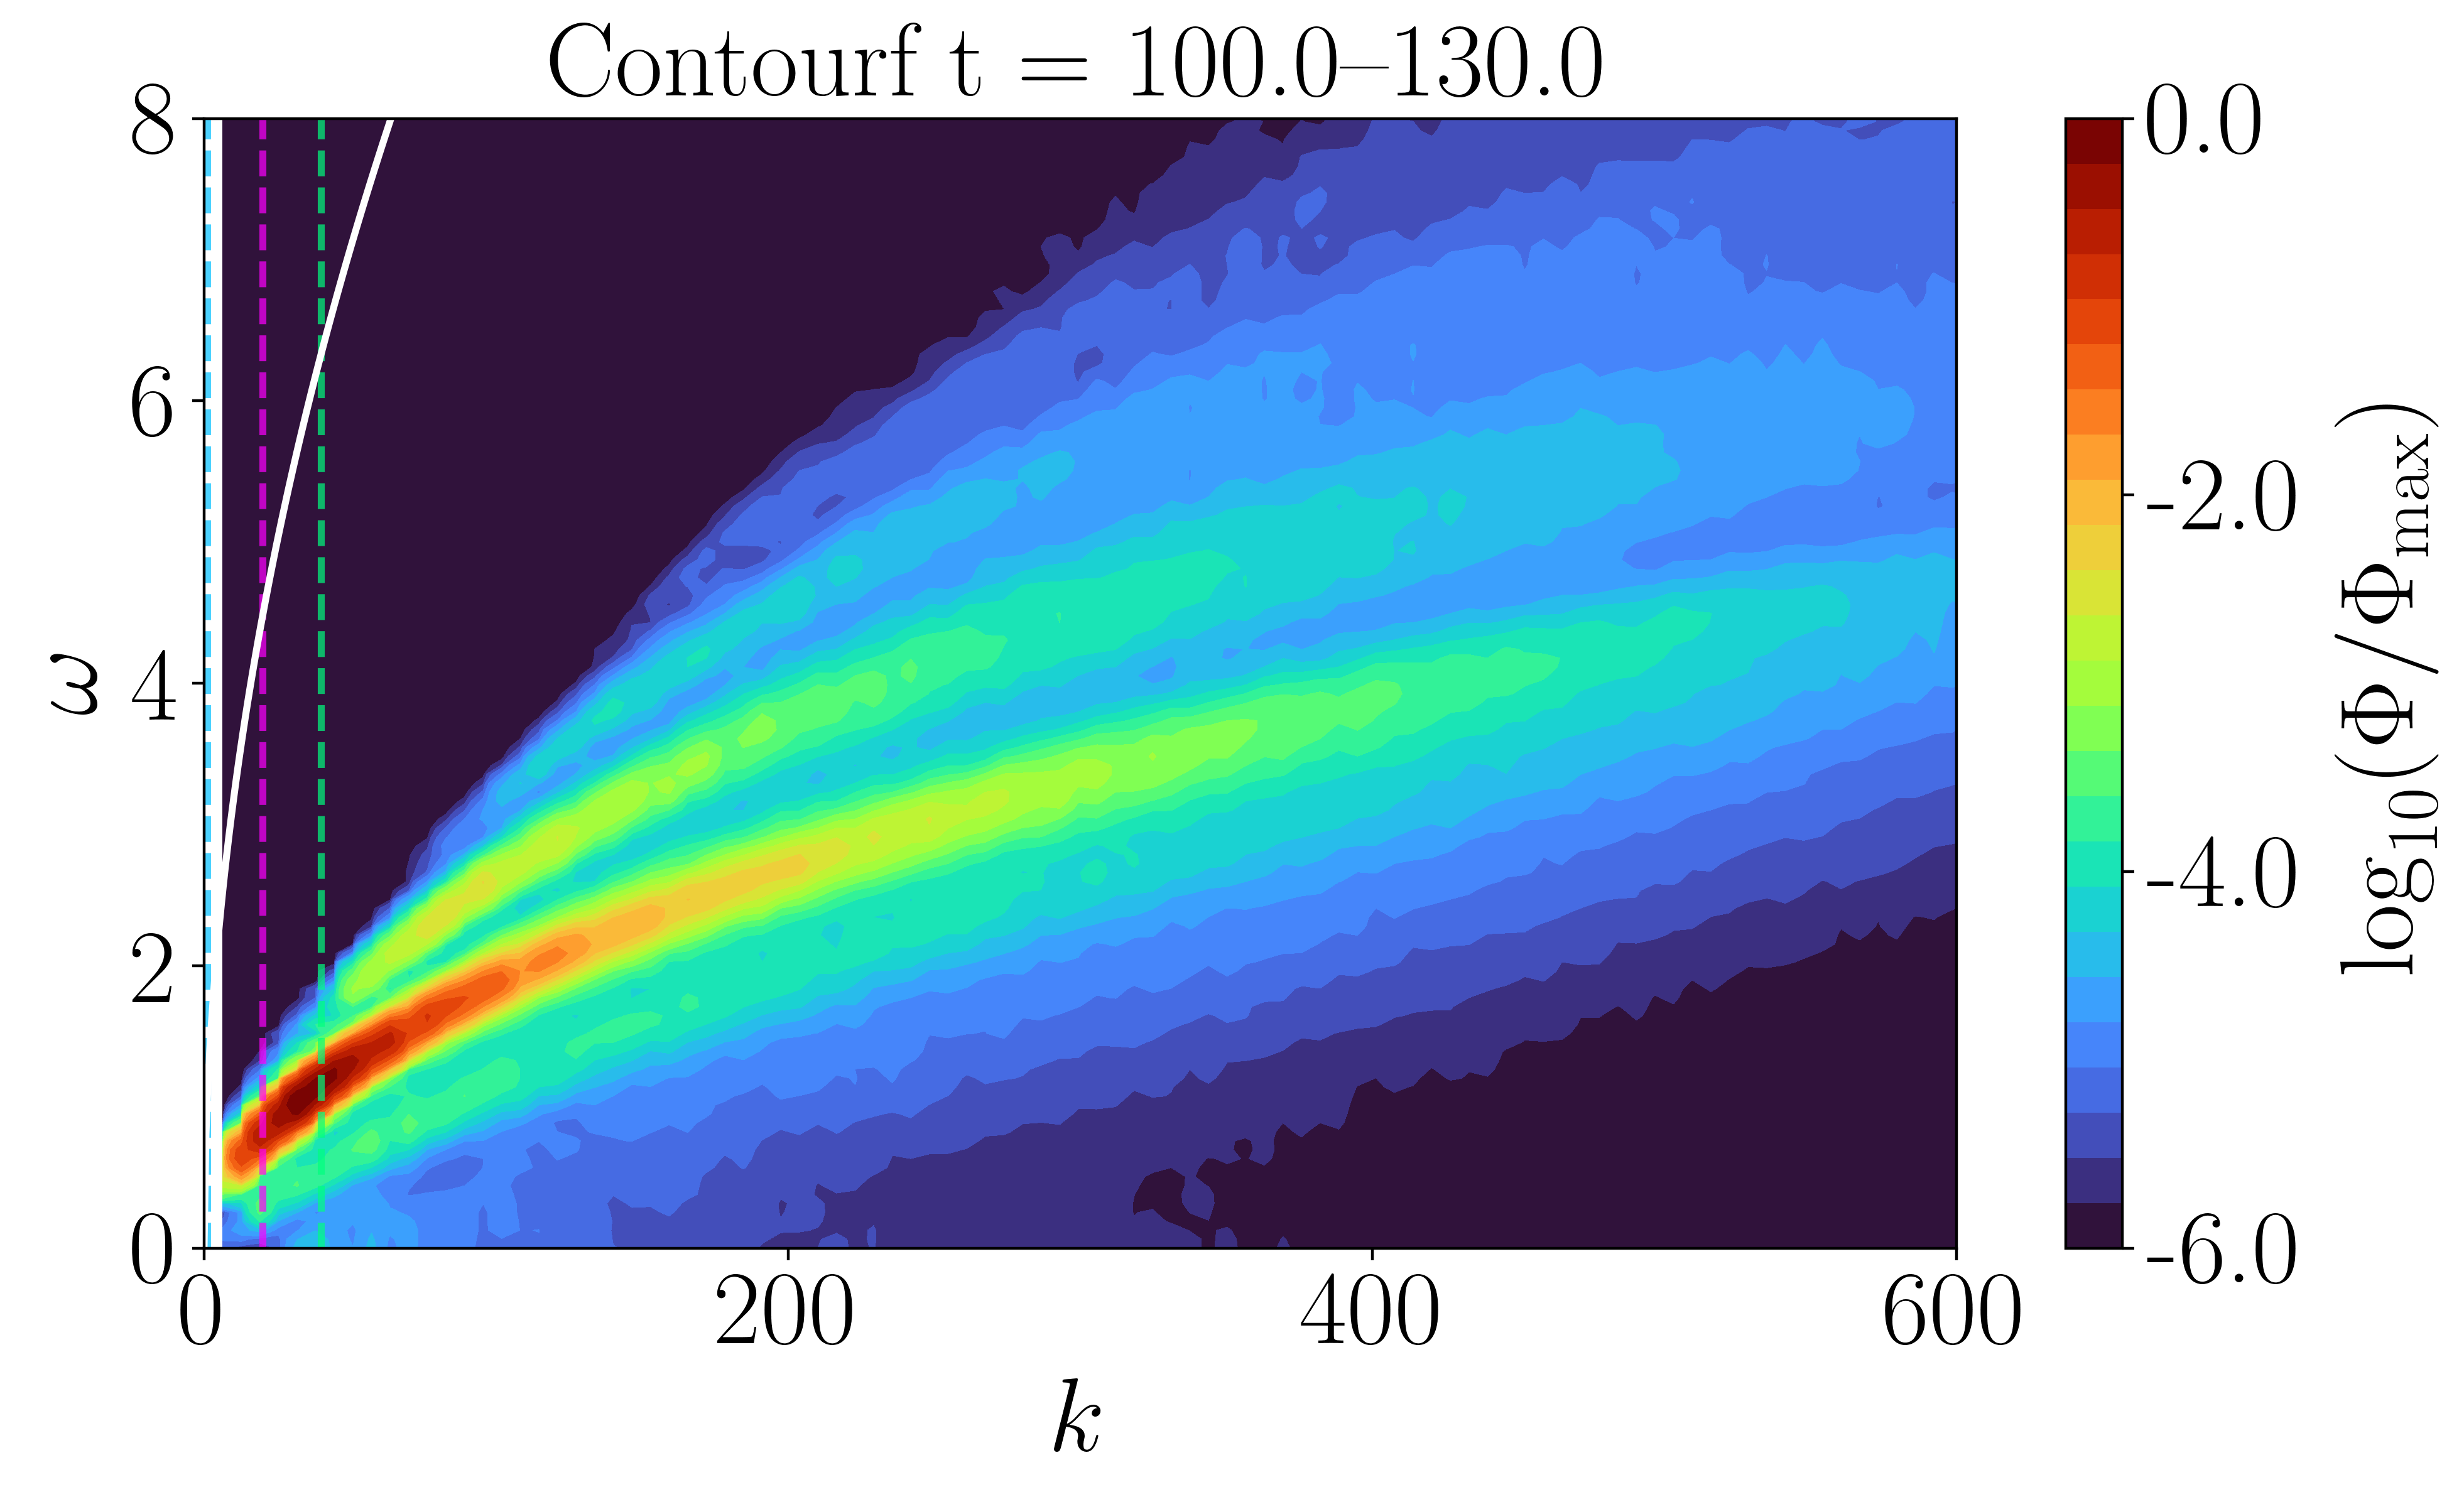

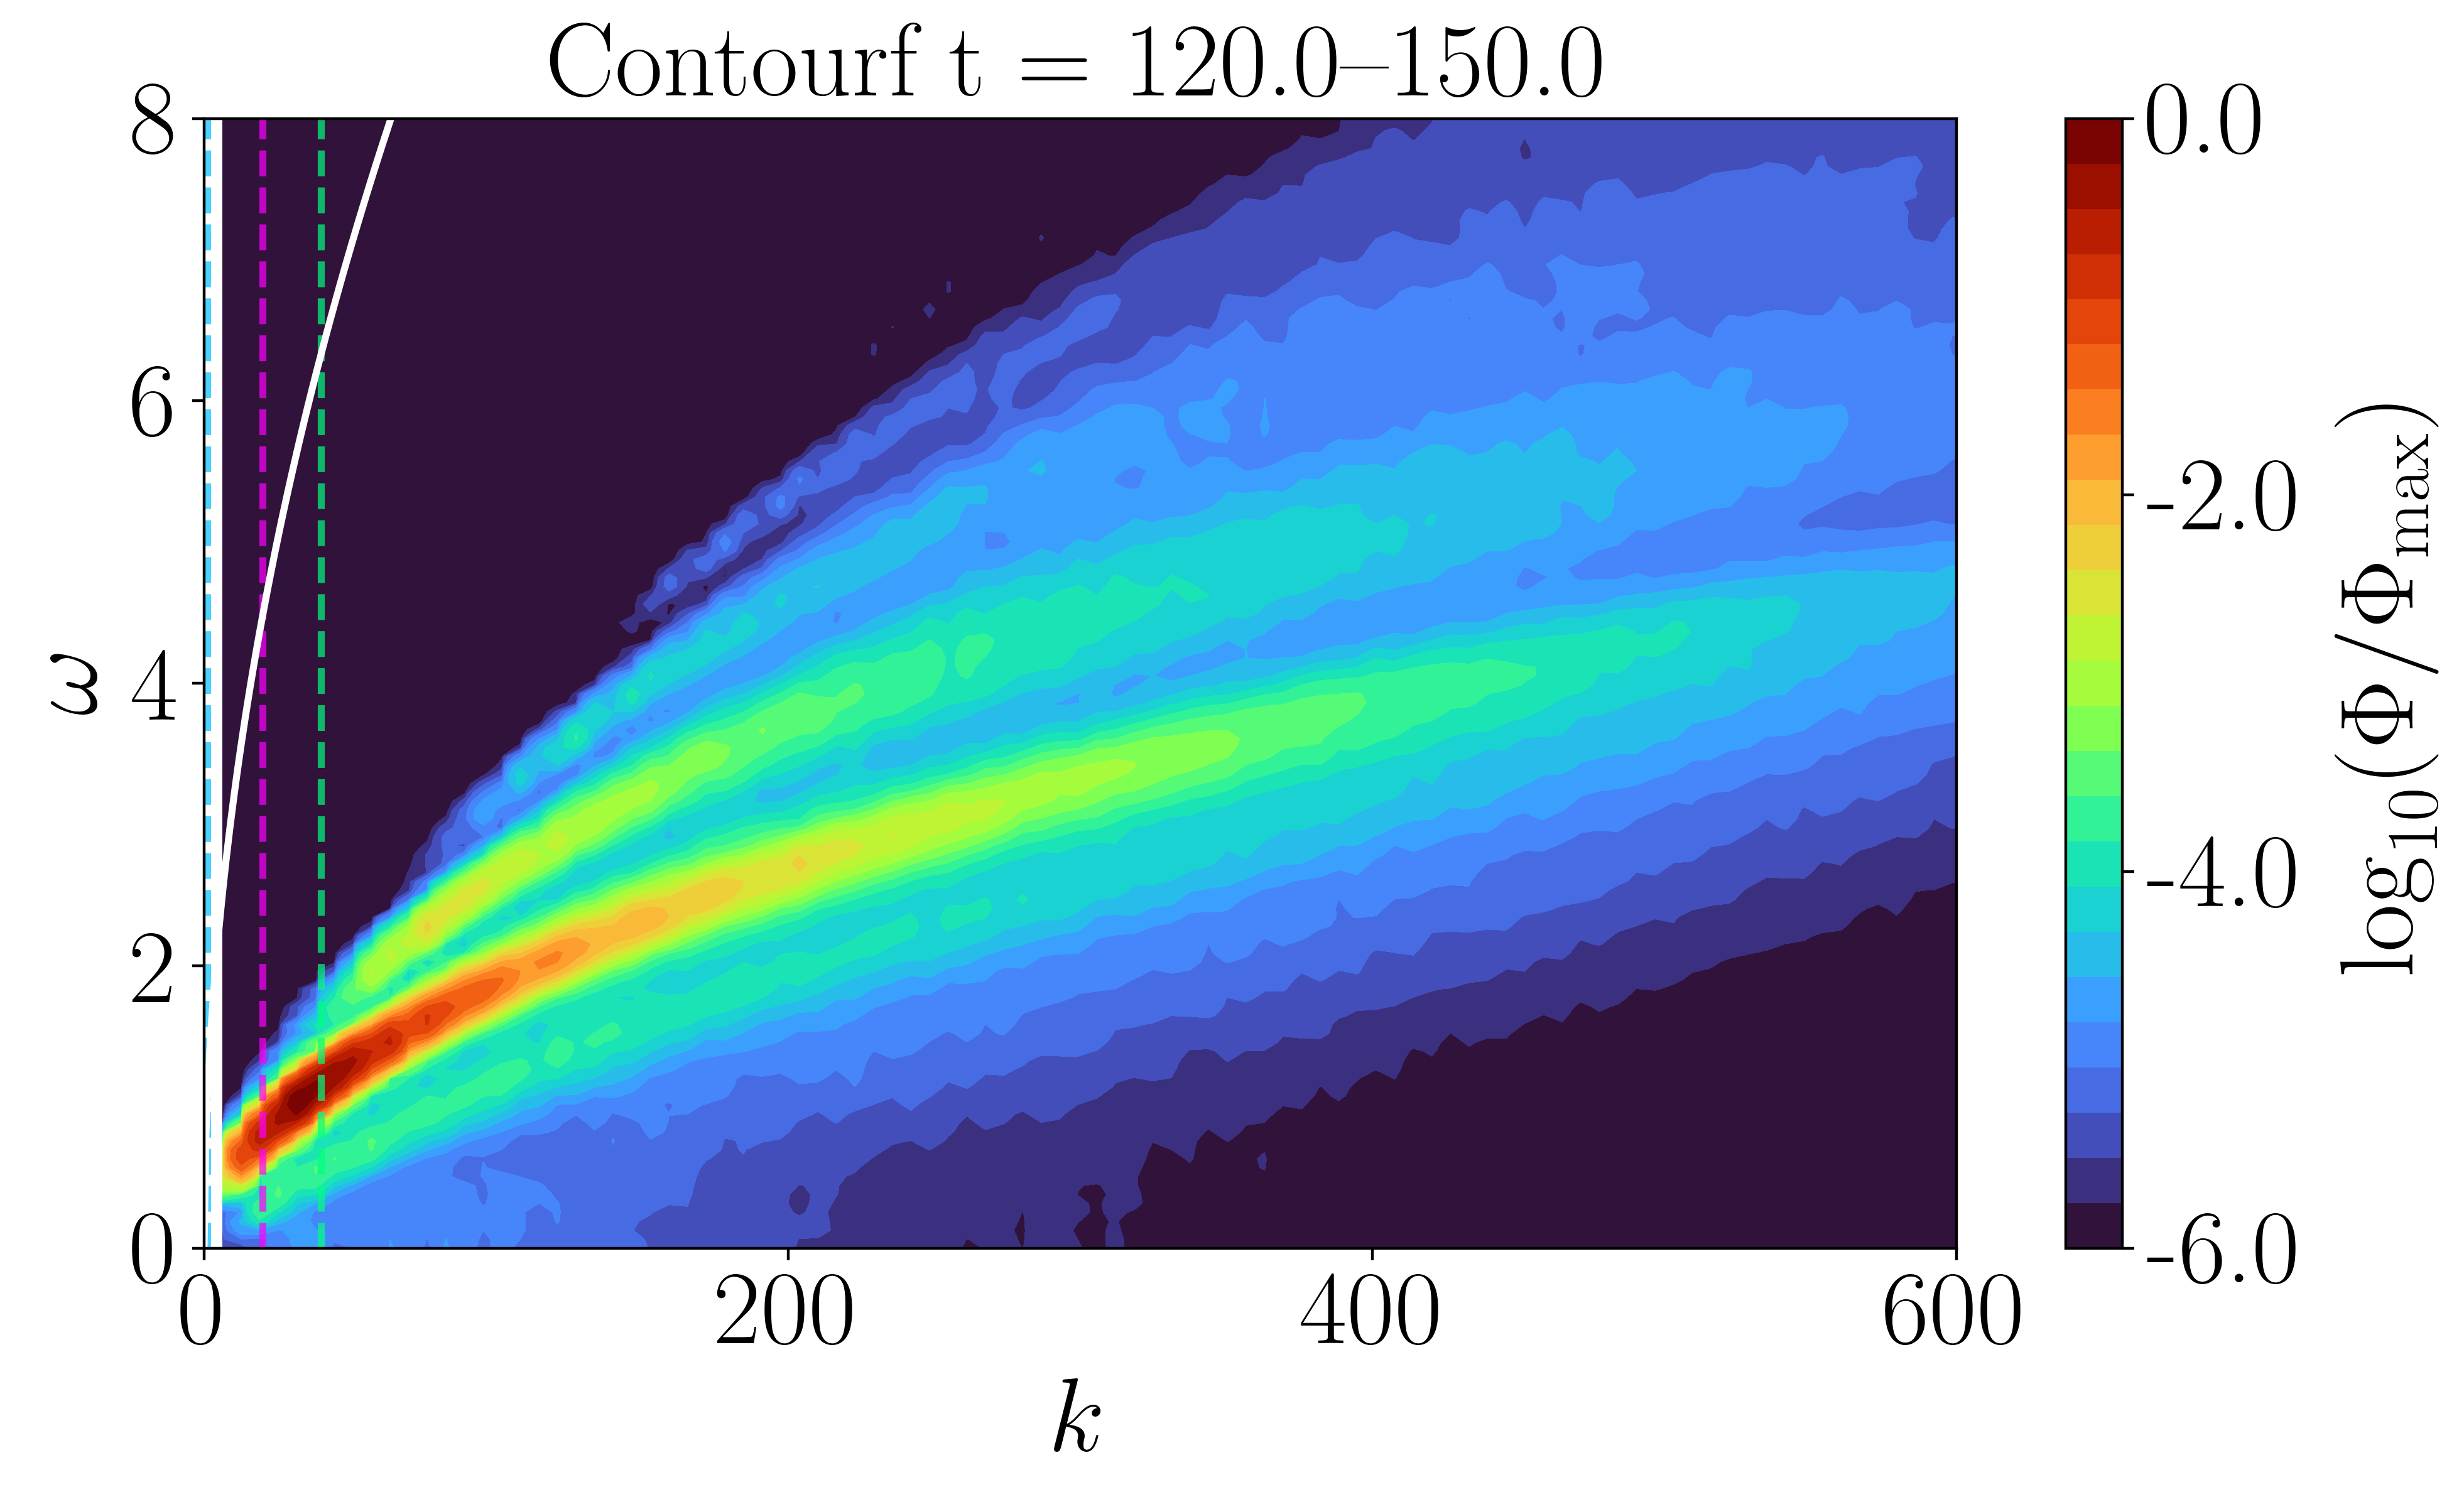

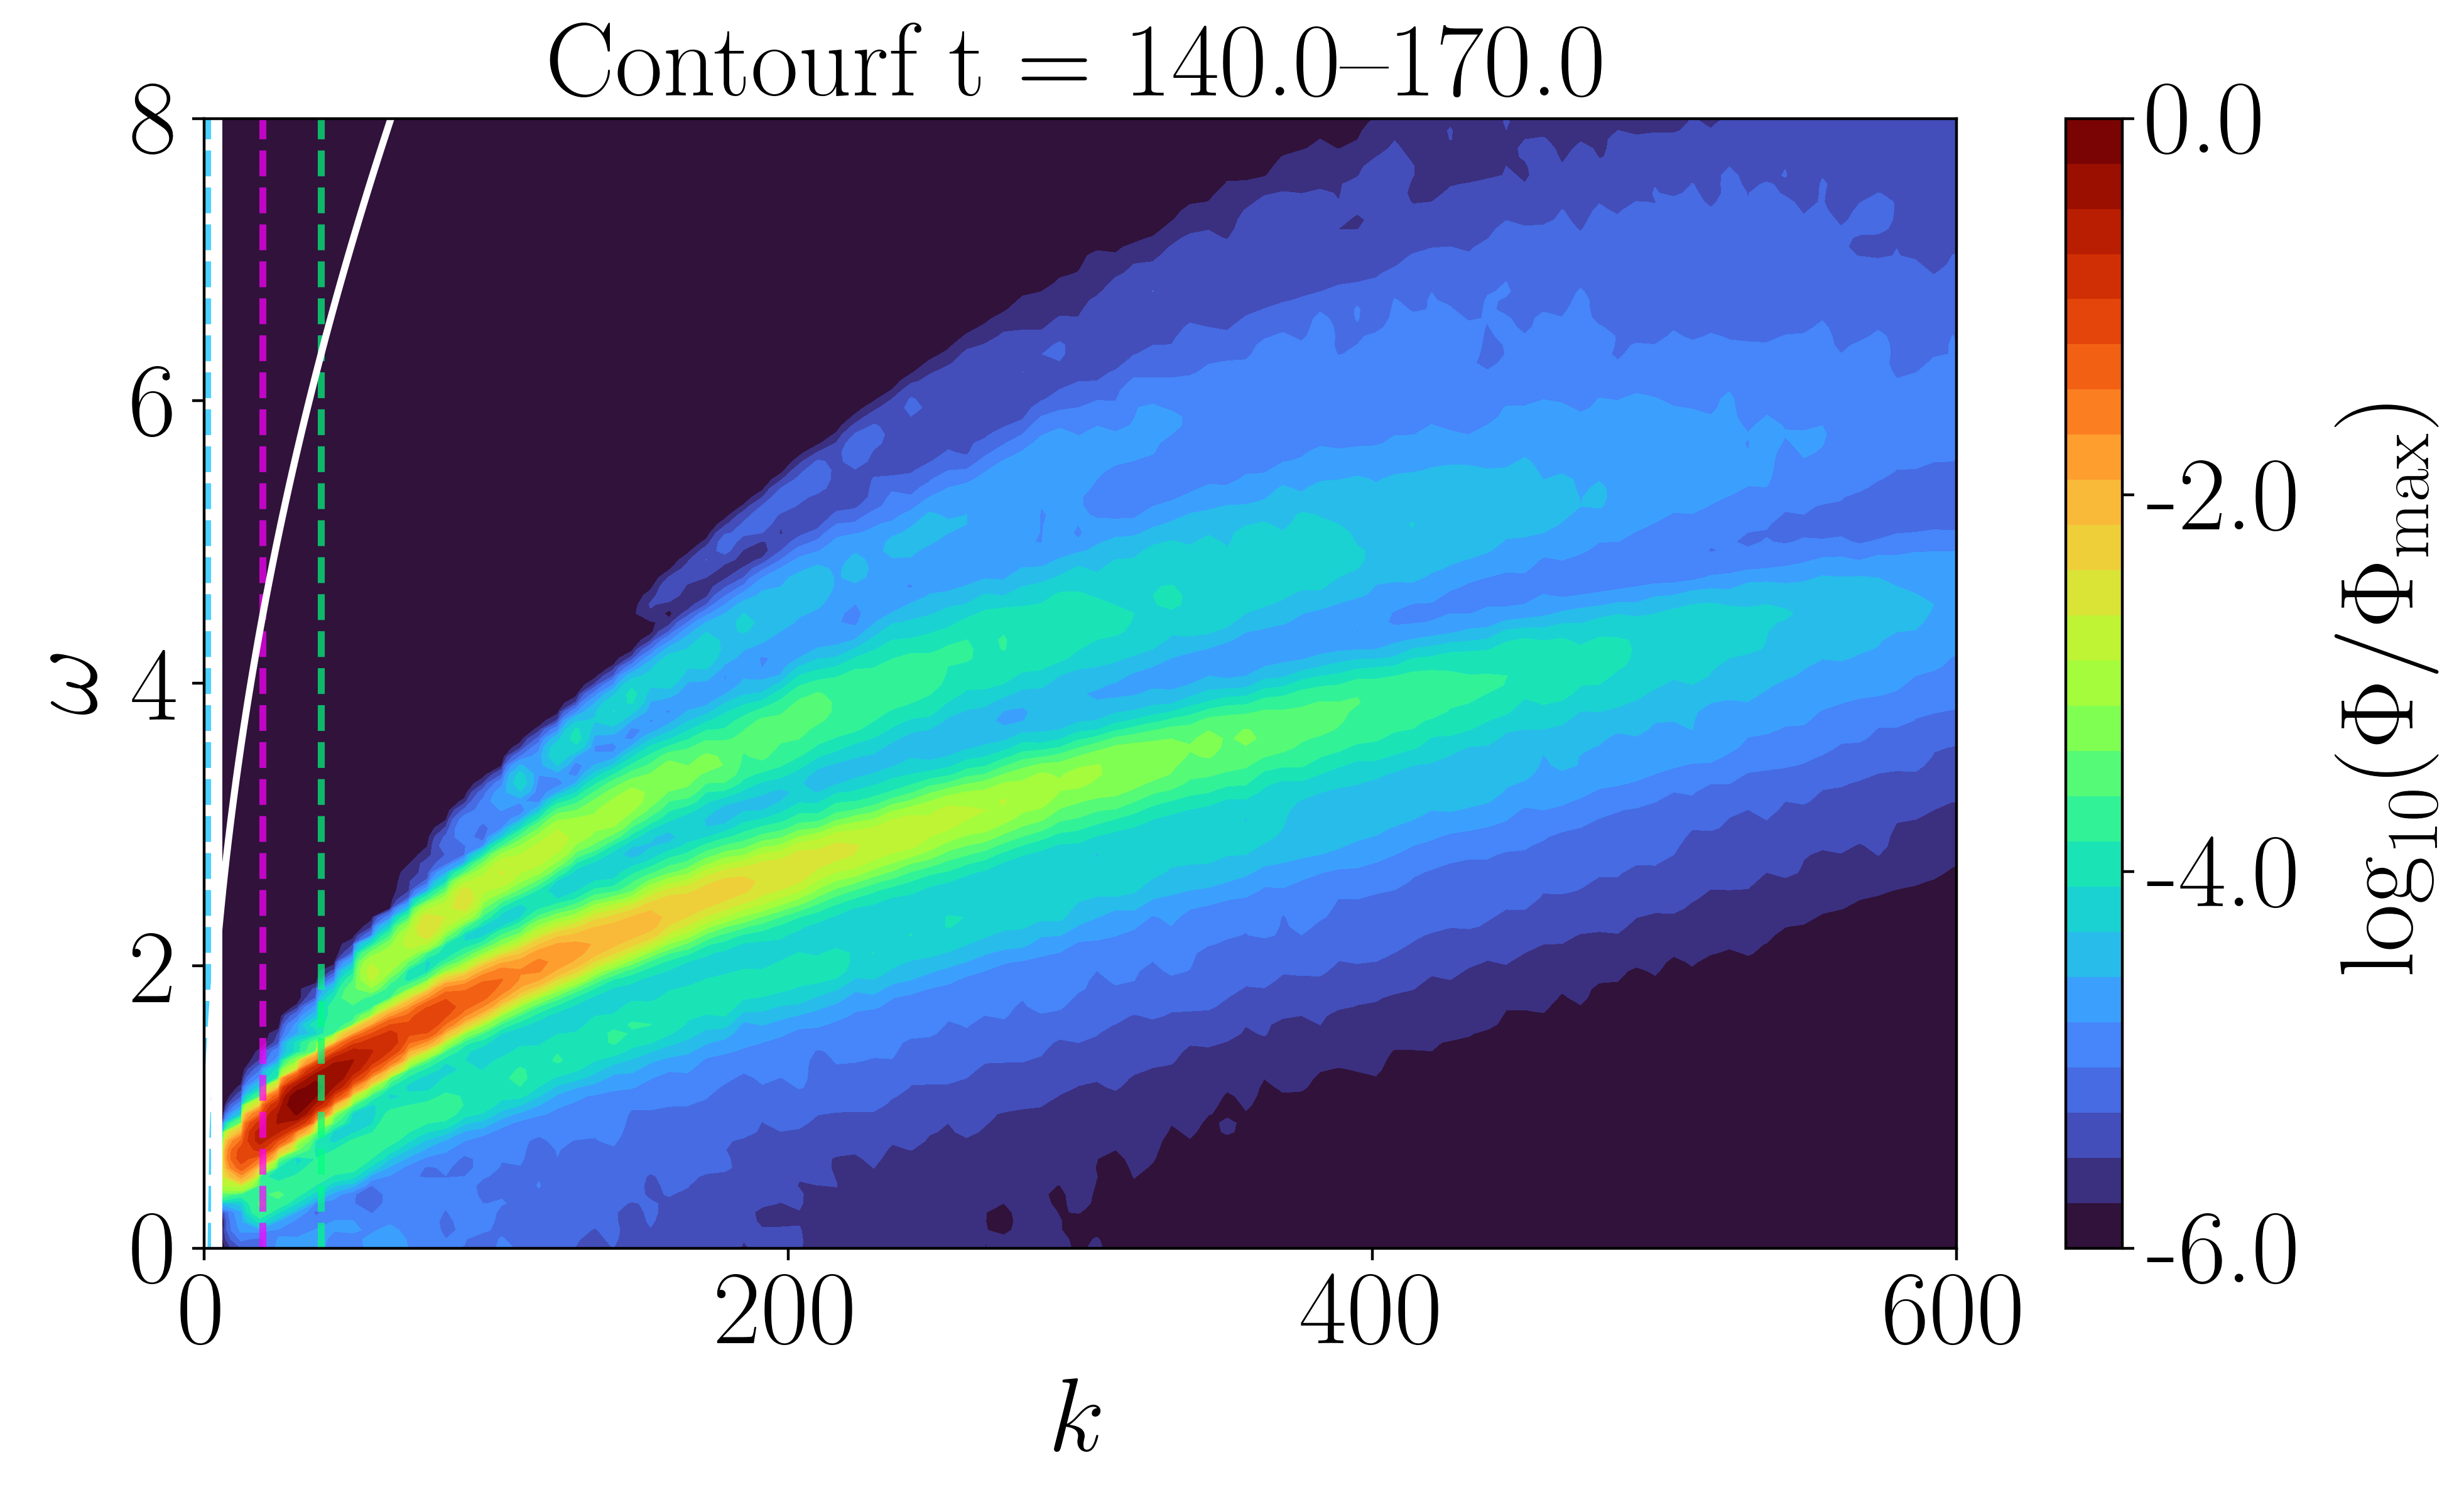

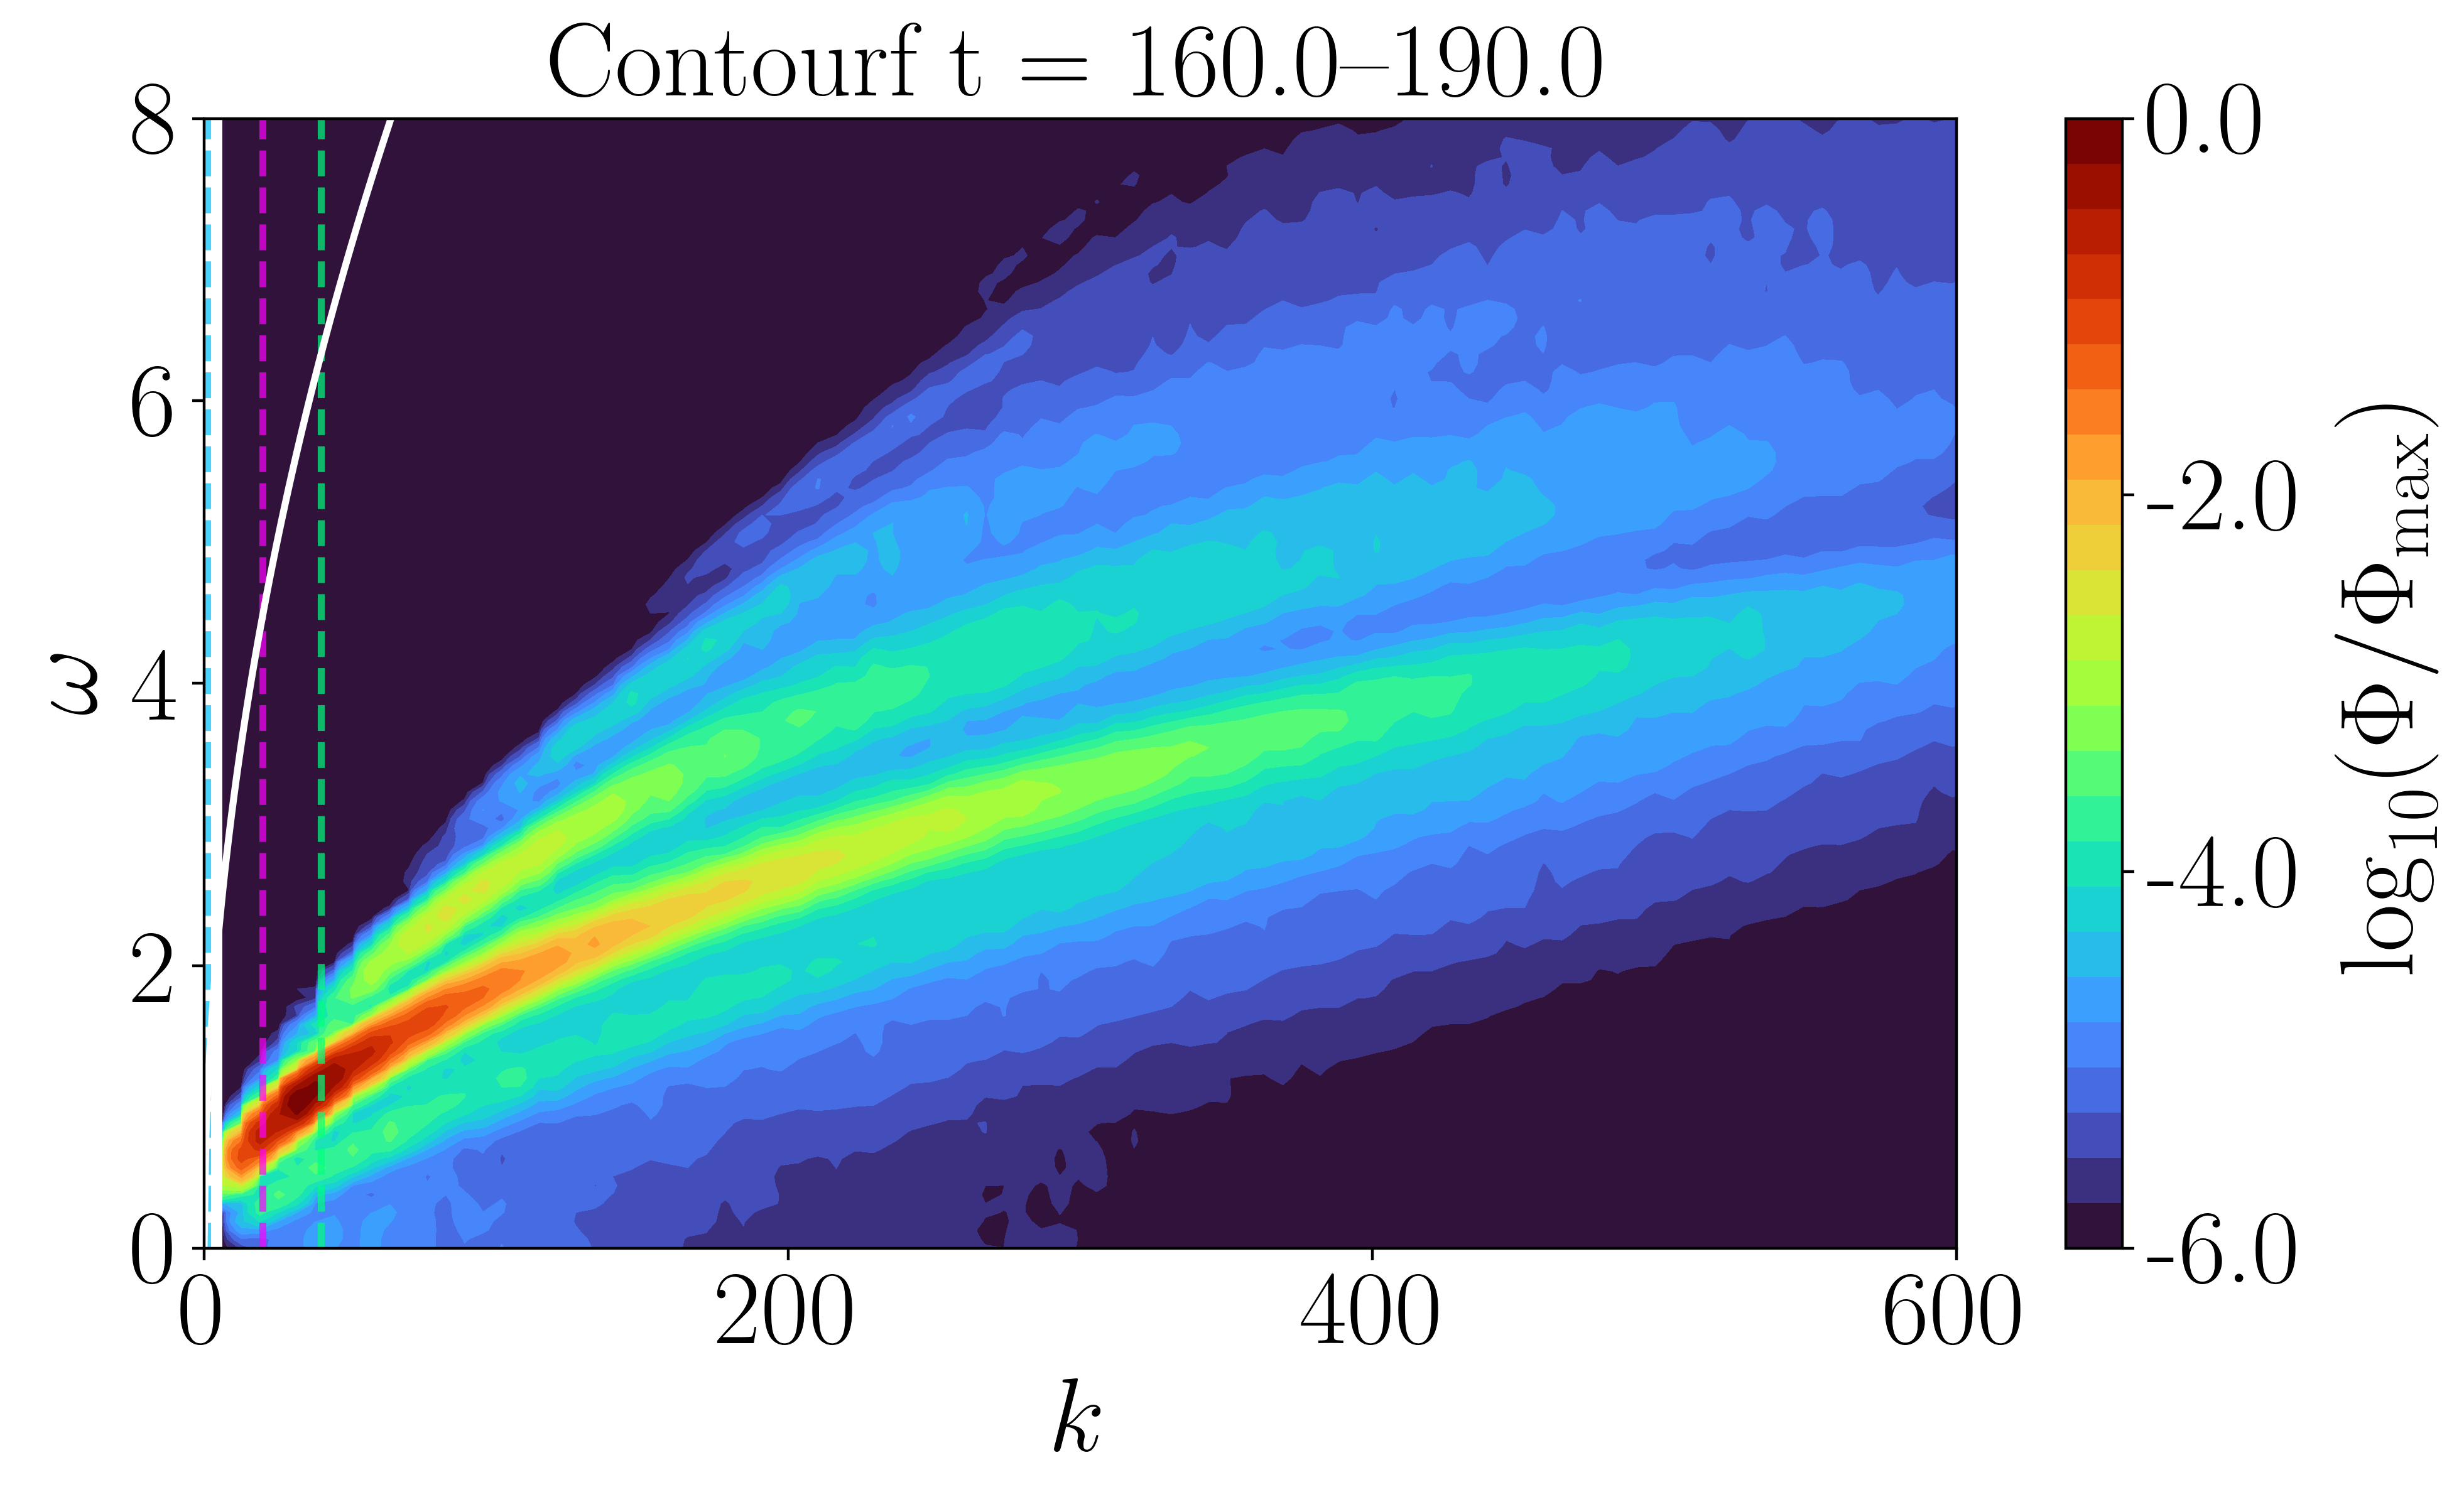

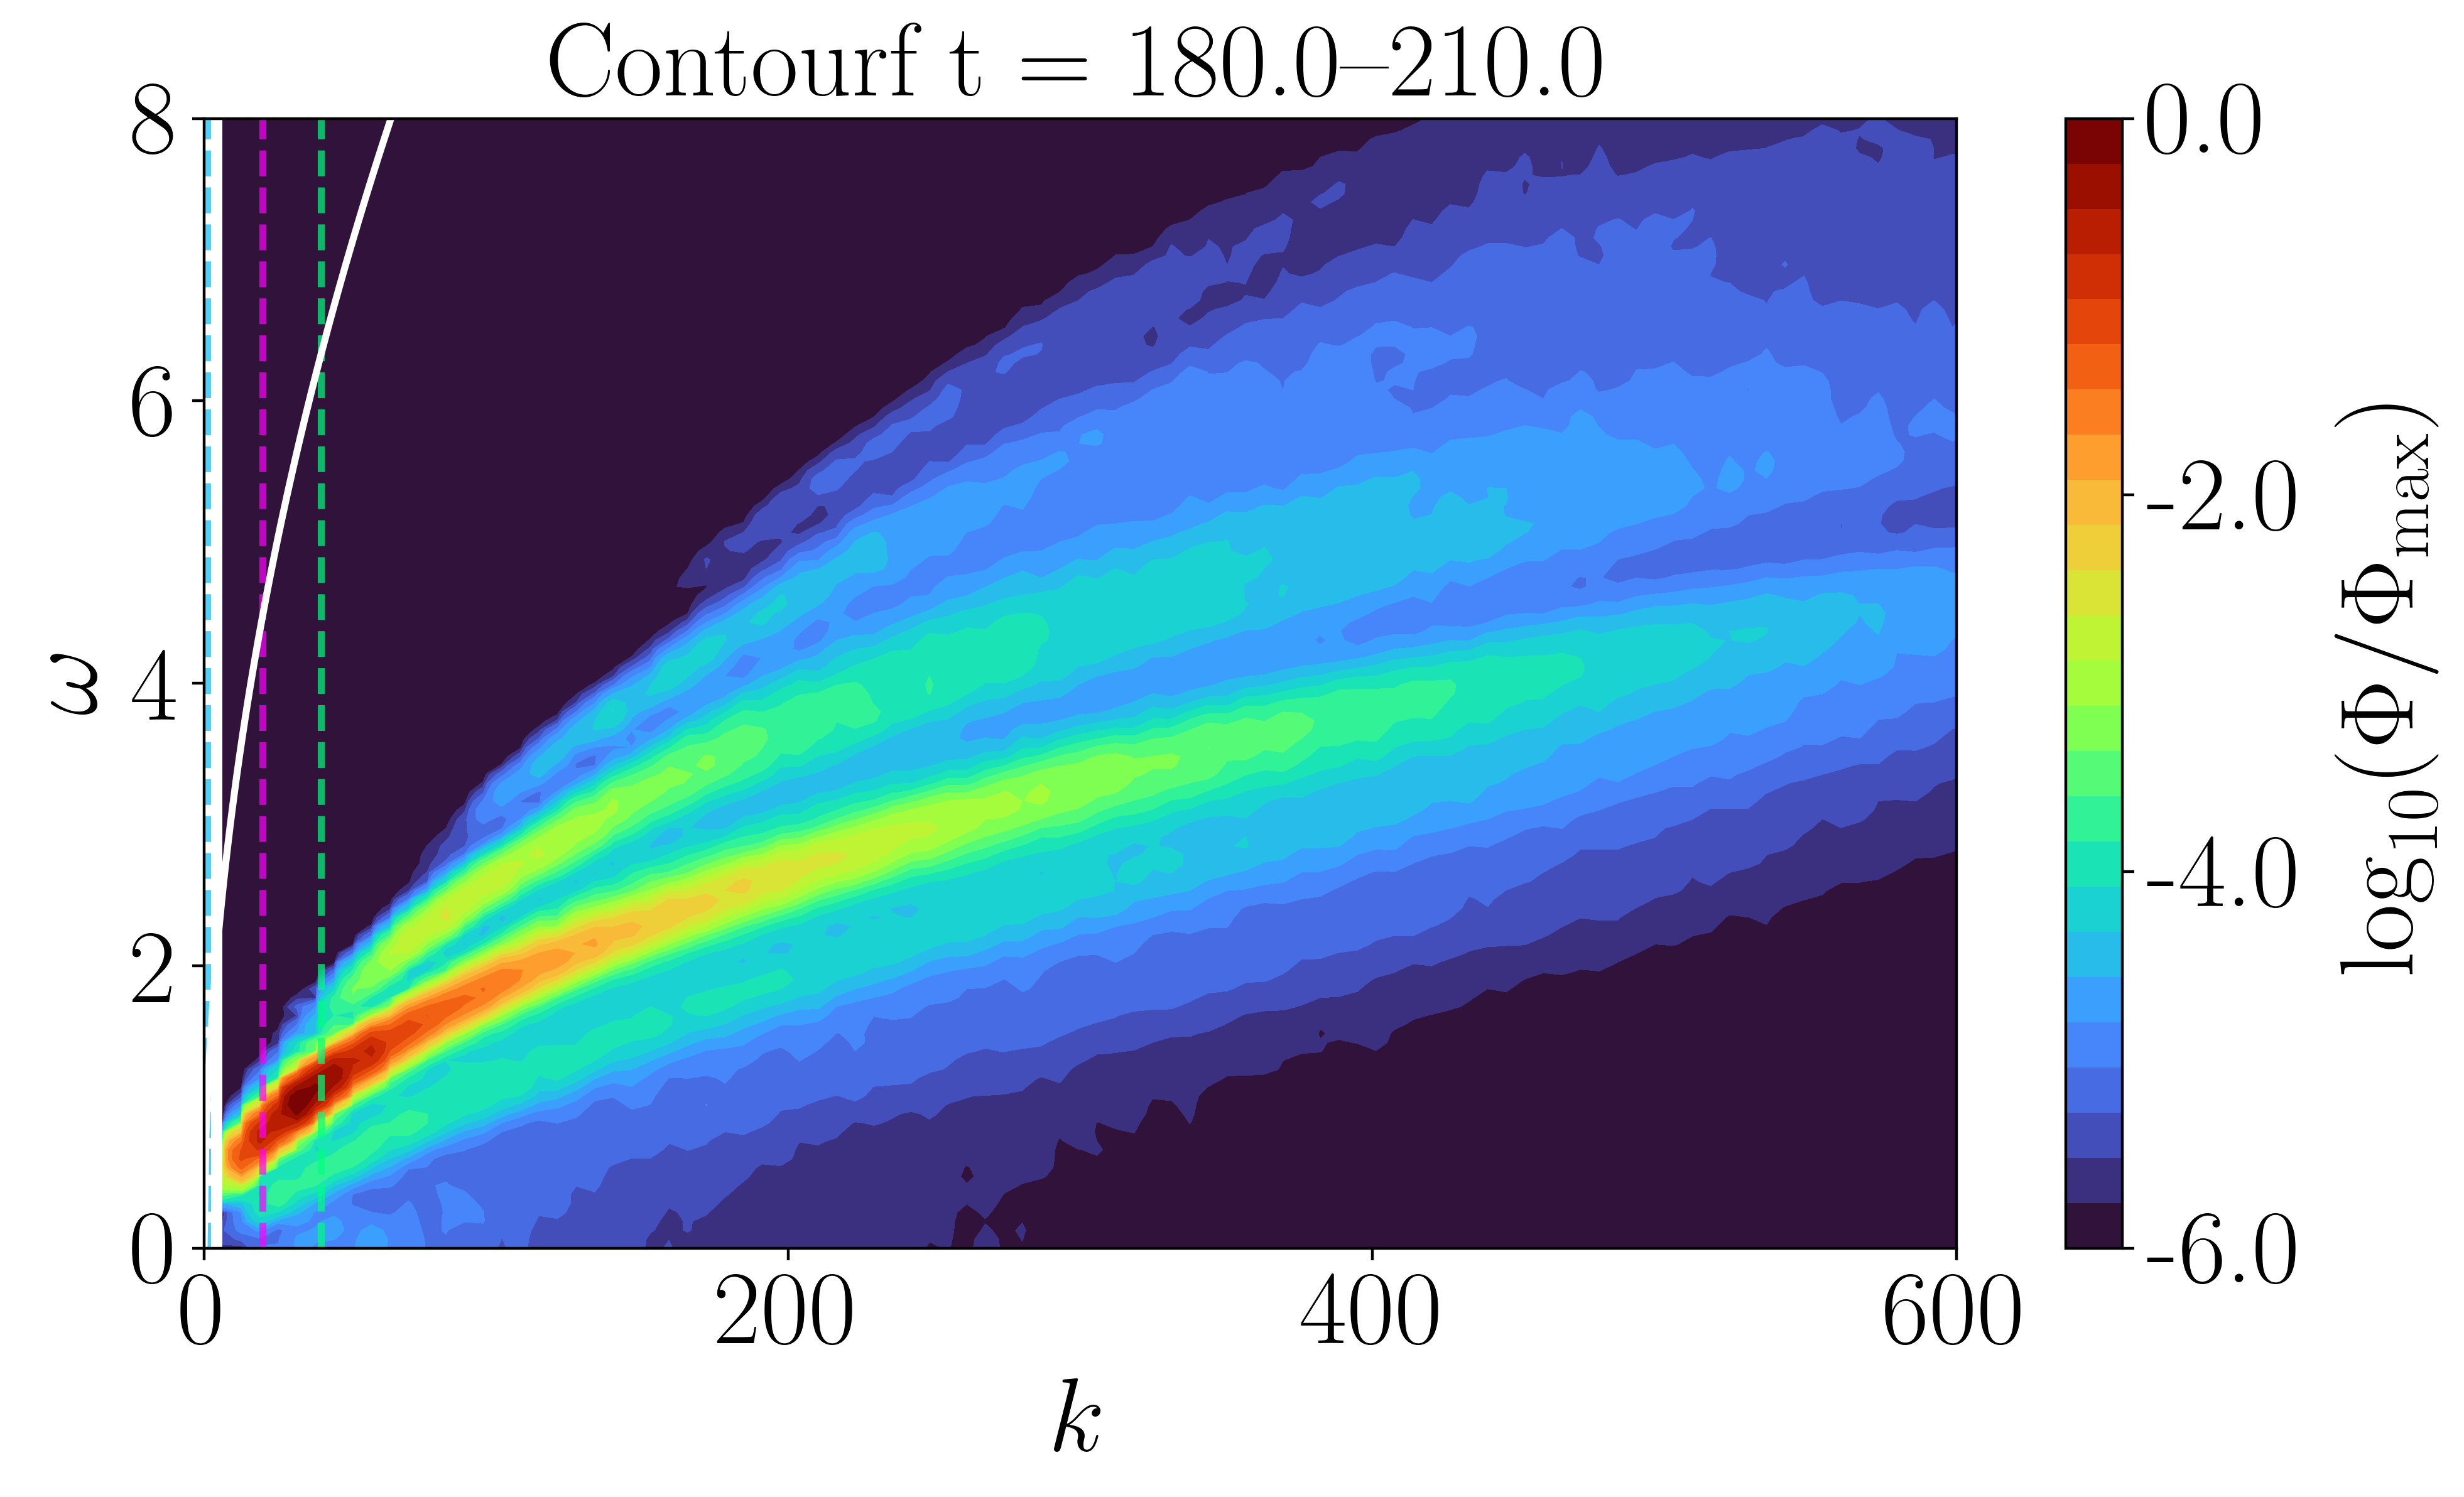

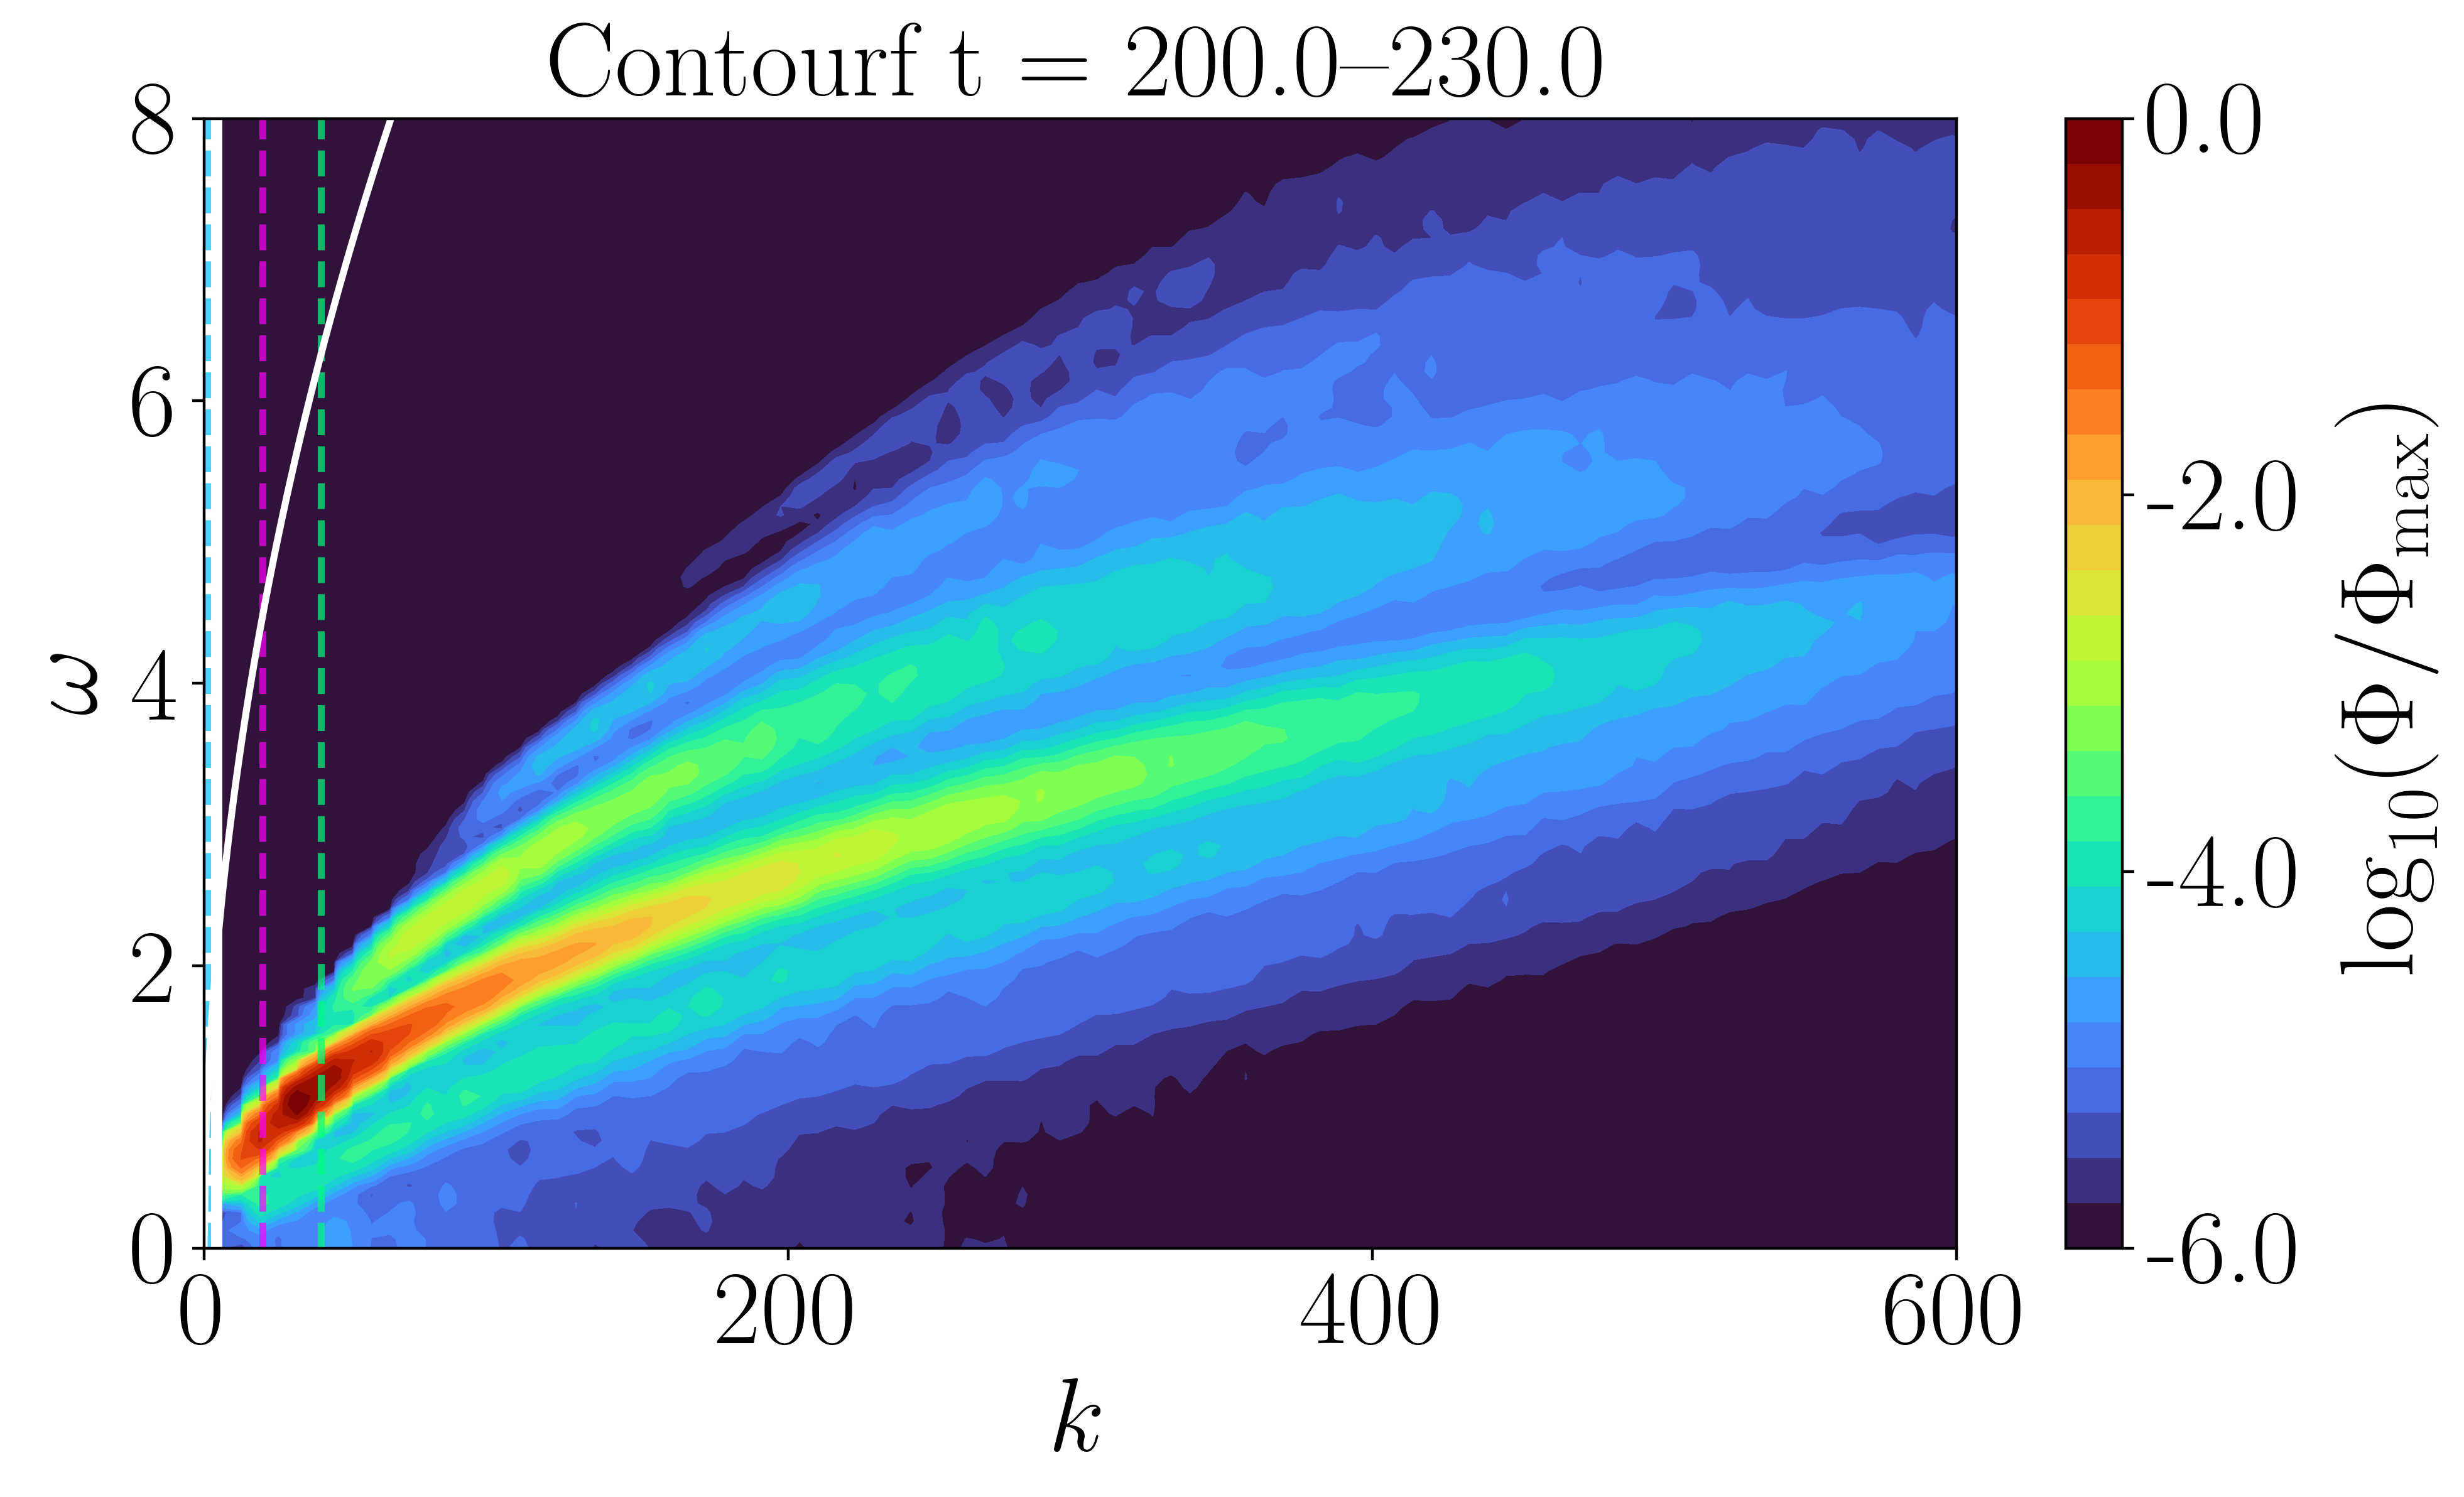

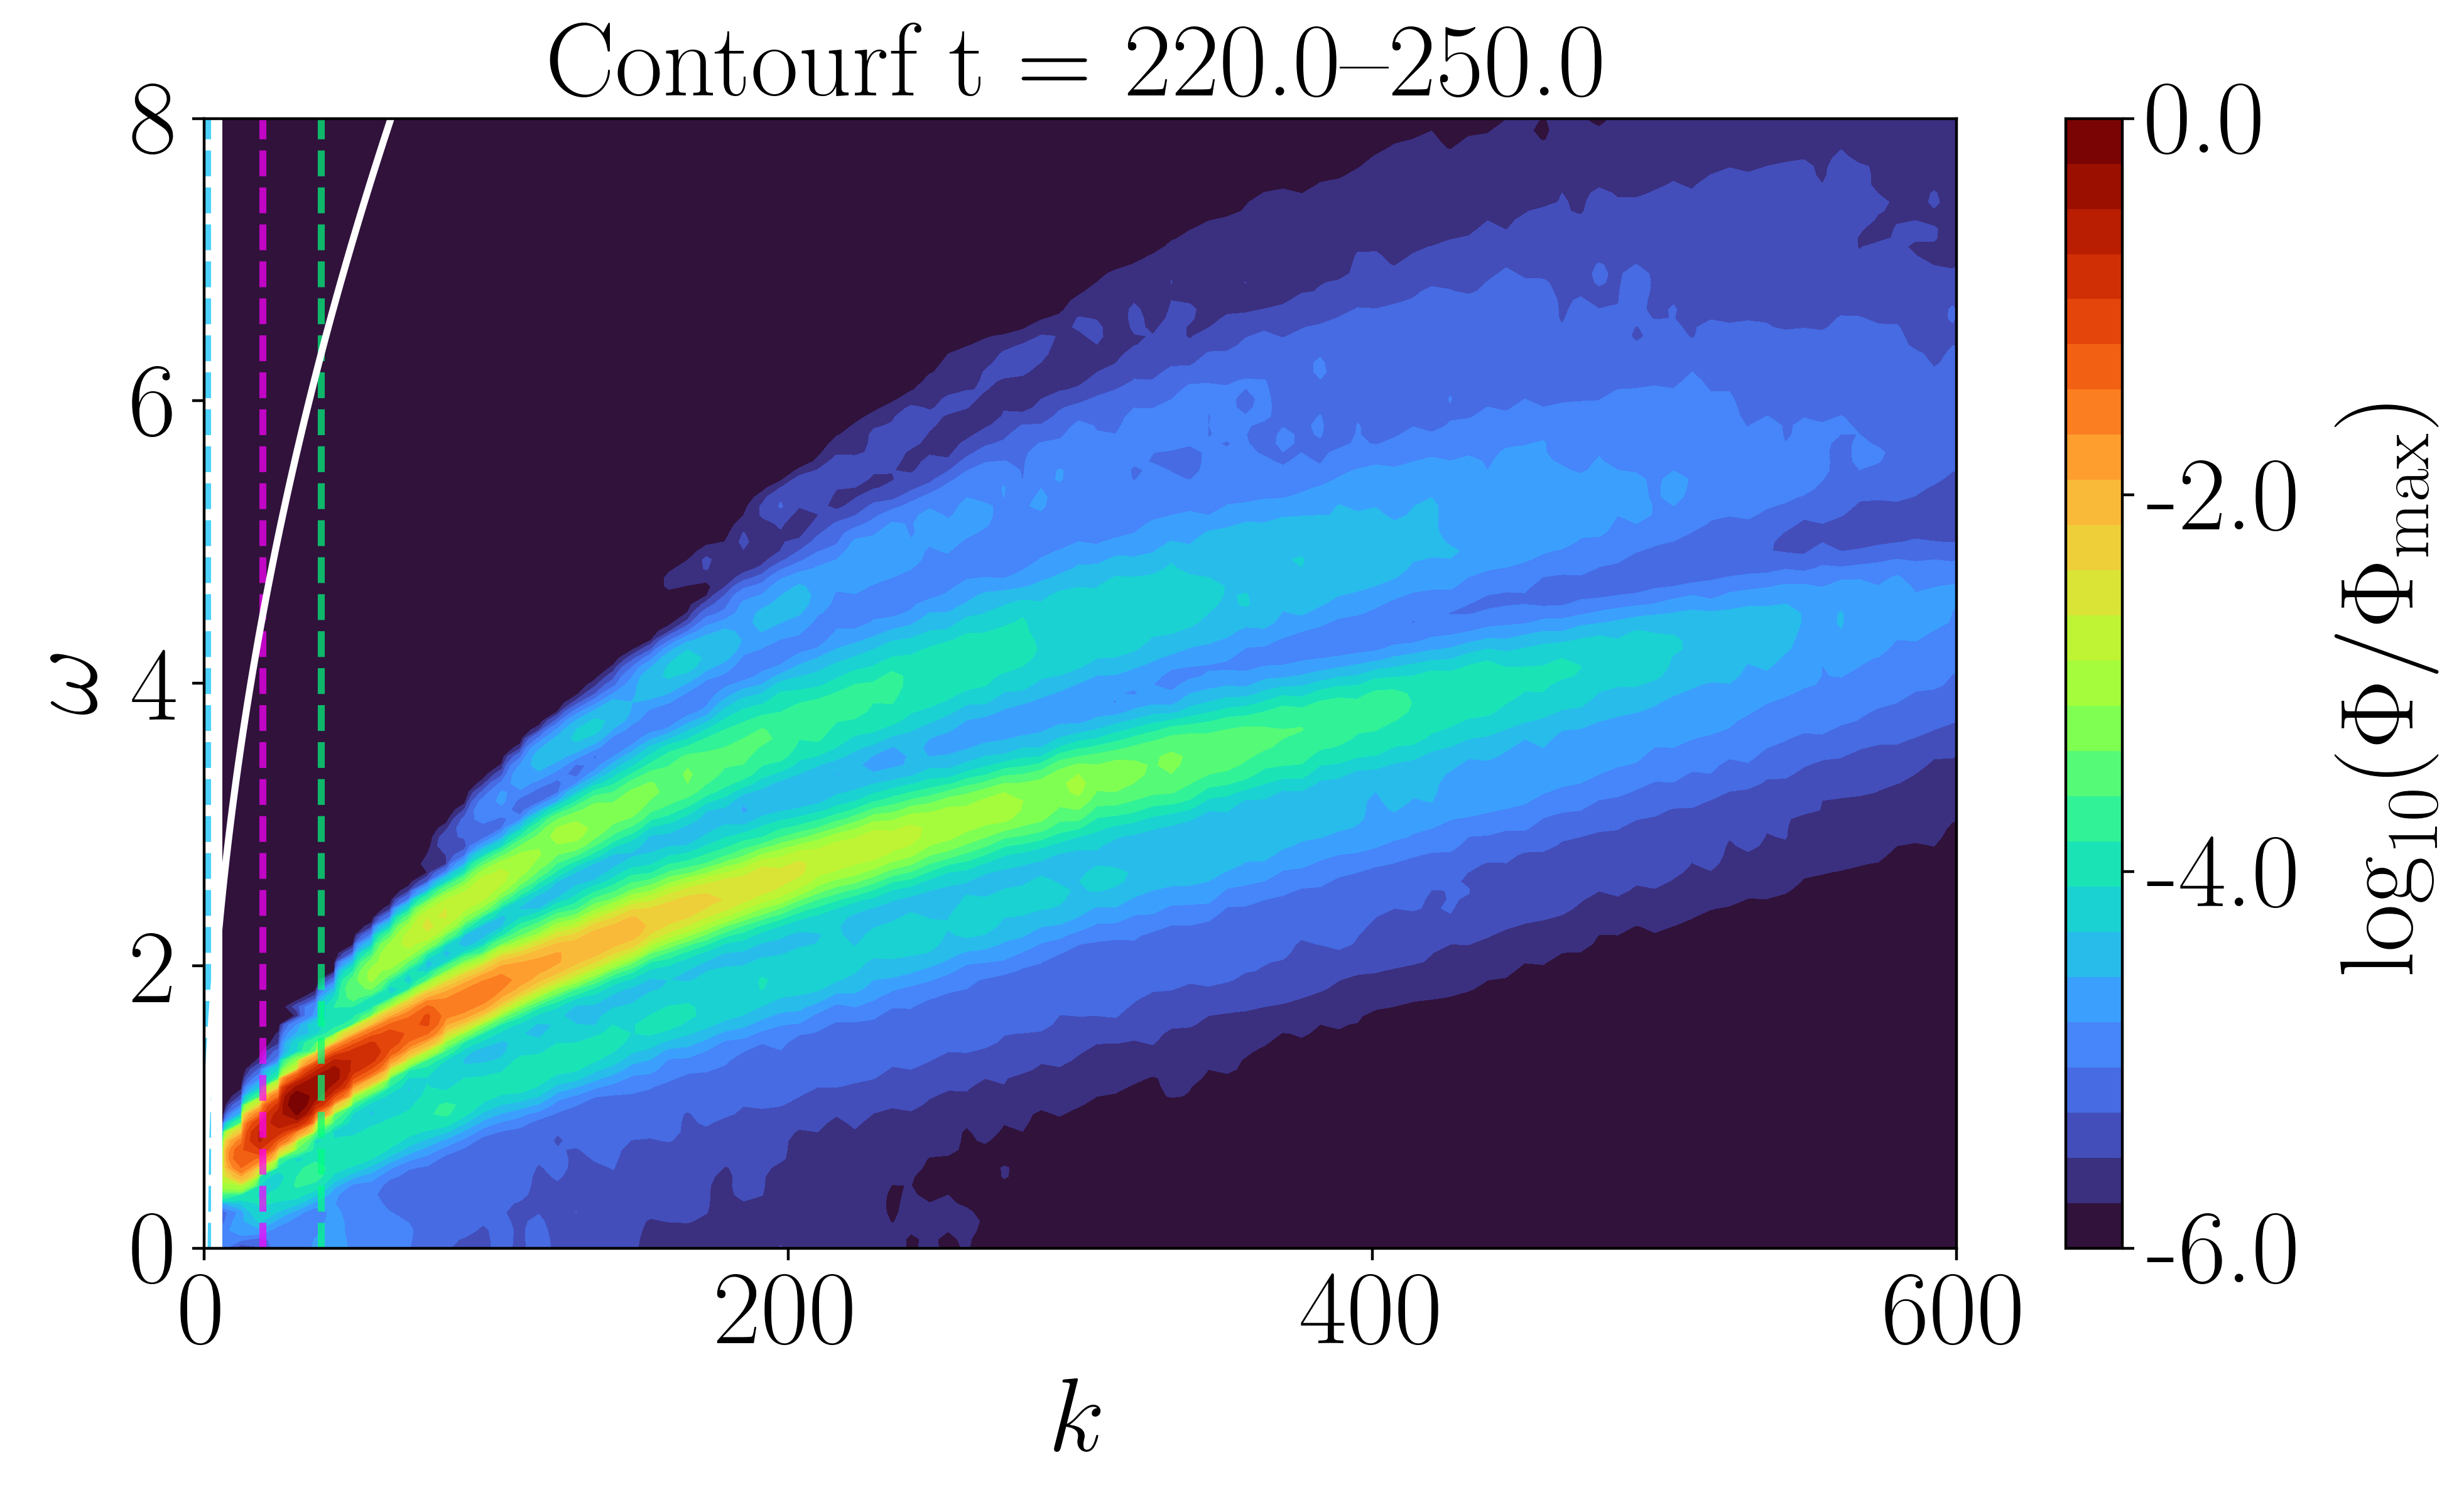

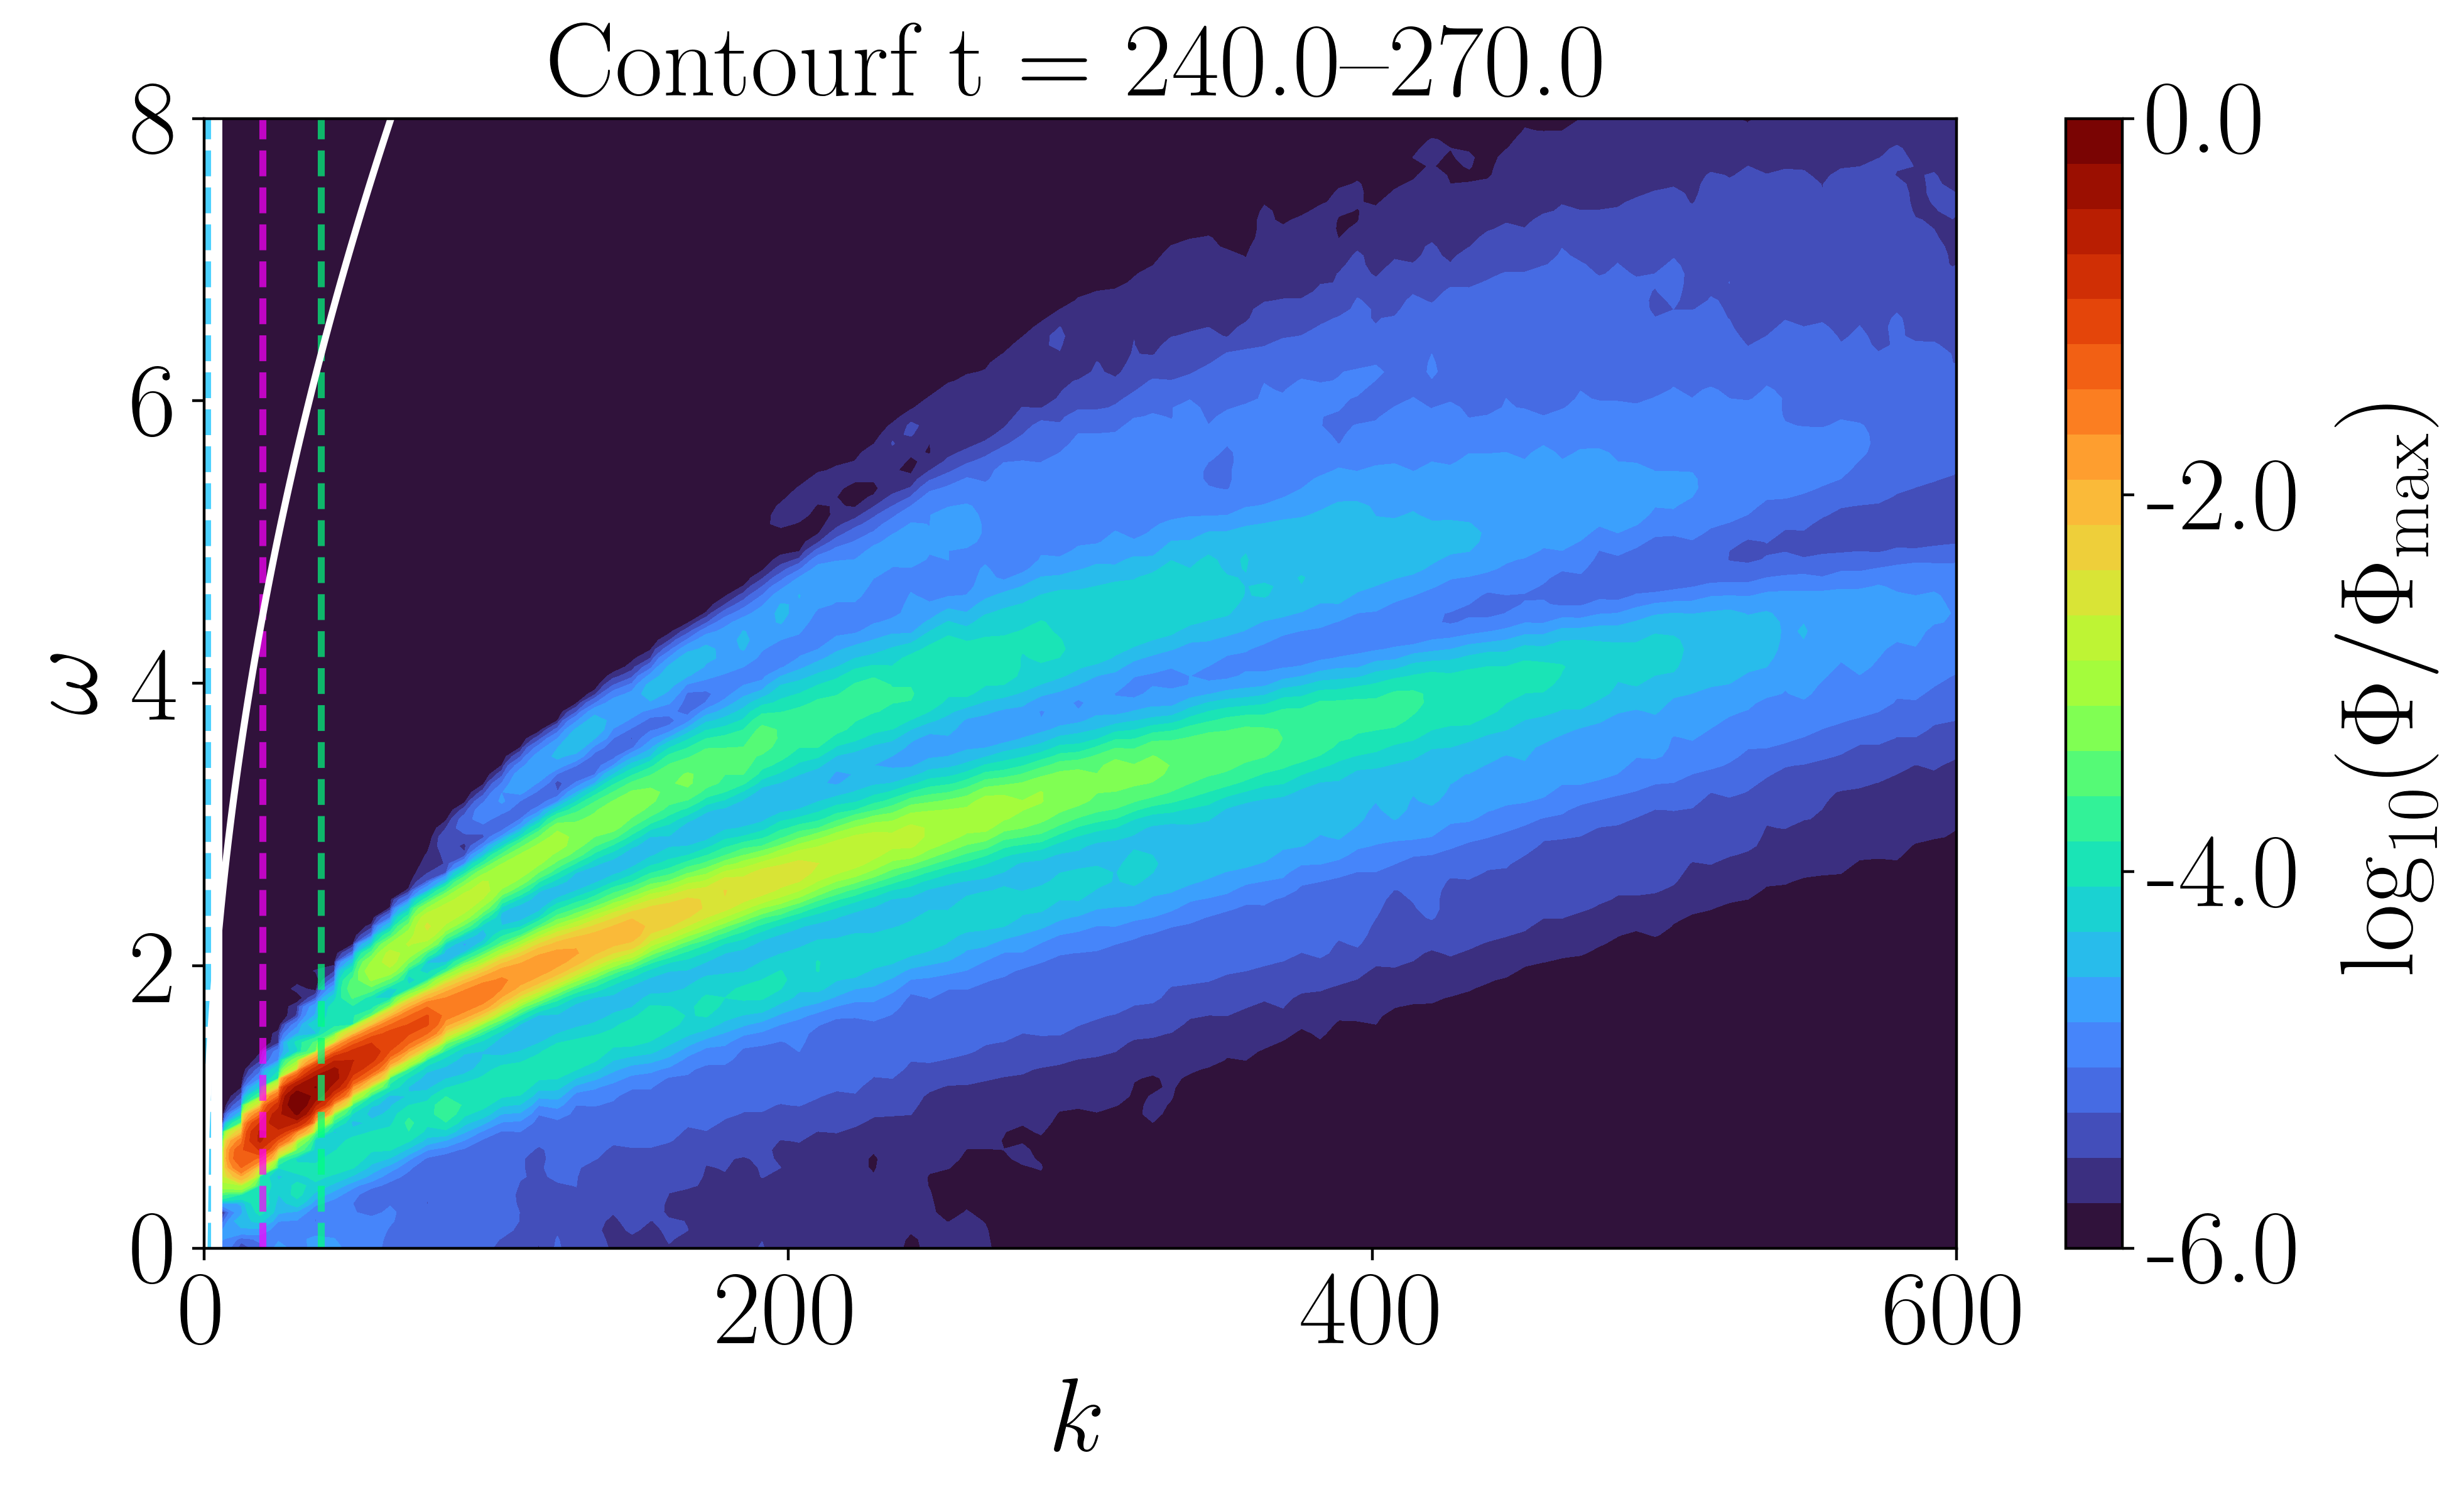

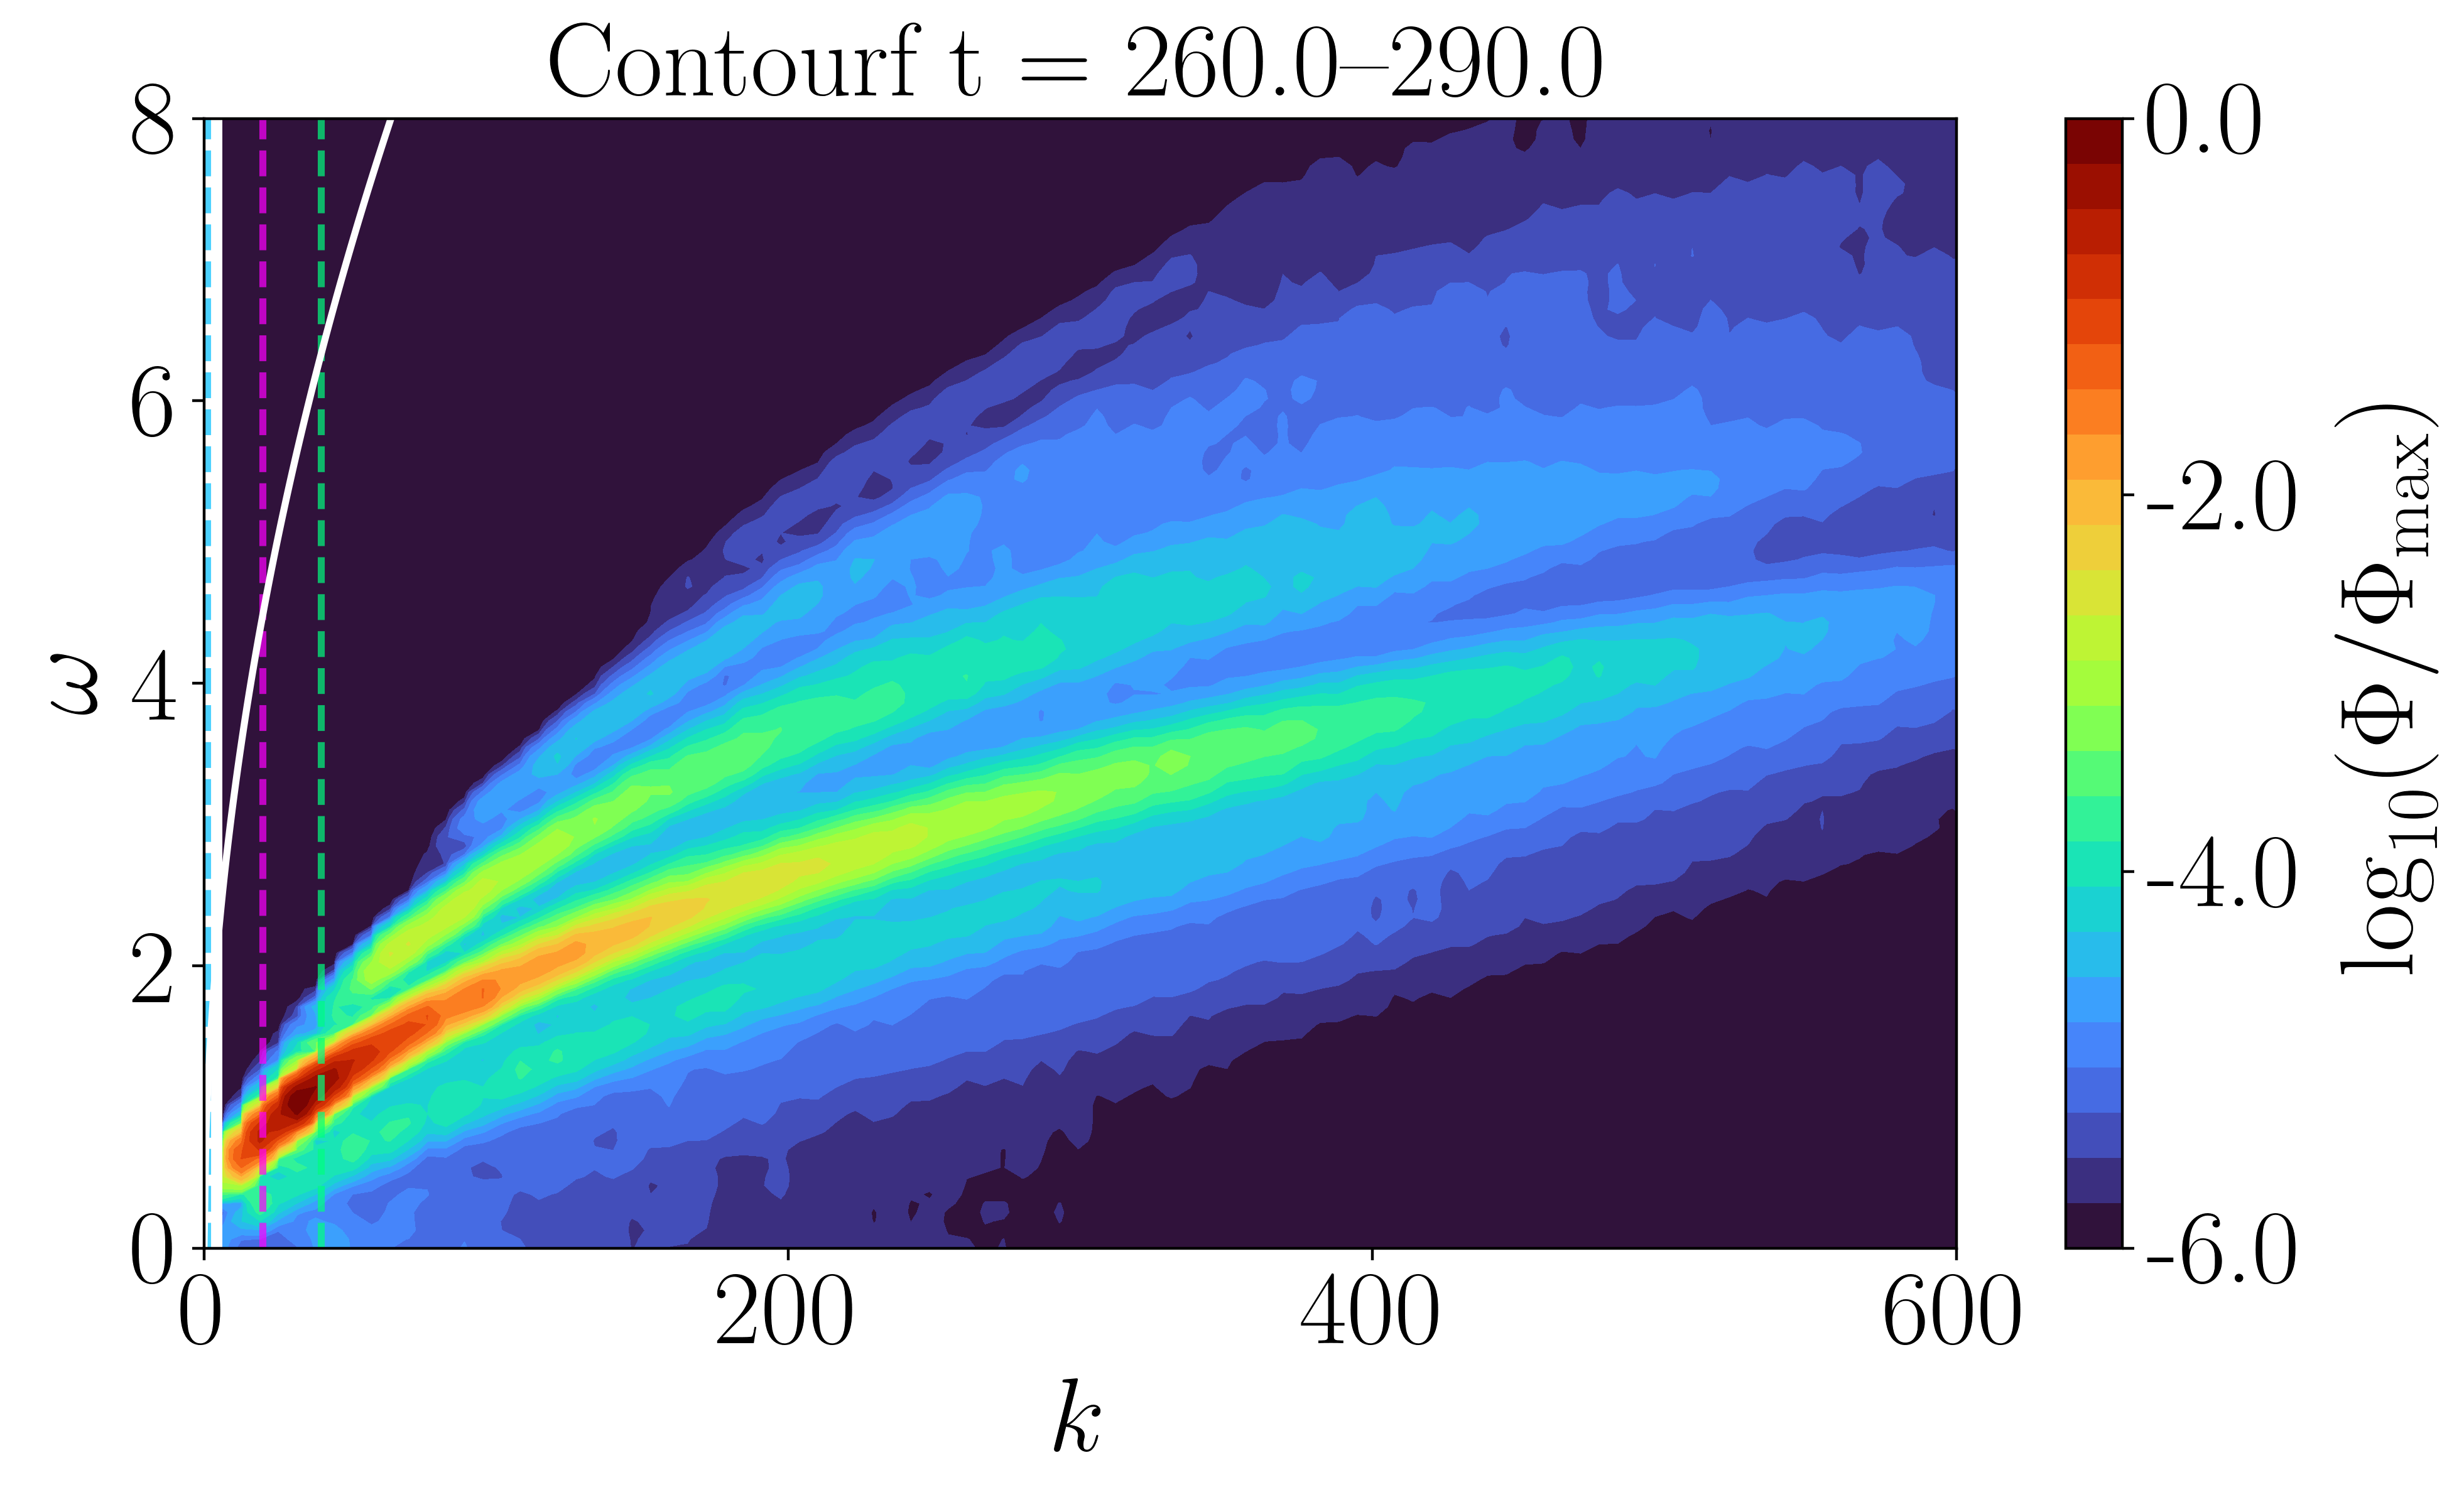

In [54]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm

# ——————————————————————————————————————
# Parámetros previos (define estos antes):
# h5_path, dt, LN, t (vector de tiempos), g, Bo, rho1, omegap, graph_path…
# ——————————————————————————————————————

dt =0.2
LN = 150

# 1) Marcadores para picos (si más adelante deseas detectar picos)
markers       = ['o', 's', '^']
peak_colors   = ['white', 'red', 'yellow', 'orange']
peak_markers  = ['o', 's', '^', 'd']
height_interval = [-2.5, -2.5, -2.5, -1.5, -1.5, -3, -1.5,
                   -1.5, -1.5, -1.5, -1.5, -1.5, -2, -2,
                   -2, -2, -2, -2, -2, -2, -2]

# 2) Dominio normalizado y colormap discreto
vmin, vmax   = 1e-6, 1.0
n_levels     = 25
levels_norm  = np.logspace(np.log10(vmin), 0, n_levels+1)
cmap         = ListedColormap(plt.get_cmap('turbo')(np.linspace(0,1,n_levels)))
norm         = LogNorm(vmin=vmin, vmax=vmax)

# 3) Ticks en log₁₀ (4 valores)
log_min, log_max = np.log10(vmin), 0.0
log_ticks        = np.linspace(log_min, log_max, 4)
ticks            = 10**log_ticks
ticklabels       = [f"{lt:.1f}" for lt in log_ticks]

# 4) Intervalo de confianza con Hann+50% solape
N      = len(t)
L      = LN
step   = L//2
M      = int(np.floor((N - L)/step)) + 1
ENBW   = 1.5
err_frac    = 1.96 * np.sqrt(ENBW/M)
dlog10_CI   = np.log10(1 + err_frac)
ci_height   = dlog10_CI / (log_max - log_min)

h5_path = 'notebooks/spectrum_results.h5'

with h5py.File(h5_path, 'r') as hf:
    # Cargo vectores completos
    k     = hf['k'][:]        # (n_k,)
    omega = hf['omega'][:]    # (n_omega,)
    subdivs = sorted(hf['subdivisions'].keys(), key=lambda s: int(s))

    for name in subdivs:
        # 5) Carga y enmascara F(k,ω)
        fk2d = hf[f'subdivisions/{name}/F_komega'][:]  # (n_omega, n_k)
        F_full = np.ma.masked_less_equal(fk2d, 0)

        # Normalización en log
        log_F      = np.log(F_full)
        log_F_max  = log_F.max()
        data_norm  = log_F / log_F_max  # va de -∞ a 1

        # Tiempos de inicio y fin
        start_idx = int(name)
        t0 = start_idx * dt
        t1 = (start_idx + L) * dt

        # ——— Contourf discreto sobre TODO el rango k×ω
        fig, ax = plt.subplots(figsize=(10,6))
        cf = ax.contourf(
            k/kp, omega/omegap, F_full/np.exp(log_F_max),
            levels=levels_norm, cmap=cmap, norm=norm, extend='both'
        )
        # Líneas guía en k=1,3,4
        for x,c in zip([1,20,40,60], ['deepskyblue','magenta','springgreen']):
            ax.axvline(x, linestyle='--', lw=2, color=c, alpha=0.7)

        # Colorbar discreta
        cbar = fig.colorbar(
            cf, ax=ax, ticks=ticks, boundaries=levels_norm,
            spacing='proportional', extendfrac=0
        )
        cbar.set_ticklabels(ticklabels)
        cbar.set_label(r'$\log_{10}(\Phi/\Phi_{\max})$', labelpad=10)

        g = 9.8
        #sigma = 0.7
        #rho=1000
        # Añadir la relación de dispersión teórica para el agua
        k_diss = np.linspace(0, 10, 100)
        dispersion_relation = np.sqrt(k_diss * g)
        #dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)
        
        #ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
        ax.plot(k_diss/kp, dispersion_relation/omegap , '-', lw=2, c='white', label=r"$\omega= \sqrt{gNk + \sigma/\rho k^3/N}$")

        
        ax.set_xlim(0, 600)
        ax.set_ylim(0, 8)
        ax.set_xlabel(r'$k$')
        ax.set_ylabel(r'$\omega$')
        ax.set_title(f"Contourf t = {t0:.1f}–{t1:.1f}")
        

        plt.tight_layout()
        plt.savefig(f"{graph_path}/pcolormesh_fullk_{name}.pdf", dpi=300)
        plt.show()


In [ ]:
markers = ['o', 's', '^']

# 2) Dominio normalizado y colormap discreto
vmin, vmax   = 1e-6, 1.0
n_levels     = 25
levels_norm  = np.logspace(np.log10(vmin), 0, n_levels+1)
#cmap         = ListedColormap(plt.get_cmap('lajolla_map')(np.linspace(0,1,n_levels)))
cmap         = ListedColormap(plt.get_cmap('turbo')(np.linspace(0,1,n_levels)))
norm         = LogNorm(vmin=vmin, vmax=vmax)

# 3) Ticks en log₁₀ (4 valores)
log_min, log_max = np.log10(vmin), 0.0
log_ticks       = np.linspace(log_min, log_max, 4)
ticks           = 10**log_ticks
ticklabels      = [f"{lt:.1f}" for lt in log_ticks]

# 4) Calcula tu CI real con Hann+50% solape
N      = len(t)
L      = LN
step   = L//2
M      = int(np.floor((N - L)/step)) + 1
ENBW   = 1.5
err_frac    = 1.96 * np.sqrt(ENBW/M)
dlog10_CI   = np.log10(1 + err_frac)           # en dex 
ci_height   = dlog10_CI / (log_max - log_min)   # fracción vertical

# 5) Paleta de picos
peak_colors  = ['white','red','yellow','orange']
peak_markers = ['o','s','^','d']

height_interval = [-2.5,-2.5,-2.5,-1.5, -1.5,-3,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]

with h5py.File(h5_path, 'r') as hf:
    k     = hf['k'][:]        
    omega = hf['omega'][:]    
    subdivs = sorted(hf['subdivisions'].keys(), key=lambda s: int(s))

    for name in subdivs:
        # Carga el espectro F_kω
        fk2d = hf[f'subdivisions/{name}/F_komega'][:]  # (n_omega, n_k)
        
        # Normalización
        log_fk = np.log(fk2d)
        norm   = np.max(log_fk)
        data   = log_fk / norm

        # Tiempos de inicio y fin
        start_idx = int(name)
        t0 = start_idx * dt
        t1 = (start_idx + LN) * dt

                # extrae toda la matriz para contourf
        F_full = np.ma.masked_less_equal(fk2d, 0)
    
        # define cuadrante solo para picos
        #k_max_local = (9.5 if i<4 else 6.25)*4
        #k_idx = np.where((k>=k_min)&(k<=k_max_local))[0]
        #w_idx = np.where((omega>=omega_min)&(omega<=omega_max))[0]
        #sub   = all_F_komega[i,:,:][np.ix_(w_idx,k_idx)]
        #sub   = np.ma.masked_less_equal(sub,0)
        fig, ax = plt.subplots(figsize=(10,6))
    
        # 2) Contourf completo
        cf = ax.contourf(
            k, omega, F_full/norm,
            levels=levels_norm, cmap=cmap, norm=norm, extend='both'
        )
    
        # líneas de k=1,3,4
        for x,c in zip([1,3,4], ['deepskyblue','magenta','springgreen']):
            ax.axvline(x, linestyle='--', lw=3, c=c, alpha=0.7)

        plt.xlim(0, 80)
        plt.ylim(0, 8)
        plt.xlabel('k')
        plt.ylabel(r'$\omega$')
        plt.title(f't = {t0:.1f}–{t1:.1f}')
        cbar = plt.colorbar(pcm, label=r'$\log F(k,\omega) / \max(\log F)$')
        plt.tight_layout()
        plt.show()

In [ ]:
Bo=200
file_path = f'/projects/DEIKE/cmartinb/mean_velocity/mean_velocity_Bo{Bo}_kpHs{kpHs}_uoc{uoc}_L{maxLevel}.csv'

df_meanvelocity = pd.read_csv(file_path)

phi_avg = df_meanvelocity['phi_avg']
ux_avg = df_meanvelocity['ux_avg']
time_moyens =  df_meanvelocity['time_moyens']
u_atzero = df_meanvelocity['u_atzero']  


In [ ]:
rho=1

In [ ]:
time = t

In [ ]:
print(4*4*np.sqrt(np.var(eta_series[0])),4*4*np.sqrt(np.var(eta_series[-1])))

In [ ]:
plt.plot(all_kpHs)
plt.ylabel(f'$k_pH_s$')
plt.xlabel(f'I')

In [ ]:
all_F_komega = np.array(all_F_komega)
all_amplitudes_k = np.array(all_amplitudes_k)

# Overlapping
dt = t[1] - t[0]
interval_duration = ln * dt
overlap_factor = 0.5
overlap = int(ln * overlap_factor)

# Initialization
start_idx = 0

# Define the range of the initial quadrant too look for the maxima
k_min = 0
k_max = 10 * 4
omega_min = 0
omega_max = 8 * omegap

'''
List to store in different branches:
    - k values
    - omega values
    - amplitude values
'''

differences_first = []
k_values_first = []
omega_values_first = []
interval_indices_first = []
amplitude_values_first= []

differences_second = []
k_values_second = []
omega_values_second = []
interval_indices_second = []
amplitude_values_second =[]

differences_third = []
k_values_third = []
omega_values_third = []
interval_indices_third = []
amplitude_values_third = []

differences_fourth = []
k_values_fourth = []
omega_values_fourth = []
interval_indices_fourth = []
amplitude_values_fourth =[]

slopes = []

# Number of intervals
num_intervals = all_F_komega.shape[0]

k_targets = [4.0, 8.0, 12]  # k/kp = 1, 2 y 3

# Encontrar los índices más cercanos en k
k_indices_to_plot = [np.argmin(np.abs(k - val)) for val in k_targets]


# Definir colormaps invertidos para cada k
#colormaps = [cm.Greens_r, cm.Reds_r, cm.Blues_r]
color_fixed = ['deepskyblue', 'magenta', 'peru']

''' TO DO ----> AUTOMATIZED THE HEIGHT OF INTERVALS MINIMAL TO LOOK FOR A MAXIMUM, IF NOT A LOT OF LOCAL ARE FOUNDED AS MAXIMUM'''
height_interval = [-2.5,-2.5,-2.5,-1.5, -1.5,-3,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2] #for ak+0.16 u*/c=0.5

#height_interval = [-4,-3,-3,-3, -3,-3.5,-2.5,-2.5,-2.5,-2.5,-2.5,-2.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]
#height_interval = [-2,-2,-2.5,-2.5, -2.5,-3,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]
#height_interval = [-3.5,-2.5,-1.5,-1.5, -1.5,-1,-1,-1,-1.5,-1.5,-1.5,-1.5,-1.5,-0.5,-0.1,-0.3,-0.5,-0.3,-0.3,-2,-2,-2,-2,-2,-2]#for ak+0.08 u*/c=0.5
#height_interval = [-2.5,-2.5,-2.5,-2.5, -2.5,-2,-1,-1] #for ak+0.08 u*/c=0.5
#height_interval = [-2.5,-2.5,-2.5,-1.5, -1.5,-3,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]
#height_interval = [-2.5,-2.5,-2.5,-2.5, -2.5,-2.5,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2.5,-2]

#height_interval = [-3.5,-2.5,-1.5,-1.5, -1.5,-1.5,-1.5,-1,-1.5,-1.5,-1.5,-1.5,-1.5,-0.5,-0.1,-0.3,-0.5,-0.3,-0.3,-2,-2,-2,-2,-2,-2]#for ak+0.08 u*/c=0.5

#height_interval = [-2.5,-2.5,-2.5,-2.5, -1,-1.5,-1.5,-1.5,-1.5,-2.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]

Number_branches = []

# Ensure that height_interval has enough elements
if len(height_interval) < num_intervals:
    raise ValueError("height_interval does not have enough elements for the number of intervals")

for i in range(num_intervals):
    fig, ax = plt.subplots(figsize=(10, 5))
    vmin = -13
    vmax = -1
    levels = np.linspace(vmin, vmax, 300)
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]
    norm = np.max((all_F_komega[:, :, :]))
    
    dispersion_relation_min = np.sqrt(g * k[0:len(omega)] + (sigma / rho) * k[0:len(omega)]**3)
    print(i)
    print('kphs',all_kpHs[i])
    if i<5:
        
        # Filter indices within the quadrant
        k_indices = np.where((k >= k_min) & (k <= 9.75*4))[0]
        omega_indices = np.where((omega >= omega_min) & (omega <= omega_max))[0]
        
        # Create the submatrix of the quadrant
        submatrix = all_F_komega[i, :][:, k_indices][omega_indices, :]
    
        current_amplitude = all_amplitudes_k[i, :][:, k_indices][omega_indices, :]
        
    else:
        k_limit = 32
        # Filter indices within the quadrant
        k_indices = np.where((k >= k_min) & (k <= 6.25*4))[0]
        omega_indices = np.where((omega >= omega_min) & (omega <= omega_max))[0]
        
        # Create the submatrix of the quadrant
        submatrix = all_F_komega[i, :][:, k_indices][omega_indices, :]
    
        current_amplitude = all_amplitudes_k[i, :][:, k_indices][omega_indices, :]
    #print(current_amplitude)
    im = ax.contourf(k / 4, omega / omegap, np.log(all_F_komega[i, :, :]/ norm), levels=levels, extend='both')
    ax.axvline(x=1, ymin=0, ymax=1,  alpha = 0.7, linestyle='--', lw=3, c='deepskyblue')
    #ax.axvline(x=2, ymin=0, ymax=1,  alpha = 0.7, linestyle='--', lw=3, c='magenta')
    ax.axvline(x=3, ymin=0, ymax=1,  alpha = 0.7, linestyle='--', lw=3, c='magenta')
    ax.axvline(x=4, ymin=0, ymax=1, alpha = 0.7,  linestyle='--', lw=3, c='springgreen')
    zkp =  2*np.pi /3/ (k)
    #uszt1k =u_atzero[i] *np.exp(- zkp/ (np.sqrt(nu_water*2*(time[end_idx] - time[0]))))
    
    
    '''Dipsersion relation with doppler shift'''
    
    #ax.plot(k/4 ,(np.sqrt(g * k + sigma * (k)**3) +  uszt1k * k )/ omegap, '--', linewidth=2, c ='w')
 
    #ax.plot(k/4 ,2*(np.sqrt(g * k/2 + sigma * (k/2)**3) + uszt1k*k/2) /(omegap), '--', linewidth=2, c ='r')
    
    #ax.plot(k/4 ,3*(np.sqrt(g * k/3 + sigma * (k/3)**3)+ uszt1k* k/3) / omegap, '--', linewidth=2, c ='y')
    
    #ax.plot(k/4 ,4*(np.sqrt(g * k/4 + sigma * (k/4)**3)+ uszt1k* k/4) / omegap, '--', linewidth=2, c ='orange')
    
    # Find peaks using find_peaks in each column of the submatrix
    first_peaks_k = []
    second_peaks_k = []
    third_peaks_k = []
    fourth_peaks_k =[]
    
    first_peaks_omega = []
    second_peaks_omega = []
    third_peaks_omega = []
    fourth_peaks_omega = []
    
    first_peaks_amplitude = []
    second_peaks_amplitude = []
    third_peaks_amplitude = []
    fourth_peaks_amplitude = []
    
    colors = ['white', 'red', 'yellow', 'orange'] # colors for different peaks 
    markers_list = ['o', 's', '^']
    for col in range(submatrix.shape[1]):
        column_data = np.log(submatrix[:, col] / np.max(submatrix[:, col]))
        peaks, _ = find_peaks(column_data, distance=1, height=[height_interval[i], 0])
        k_peaks = k[col] * np.ones(len(omega[omega_indices][peaks]))
        amplitude_peaks = current_amplitude[peaks, col]
        #print('Number of branches before loop:', len(peaks))
        
        #peak_index = omega_indices[peak]  # Ensure peak_index is an integer
        #print(peak_index )
        for j, peak in enumerate(peaks):
            color = colors[j % len(colors)]  # Assign a different color for each peak
            marker = markers_list[j% len(markers_list)]
            ax.scatter(k_peaks[j] / 4, omega[omega_indices][peak] / omegap, color=color, marker = marker,  s=9, alpha=0.7)
            
            # Add the peaks to the corresponding lists
            if color == 'white':
                first_peaks_k.append(k_peaks[j] / 4)
                first_peaks_omega.append(omega[omega_indices][peak] / omegap)
                first_peaks_amplitude.append(amplitude_peaks[j])
            elif color == 'red':
                second_peaks_k.append(k_peaks[j] / 4)
                second_peaks_omega.append(omega[omega_indices][peak] / omegap)
                second_peaks_amplitude.append(amplitude_peaks[j])
            elif color == 'yellow':
                third_peaks_k.append(k_peaks[j] / 4)
                third_peaks_omega.append(omega[omega_indices][peak] / omegap)
                third_peaks_amplitude.append(amplitude_peaks[j])  
            elif color == 'orange':
                fourth_peaks_k.append(k_peaks[j] / 4)
                fourth_peaks_omega.append(omega[omega_indices][peak] / omegap)
                fourth_peaks_amplitude.append(amplitude_peaks[j])
                
    # Convert the peak lists to arrays for easier handling
    first_peaks_k = np.array(first_peaks_k)
    first_peaks_omega = np.array(first_peaks_omega)
    first_peaks_amplitude = np.array(first_peaks_amplitude)
     
    second_peaks_k = np.array(second_peaks_k)
    second_peaks_omega = np.array(second_peaks_omega)
    second_peaks_amplitude = np.array(second_peaks_amplitude)
    
    third_peaks_k = np.array(third_peaks_k)
    third_peaks_omega = np.array(third_peaks_omega)
    third_peaks_amplitude = np.array(third_peaks_amplitude)
    
    fourth_peaks_k = np.array(fourth_peaks_k)
    fourth_peaks_omega = np.array(fourth_peaks_omega)
    fourth_peaks_amplitude = np.array(fourth_peaks_amplitude)
    
    
    # Interpolation of the maximum points
    k_fit = first_peaks_k
    omega_fit = first_peaks_omega
    amplitude_fit = first_peaks_amplitude
    
    if len(k_fit) > 0 and len(omega_fit) > 0:
        slope_fit, intercept_fit, r_value_fit, p_value_fit, std_err_fit = stats.linregress(k_fit, omega_fit)
    else:
        slope_fit, intercept_fit, r_value_fit, p_value_fit, std_err_fit = [None]*5
    
    # Interpolation of the points of the second branch
    k_fit_second = second_peaks_k
    omega_fit_second = second_peaks_omega
    amplitude_fit_second = second_peaks_amplitude
    
    if len(k_fit_second) > 0 and len(omega_fit_second) > 0:
        slope_second, intercept_second, r_value_second, p_value_second, std_err_second = stats.linregress(k_fit_second, omega_fit_second)
    else:
        slope_second, intercept_second, r_value_second, p_value_second, std_err_second = [None]*5
    
    # Interpolation of the points of the third branch
    k_fit_third = third_peaks_k
    omega_fit_third = third_peaks_omega
    amplitude_fit_third = third_peaks_amplitude
    
    if len(k_fit_third) > 0 and len(omega_fit_third) > 0:
        slope_third, intercept_third, r_value_third, p_value_third, std_err_third = stats.linregress(k_fit_third, omega_fit_third)
    else:
        slope_third, intercept_third, r_value_third, p_value_third, std_err_third = [None]*5
    
    slopes.append([slope_fit, slope_second, slope_third])
    
    # Interpolation of the points of the fourth branch
    k_fit_fourth = fourth_peaks_k
    omega_fit_fourth = fourth_peaks_omega
    amplitude_fit_fourth = fourth_peaks_amplitude
    
    if len(k_fit_fourth) > 0 and len(omega_fit_fourth) > 0:
        slope_fourth, intercept_fourth, r_value_fourth, p_value_fourth, std_err_fourth = stats.linregress(k_fit_fourth, omega_fit_fourth)
    else:
        slope_fourth, intercept_fourth, r_value_fourth, p_value_fourth, std_err_fourth = [None]*5
    
    slopes.append([slope_fit, slope_second, slope_third])
    
    if len(k_fit) > 0:  # Ensure there are valid points to fit
        # Quadratic fit for the first two intervals
        p2 = np.polyfit(k_fit, omega_fit, 1)
        fit_line2 = np.polyval(p2, np.linspace(0, 10, 100))
        #ax.plot(np.linspace(0, 10, 100), fit_line2, '--', c='w', label='Quadratic Fit')
            
        dispersion_relation = np.sqrt(k_fit * g)
        fit_values = np.polyval(p2, k_fit)
        dispersion_fit_diff = dispersion_relation / omegap - fit_values
            
        # Accumulate differences and k values for the first intervals
        differences_first.extend(dispersion_fit_diff)
        k_values_first.extend(k_fit)
        omega_values_first.extend(fit_values)
        interval_indices_first.extend([i] * len(dispersion_fit_diff))  # Assign the interval index to the accumulated points
        amplitude_values_first.extend(amplitude_fit)

    # Fit for the points of the second branch
    if len(k_fit_second) > 0:
        p_red = np.polyfit(k_fit_second, omega_fit_second, 1)
        fit_line_red = np.polyval(p_red, np.linspace(0, 10, 100))
        #ax.plot(np.linspace(0, 10, 100), fit_line_red, '--', c='r', label='Red Fit', alpha=0.7)
        # Calculate the difference between the dispersion relation and the fit of the second branch
        fit_values_second = np.polyval(p_red, k_fit_second)
        
        dispersion_relation = np.sqrt(k_fit_second * g)
        dispersion_fit_diff_second = dispersion_relation / omegap - np.polyval(p_red, k_fit_second)
        
        differences_second.extend(dispersion_fit_diff_second)
        k_values_second.extend(k_fit_second)
        omega_values_second.extend(fit_values_second)
        interval_indices_second.extend([i] * len(dispersion_fit_diff_second))  # Assign the interval index to the accumulated points
        amplitude_values_second.extend(amplitude_fit_second)

    # Fit for the points of the third branch
    if len(k_fit_third) > 0:
        p_yellow = np.polyfit(k_fit_third, omega_fit_third, 1)
        fit_line_yellow = np.polyval(p_yellow, np.linspace(0, 10, 100))
        #ax.plot(np.linspace(0, 10, 100), fit_line_yellow, '--', c='yellow', label='Yellow Fit', alpha=0.7)
        fit_values_third = np.polyval(p_yellow, k_fit_third)
        
        dispersion_relation = np.sqrt(k_fit_third * g)
        dispersion_fit_diff_third = dispersion_relation / omegap - np.polyval(p_yellow, k_fit_third)
        
        differences_third.extend(dispersion_fit_diff_third)
        k_values_third.extend(k_fit_third)
        omega_values_third.extend(fit_values_third)
        interval_indices_third.extend([i] * len(dispersion_fit_diff_third))  # Assign the interval index to the accumulated points
        amplitude_values_third.extend(amplitude_fit_third)
        
        # Fit for the points of the third branch
    if len(k_fit_fourth) > 0:
        p_orange = np.polyfit(k_fit_fourth, omega_fit_fourth, 1)
        fit_line_orange = np.polyval(p_orange, np.linspace(0, 10, 100))
        #ax.plot(np.linspace(0, 10, 100), fit_line_orange, '--', c='orange', label='Yellow Fit', alpha=0.7)
        fit_values_fourth = np.polyval(p_orange, k_fit_fourth)
        
        dispersion_relation = np.sqrt(k_fit_fourth * g)
        dispersion_fit_diff_fourth = dispersion_relation / omegap - np.polyval(p_orange, k_fit_fourth)
        
        differences_fourth.extend(dispersion_fit_diff_fourth)
        k_values_fourth.extend(k_fit_fourth)
        omega_values_fourth.extend(fit_values_fourth)
        interval_indices_fourth.extend([i] * len(dispersion_fit_diff_fourth))  # Assign the interval index to the accumulated points
        amplitude_values_fourth.extend(amplitude_fit_fourth)
    

    print('Number of branches after loop:', len(peaks))

    Number_branches.append(len(peaks))
    
    dispersion_relation_tension = np.sqrt(k * g + sigma/rho * k**3)
    dispersion_relation = np.sqrt(k * g)
    #ax.plot(k / 4, dispersion_relation_tension / omegap, ':', lw=2, c='white', label=r"$\omega= \sqrt{gk}$")
    #ax.plot(k / 4, dispersion_relation / omegap, '-', lw=3, c='w', label=r"$\omega= \sqrt{gk}$")
    #ax.plot(k / 4, dispersion_relation / omegap, '-', lw=3, c='w', label=r"$\omega= \sqrt{gk}$")
    
    #ax.axvline(x=1, ymin=0, ymax=1, linestyle=':', lw=3, c='blue')
    #ax.axvline(x=3, ymin=0, ymax=1, linestyle=':', lw=3, c='orange')
    #ax.axvline(x=5, ymin=0, ymax=1, linestyle=':', lw=3, c='green')
    k_diss = np.linspace(0, 40, 200)
    dispersion_relation = np.sqrt(k_diss * g)
    sigma = (g - 1.25 * 10**(-3)) / (Bo*4**2)
    dispersion_relation_tension = np.sqrt(k_diss * g + sigma/rho1 * k_diss**3)

    #ax.plot(k_diss / 4, dispersion_relation / omegap, '-', lw=3, c='w', label=r"$\omega= \sqrt{gk}$")
    ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=3, c='white', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")
    
    #zk_diss = 2*np.pi/3/k_diss
    #ax.plot(k_diss / 4, (dispersion_relation_tension + u_atzero[i]* np.exp(zk_diss/np.sqrt(nu_water*2*)k_diss) / omegap, ':', lw=0.5, c='white', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")
    
    
    #ax.text(9.1,2.5, r'$ \sqrt{k \cdot g} $', c='white', fontsize = 16)
    #ax.text(2,0.9, r'$ \sqrt{k \cdot g + \sigma / \rho \cdot k^3} $',c ='hotpink', fontsize = 16)
    
    #first_legend = ax.legend(lines, labels, loc='lower right')
    #ax.add_artist(first_legend)
    
    #symbols = ['-', ':','--']  
    #labels = [r'$\omega = \sqrt{gk}$', r'$\omega = \sqrt{gk + \sigma/ \rho k^3} $', r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u(k,t)k $']
    
    symbols = ['-']  
    #labels = [r'$\omega = \sqrt{gk + \sigma/ \rho k^3} $'] #$\omega = \sqrt{gk}$', 

    # Plot dummy lines for legend only (adjust your plot as needed)
    lines = [plt.Line2D([0], [0], linestyle=s, color='white', linewidth=2) for s in symbols]
    # First legend with dashed lines for the equation and solid lines for DNS
    #first_legend = ax.legend(lines, labels, loc = 'lower right', borderaxespad=0., facecolor="indigo",framealpha=0.5, labelcolor='white') #bbox_to_anchor=(0.28, 0.95)
    #plt.legend()
    #ax.add_artist(first_legend)
    ax.text(7.6,2.35, r'$ \sqrt{k \cdot g + \sigma / \rho \cdot k^3} $', fontsize = 16 ,rotation = 10, color ='white')    
    
    branch_color = ['white',  'red' ,'yellow']
    branch_labels = ['First', 'Second', 'Third']
    
    unique_handles = [plt.Line2D([0], [0], marker = markers_list[i], c= 'w', markerfacecolor=branch_color[i], markersize=10) for i in range(3)]
    ax.legend(unique_handles, branch_labels, loc='lower right', title=r'Branch',fontsize = 10)

    
    plt.xlim([0, 10])
    plt.ylim([0, 8])
    plt.ylabel(r'$\omega/\omega_{p}$')
    plt.xlabel(r'$k/k_{p}$')
    ax.set_xticks([2,4,6,8,10])
    ax.set_title(f'I = [{(time_subdivision[0] - time[0]) * omegap / (2 * np.pi):.2f}, '
                 f'{(time_subdivision[-1] - time[0]) * omegap / (2 * np.pi):.2f}] $(t/T_{{p}})$', pad=15)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.08)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical', extendrect='False', ticks=[vmin, (vmin + vmax) / 2, vmax])
    cbar.set_label(r'$log(\Phi(\omega,k,I)/max(\Phi))$', labelpad=7, fontsize =27)
    #plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}_Ekomega_[{(time_subdivision[0]-time[0])*omegap:.2f}, {(time_subdivision[-1]-time[0])*omegap:.2f}].png.png', dpi=300, bbox_inches='tight')
    plt.savefig(graph_path+f'/Ekomega_[{(time_subdivision[0]-time[0])*omegap/(2*m.pi):.2f}, {(time_subdivision[-1]-time[0])*omegap/(2*m.pi):.2f}].png', dpi=300, bbox_inches='tight')
    #plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/Ekomega_[{(time_subdivision[0]-time[0])*omegap:.2f}, {(time_subdivision[-1]-time[0])*omegap:.2f}].png', dpi=300, bbox_inches='tight')
    plt.show()

    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break
    
#first_peaks_amplitude = np.array(first_peaks_amplitude)
#second_peaks_amplitude = np.array(second_peaks_amplitude)
#third_peaks_amplitude = np.array(third_peaks_amplitude)

# Finalmente, construimos el DataFrame y lo guardamos
data = {
    'k_values_first': np.array(k_values_first),
    'interval_indices_first': interval_indices_first,
    'k_values_second': np.array(k_values_second),
    'interval_indices_second': interval_indices_second,
    'k_values_third': np.array(k_values_third),
    'interval_indices_third': interval_indices_third,
    'k_values_fourth': np.array(k_values_fourth),
    'interval_indices_fourth': interval_indices_fourth,
    'omega_first': np.array(omega_values_first),
    'omega_second': np.array(omega_values_second),
    'omega_third': np.array(omega_values_third),
    'omega_fourth': np.array(omega_values_fourth)
}

df_branches = pd.DataFrame.from_dict(data, orient='index').transpose()
df_branches.to_csv(f'/projects/DEIKE/cmartinb/branches_data/branches_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}.csv', index=False)
print(df_branches)
 
#first_peaks_amplitude = np.array(first_peaks_amplitude)
#second_peaks_amplitude = np.array(second_peaks_amplitude)
#third_peaks_amplitude = np.array(third_peaks_amplitude)

In [ ]:
normalization_factors = [np.sqrt(1), np.sqrt(1), np.sqrt(1),np.sqrt(1) ]

interval_indices_first = np.array(interval_indices_first, dtype=int)
interval_indices_second = np.array(interval_indices_second, dtype=int)
interval_indices_third = np.array(interval_indices_third, dtype=int)
interval_indices_fourth = np.array(interval_indices_fourth, dtype=int)

#assert len(k_values_first) == len(differences_first) == len(interval_indices_first) == len(omega_values_first), "Las longitudes de k_values_first, differences_first, interval_indices_first no coinciden"
#assert len(k_values_second) == len(differences_second) == len(interval_indices_second) == len(omega_values_second) , "Las longitudes de k_values_second, differences_second, interval_indices_second  no coinciden"
#assert len(k_values_third) == len(differences_third) == len(interval_indices_third) == len(omega_values_third), "Las longitudes de k_values_third, differences_third, interval_indices_third no coinciden"
#assert len(k_values_fourth) == len(differences_fourth) == len(interval_indices_fourth) == len(omega_values_fourth), "Las longitudes de k_values_third, differences_third, interval_indices_third no coinciden"

normalized_omega_first = np.abs(np.array(omega_values_first)) / normalization_factors[0]
normalized_omega_second = np.abs(np.array(omega_values_second)) / normalization_factors[1]
normalized_omega_third = np.abs(np.array(omega_values_third)) / normalization_factors[2]
normalized_omega_fourth = np.abs(np.array(omega_values_fourth)) / normalization_factors[3]

normalized_differences_first = np.abs(np.array(differences_first)) / normalization_factors[0]
normalized_differences_second = np.abs(np.array(differences_second)) / normalization_factors[1]
normalized_differences_third = np.abs(np.array(differences_third)) / normalization_factors[2]
normalized_differences_fourth = np.abs(np.array(differences_fourth)) / normalization_factors[3]

amplitude_values_first = np.abs(np.array(amplitude_values_first, dtype=int))
amplitude_values_second = np.abs(np.array(amplitude_values_second, dtype=int))
amplitude_values_third = np.abs(np.array(amplitude_values_third, dtype=int))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import find_peaks

# ——————————————————————————————————————
# 0) Asume todo lo demás definido como antes:
# all_F_komega, all_amplitudes_k, time, k, omega, omegap,
# ln, height_interval, k_min, omega_min, omega_max,
# num_intervals, Bo, rho1, graph_path...
# ——————————————————————————————————————

markers = ['o', 's', '^']

# 1) Máximo global para normalizar
global_max = all_F_komega.max()

# 2) Dominio normalizado y colormap discreto
vmin, vmax   = 1e-6, 1.0
n_levels     = 25
levels_norm  = np.logspace(np.log10(vmin), 0, n_levels+1)
#cmap         = ListedColormap(plt.get_cmap('lajolla_map')(np.linspace(0,1,n_levels)))
cmap         = ListedColormap(plt.get_cmap('turbo')(np.linspace(0,1,n_levels)))
norm         = LogNorm(vmin=vmin, vmax=vmax)

# 3) Ticks en log₁₀ (4 valores)
log_min, log_max = np.log10(vmin), 0.0
log_ticks       = np.linspace(log_min, log_max, 4)
ticks           = 10**log_ticks
ticklabels      = [f"{lt:.1f}" for lt in log_ticks]

# 4) Calcula tu CI real con Hann+50% solape
N      = len(time)
L      = ln
step   = L//2
M      = int(np.floor((N - L)/step)) + 1
ENBW   = 1.5
err_frac    = 1.96 * np.sqrt(ENBW/M)
dlog10_CI   = np.log10(1 + err_frac)           # en dex 
ci_height   = dlog10_CI / (log_max - log_min)   # fracción vertical

# 5) Paleta de picos
peak_colors  = ['white','red','yellow','orange']
peak_markers = ['o','s','^','d']

height_interval = [-2.5,-2.5,-2.5,-1.5, -1.5,-3,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-2,-2,-2,-2,-2,-2,-2,-2,-2]



max = np.max((all_F_komega[:, :, :]))

plt.ioff()  # desactiva dibujo interactivo

for i in range(num_intervals):
    start = i*step
    if start+ln > len(time):
        break

    # extrae toda la matriz para contourf
    F_full = all_F_komega[i,:,:]
    F_full = np.ma.masked_less_equal(F_full, 0)

    # define cuadrante solo para picos
    k_max_local = (9.5 if i<4 else 6.25)*4
    k_idx = np.where((k>=k_min)&(k<=k_max_local))[0]
    w_idx = np.where((omega>=omega_min)&(omega<=omega_max))[0]
    sub   = all_F_komega[i,:,:][np.ix_(w_idx,k_idx)]
    sub   = np.ma.masked_less_equal(sub,0)
    kq    = k[k_idx]/4
    wq    = omega[w_idx]/omegap

    fig, ax = plt.subplots(figsize=(10,6))

    # 2) Contourf completo
    cf = ax.contourf(
        k/4, omega/omegap, F_full/max,
        levels=levels_norm, cmap=cmap, norm=norm, extend='both'
    )

    # líneas de k=1,3,4
    for x,c in zip([1,3,4], ['deepskyblue','magenta','springgreen']):
        ax.axvline(x, linestyle='--', lw=3, c=c, alpha=0.7)

    # 3) encontrar y plotear picos en el sub-cuadrante
    log_sub = np.log(sub/sub.max(axis=0,keepdims=True))
    for col in range(log_sub.shape[1]):
        data = log_sub[:,col]
        peaks,_ = find_peaks(data,
                             height=[height_interval[i],None],
                             distance=1)
        for j,p in enumerate(peaks):
            ax.scatter(
                kq[col], wq[p],
                c=colors[j%len(colors)],
                marker=markers[j%len(markers)],
                s=16,
                edgecolor='k', linewidth=0.5,
                zorder=5
            )

    # — teoría de dispersión
    k_d = np.linspace(0,40,200)
    disp = np.sqrt(k_d * g + ((g-1.25e-3)/(Bo*4**2))/rho1 * k_d**3)/omegap
    ax.plot(k_d/4, disp, '-', lw=2, c='white')
    ax.text(7.6,2.35, r'$ \sqrt{k \cdot g + \sigma / \rho \cdot k^3} $', fontsize = 16 ,rotation = 10, color ='white')    
    # — colorbar normalizada
    divider = make_axes_locatable(ax)
    cax     = divider.append_axes('right', size='5%', pad=0.08)
    cbar    = fig.colorbar(
        cf, cax=cax,
        ticks=ticks,
        boundaries=levels_norm,
        spacing='proportional',
        extendfrac=0
    )
    cbar.set_ticklabels(ticklabels)
    cbar.set_label(r'$\log_{10}\,\Phi/\Phi_{\max}$', labelpad=10)

    # Position of CI bar (in figure coords)
    x0 = 0.875    # just right of colorbar
    y0 = 0.27    # bottom of CI bar
    y1 = y0 + ci_height * 0.6  # scaled for visibility
    
    # Draw vertical CI bar
    fig.lines.append(plt.Line2D(
        [x0, x0], [y0, y1],
        transform=fig.transFigure,
        color='black', linewidth=1.5,
        solid_capstyle='butt', zorder=10
    ))
    # Caps
    cap = 0.005
    fig.lines.append(plt.Line2D(
        [x0 - cap, x0 + cap], [y0, y0],
        transform=fig.transFigure,
        color='black', linewidth=1.5
    ))
    fig.lines.append(plt.Line2D(
        [x0 - cap, x0 + cap], [y1, y1],
        transform=fig.transFigure,
        color='black', linewidth=1.5
    ))
    
    # Text
    fig.text(
        x0 + 0.015, (y0 + y1)/2,
        r'$95 \%$',
        ha='left', va='center',
        fontsize=18, rotation=90
    )


    branch_color = ['white',  'red' ,'yellow']
    branch_labels = ['$N=1$', '$N=2$', '$N=3$']
    
    unique_handles = [plt.Line2D([0], [0], marker = markers_list[i], c= 'k', markerfacecolor=branch_color[i], markersize=10) for i in range(3)]
    ax.legend(unique_handles, branch_labels, loc='lower right', fontsize = 10)
    
    # — ejes y título
    ax.set_xlim(0,10); ax.set_ylim(0,8)
    ax.set_xticks([2,4,6,8,10])
    ax.set_xlabel(r'$k/k_{p}$');  ax.set_ylabel(r'$\omega/\omega_{p}$')
    t0 = (time[start]          - time[0]) * omegap/(2*np.pi)
    t1 = (time[start + ln - 1] - time[0]) * omegap/(2*np.pi)
    ax.set_title(f"I = [{t0:.0f}, {t1:.0f}] $(t/T_p)$", pad=12)

    plt.tight_layout()
    plt.savefig(
        f"{graph_path}/Ekomega_[{t0:.2f},{t1:.2f}]_norm_discrete.pdf",
        dpi=300, bbox_inches='tight'
    )
    plt.show()

plt.ion()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.signal import find_peaks

# -------------------------------------------------
# Supongamos que ya tienes definidas las siguientes
# variables (ajusta según tu código real):
# -------------------------------------------------
# all_F_komega: np.ndarray con dimensión [num_intervals, len(omega), len(k)]
# k:            array unidimensional con los valores de k
# omega:        array unidimensional con los valores de ω
# omegap:       escalar, ω_p
# time:         array con los tiempos
# num_intervals, ln, overlap: enteros de acuerdo a la lógica de tus ventanas de tiempo
# graph_path:   cadena con la ruta donde guardar las figuras
# -------------------------------------------------

# Definir k_targets (los k que quieres graficar)
k_targets = [4.0, 12.0, 16.0]  # k/kp = 1, 2, 3, 4, por ejemplo

# Encuentra los índices correspondientes en 'k' para cada valor en k_targets
k_indices_to_plot = [np.argmin(np.abs(k - val)) for val in k_targets]

# (Opcional) Colormaps, aunque usaremos colores fijos para las curvas
colormaps = [cm.Greens_r, cm.Reds_r, cm.Blues_r]

# Colores fijos para cada curva
color_fixed = ['deepskyblue', 'magenta',  'springgreen']

# Normalización en función del número de intervalos (si la utilizas)
time_norm = mcolors.Normalize(vmin=0, vmax=num_intervals - 1)

# Se utiliza el máximo de los datos logarítmicos para normalizar la altura
norm = np.max(np.log(all_F_komega))

# Definir los marcadores y colores para los TRES picos de mayor amplitud:
#  - Pico 1 (mayor amplitud): círculo blanco ('o')
#  - Pico 2: cuadrado rojo ('s')
#  - Pico 3: triángulo amarillo ('^')
marker_styles = ['o', 's', '^']      # Círculo, cuadrado, triángulo
marker_colors = ['white', 'red', 'yellow']

# Valor del límite en el eje x para restringir el intervalo de análisis
x_min = 0.5
x_max = 8  # Se trabajará en el intervalo omega/omegap ∈ [0,5]

Number_branches = []

min_omega_ratio = 2.0
max_omega_ratio = 8.0
curvature_threshold = -0.05  # ejemplo de umbral de curvatura (ajústalo)


start_idx = 0

for i in range(num_intervals):
    print(i)
    fig, ax = plt.subplots(figsize=(10, 6))
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]
    norm = np.max((all_F_komega[:, :, :]))
    # Para cada valor de k a graficar
    for j, k_idx in enumerate(k_indices_to_plot):
        # Color fijo para la curva de este k
        line_color = color_fixed[j]
        
        # Extraer la curva (usando logaritmo) para el intervalo actual y el k seleccionado
        freq_slice = np.log10(all_F_komega[i, :, k_idx]/norm)
        
        # Graficar la curva completa (se normaliza con / norm)
        ax.plot(
            omega / omegap,
            freq_slice,
            color=line_color,
            lw=3, 
            alpha=0.8
        )
        
        # -------- MÉTODO B: Buscar picos por amplitud en el intervalo deseado --------
        # 1) Encontrar todos los picos de la curva
        peaks_indices, _ = find_peaks(freq_slice)#, height=[-13, 0]) 
        # 2) Filtrar para considerar sólo los picos donde:
        #    x = omega[p] / omegap esté entre x_min y x_max (0 y 5)
        valid_peaks = [p for p in peaks_indices if x_min <= (omega[p]/omegap) <= x_max]


        # Extraemos la curva LOG para el k verde:
        if k_idx==16:
            freq_green = np.log10(all_F_komega[i, :, k_idx] / norm)
            # Encontramos T-O-D-O-S los picos (sin filtrar aún por omega/omegap):
            peaks_all, _ = find_peaks(freq_green)#,  height=[-16, 1])
            # Filtramos sólo los que cumplen omega/omegap ≥ 2:
            green_peaks = [p for p in peaks_all if 6 >= (omega[p]/omegap) >= 2]
            # Guardamos el número en la lista:
            print('Number branches', len(green_peaks))
            Number_branches.append(len(green_peaks))
        
        # Solo proseguir si hay al menos un pico
        if valid_peaks:
            # 3) Ordenar los picos válidos por amplitud (de mayor a menor) 
            sorted_peaks = np.array(valid_peaks)[np.argsort(freq_slice[valid_peaks])[::-1]]
            # 4) Tomar los tres picos de mayor amplitud (si existen)
            top_peaks = sorted_peaks[:j+1]
            
            # (DEBUG opcional) Imprime información de los picos detectados:
            print(f"\nIntervalo {i}, k_idx={k_idx}, curva color {line_color}:")
            for rank, p_idx in enumerate(top_peaks, start=1):
                print(
                    f"  Pico #{rank}: indice={p_idx}, "
                    f"omega/omegap={omega[p_idx]/omegap:.2f}, "
                    f"valor (log)={freq_slice[p_idx]:.4f}, "
                    f"valor normalizado={freq_slice[p_idx]/norm:.4f}"
                )
            
            # 5) Dibujar cada pico con su marcador y color correspondiente
            for p_idx, m_style, m_color in zip(top_peaks, marker_styles, marker_colors):
                ax.scatter(
                    omega[p_idx] / omegap,
                    freq_slice[p_idx],
                    marker=m_style,
                    s=120,
                    c=m_color,      # Color de relleno
                    edgecolors='k', # Borde negro
                    linewidths=1.0,
                    zorder=5
                )
    
    # Ajustar la leyenda para diferenciar las curvas de diferentes k/kp
    handles_k = [
        plt.Line2D([0], [0], color='deepskyblue', linestyle='-', label=f"$k$ = {k_targets[0]/4:.0f}$k_p$"),
        plt.Line2D([0], [0], color='magenta',     linestyle='-', label=f"$k$= {k_targets[1]/4:.0f}$k_p$"),
        plt.Line2D([0], [0], color='springgreen', linestyle='-', label=f"$k$= {k_targets[2]/4:.0f}$k_p$")
    ]
    legend_k = ax.legend(handles=handles_k, loc='upper right', fontsize=20)
    ax.add_artist(legend_k)

    
    # Ajustes de ejes y título:
    ax.set_xlabel(r'$\omega / \omega_p$', fontsize=30)
    ax.set_ylabel(r'$\log_{10}\Phi/\Phi_{max}$', fontsize=30)
    ax.set_xlim([0, 4.5])
    ax.set_ylim([-6, 0.1])
    ax.set_title(
        f"I = [{(time_subdivision[0] - time[0]) * omegap / (2*np.pi):.0f}, "
        f"{(time_subdivision[-1] - time[0]) * omegap / (2*np.pi):.0f}] $(t/T_p)$",
        pad=15
    )
    
    plt.tight_layout()
    plt.savefig(graph_path + f'/E_kfixed_interval_{i}.pdf')
    plt.show()
    
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break



In [ ]:
#II = np.arange(0,num_intervals,1)
#plt.plot(var_list,c = 'orange')
#plt.scatter(II,Number_branches)
#plt.ylabel(f'$k_pH_s$')
#plt.ylabel(f'I')
#plt.show()

In [ ]:
#plt.scatter(var_list,Number_branches)

In [ ]:

file_path = f'/projects/DEIKE/cmartinb/mean_velocity/mean_velocity_Bo{Bo}_kpHs{kpHs}_uoc{uoc}_L{maxLevel}.csv'

df_meanvelocity = pd.read_csv(file_path)

phi_avg = df_meanvelocity['phi_avg']
ux_avg = df_meanvelocity['ux_avg']
time_moyens =  df_meanvelocity['time_moyens']
u_atzero = df_meanvelocity['u_atzero']  


In [ ]:
num_intervals = all_F_komega.shape[0]
start_idx = 0
num_intervalo = 0

interval_ranges = []

for i in range(num_intervals):
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]
    print(f'I = [{(time_subdivision[0] - time[0]) * omegap / (2 * np.pi):.0f}, {(time_subdivision[-1] - time[0]) * omegap / (2 * np.pi):.0f}] $(t/T_{{p}})$')
    interval_ranges.append(f'I = [{(time_subdivision[0] - time[0]) * omegap / (2 * np.pi):.0f}, {(time_subdivision[-1] - time[0]) * omegap / (2 * np.pi):.0f}] $(t/T_{{p}})$')
    start_idx += (ln - overlap)
    num_intervalo +=1
    if start_idx >= len(time):
        break


In [ ]:
print(type(interval_ranges))

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Parámetros adicionales
rho = 1
sigma = (g - 1.25 * 10**(-3)) / (Bo * 4**2)
interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))

fig, ax = plt.subplots(figsize=(10, 5))

symbols = ['o', 's', '^']
labels = ['First', 'Second', 'Third']       

# Parámetros específicos
num_intervalo = 0
overlap_fraction = 0.5
ln = 150
overlap = int(overlap_fraction * ln)
k_p = 4
start_idx = 0

print(num_intervalo)
time_analysis=[]
integral_num_time =[]

#for i in [0,2,6]:



u_const= [0.01, 0.03, 0.04]
j=0
for i in [0,2,6]:
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = min(start_idx + ln, len(time) - 1)
    time_subdivision = time[start_idx:end_idx]

    idx_first = interval_indices_first == i
    base_normalized = normalized_omega_first
    
    idx_second = interval_indices_second == i
    idx_third = interval_indices_third == i
    
    time_analysis.append(time[end_idx] - time[0])
    print(f"Doppler {interval_ranges[i]}" )
    if np.any(idx_first):
        k_first = np.array(k_values_first)[idx_first]
        c_first = (normalized_omega_first[idx_first] * omegap) / (4 * k_first)
        
        ax.plot(k_first, normalized_omega_first[idx_first], symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")

        # Convertir los perfiles de velocidad y profundidad a arrays numéricos
        ux_avg_i = np.array([float(x) for x in ux_avg[i].strip("[]").split(",")])  # Perfil de velocidad en el intervalo actual
        phi_avg_i = np.array([float(x) for x in phi_avg[i].strip("[]").split(",")])  # Perfil de profundidad en el intervalo actual

        # Realizar la integración para cada valor de k
        integral_num = []
        h = 1
        #uszt1k = calcular_integral1(4 * k_first, (time[end_idx] - time[0]), u_atzero[i], h)
        #print(ux_avg_i)
        for (ki,omegai) in zip(k_first,normalized_omega_first[idx_first]):
            #h_val = 1
            integrand_values = (ux_avg_i) * np.exp(2* ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)

        print(2 * np.array(integral_num) * k_first * 4)
        ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num)* k_first * 4) / omegap,
                '--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        
        #ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                #'--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        #ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                #'--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")

    j+=1
    integral_num_time.append(integral_num)
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break

        

# Añadir la relación de dispersión teórica para el agua
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)

#ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=2, c='black', label=r"$\omega= \sqrt{gNk + \sigma/\rho k^3/N}$")

# Configuración del gráfico y leyenda
symbols2 = ['-', '--'] #'--',
#labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega_2 = 2(\sqrt{g(k/2) + \sigma/ \rho (k/2)^3} + u_{DNS}(k/2,t) k/2)$',r'$\omega_3 = 3(\sqrt{g(k/3) + \sigma/ \rho (k/3)^3} + u_{DNS}(k/3,t) k/3)$'] # r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u_{a}(k,t) k$',
labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega= \sqrt{gk + \sigma/ \rho k^3} + U k$']

lines2 = [
    plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=1.0) if i < 2 
    else plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=0.5)
    for i, s in enumerate(symbols2)
]

second_legend = ax.legend(lines2, labels2, bbox_to_anchor=(0.62, 0.999), facecolor="white", framealpha=0.5, labelcolor='black')
ax.add_artist(second_legend)

#first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
#ax.add_artist(first_legend)
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=10) for i in [0,2,6]]
ax.legend(unique_handles, [interval_ranges[j] for j in [0,2,6]], loc='upper left', title='Interval')

#  Después de crear second_legend, insertamos un texto con los valores de u:
text_x = 0.62      # misma coordenada x que la leyenda
text_y = 0.93      # un poco por debajo de 0.999 (elige según convenga)
ax.text(
    text_x, text_y,
    r'$U = (0.01,0.03,0.04)$',
    transform=ax.transAxes,
    fontsize=14,
    color='black'
)


ax.set_ylim([0, 8])
ax.set_xlim([0, 10])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$ \omega/\omega_{p}$')

# Guardar y mostrar el gráfico
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/3D_spectra/kpHs{kpHs}uoc{uoc}/branches.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branchesandu.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_viscousregime.png', dpi=300, bbox_inches='tight')
plt.savefig(graph_path+f'/branches_DNS1conrs.pdf', dpi=300, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_turbulentregime.png, {(time_subdivision[-1]-time[0])*omegap:.2f}].png', dpi=300, bbox_inches='tight')
 
plt.show()


In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Parámetros adicionales
rho = 1
sigma = (g - 1.25 * 10**(-3)) / (Bo * 4**2)
interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))

fig, ax = plt.subplots(figsize=(10, 6))

symbols = ['o', 's', '^']
labels = ['First', 'Second', 'Third']       

# Parámetros específicos
num_intervalo = 0
overlap_fraction = 0.5
ln = 150
overlap = int(overlap_fraction * ln)
k_p = 4
start_idx = 0

print(num_intervalo)
time_analysis=[]
integral_num_time =[]

#for i in [0,2,6]:



u_const= [0.01, 0.03, 0.04]
j=0
for i in [0,2,6]:
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = min(start_idx + ln, len(time) - 1)
    time_subdivision = time[start_idx:end_idx]

    idx_first = interval_indices_first == i
    base_normalized = normalized_omega_first
    
    idx_second = interval_indices_second == i
    idx_third = interval_indices_third == i
    
    time_analysis.append(time[end_idx] - time[0])
    print(f"Doppler {interval_ranges[i]}" )
    if np.any(idx_first):
        k_first = np.array(k_values_first)[idx_first]
        c_first = (normalized_omega_first[idx_first] * omegap) / (4 * k_first)
        
        ax.plot(k_first, normalized_omega_first[idx_first], symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")

        # Convertir los perfiles de velocidad y profundidad a arrays numéricos
        ux_avg_i = np.array([float(x) for x in ux_avg[i].strip("[]").split(",")])  # Perfil de velocidad en el intervalo actual
        phi_avg_i = np.array([float(x) for x in phi_avg[i].strip("[]").split(",")])  # Perfil de profundidad en el intervalo actual

        # Realizar la integración para cada valor de k
        integral_num = []
        h = 1
        #uszt1k = calcular_integral1(4 * k_first, (time[end_idx] - time[0]), u_atzero[i], h)
        #print(ux_avg_i)
        for (ki,omegai) in zip(k_first,normalized_omega_first[idx_first]):
            #h_val = 1
            integrand_values = (ux_avg_i) * np.exp(2* ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)

        print(2 * np.array(integral_num) * k_first * 4)
        ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num)* k_first * 4) / omegap,
                '--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        
        #ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                #'--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        #ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                #'--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")

    j+=1
    integral_num_time.append(integral_num)
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break

        

# Añadir la relación de dispersión teórica para el agua
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)

#ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=2, c='black', label=r"$\omega= \sqrt{gNk + \sigma/\rho k^3/N}$")

# Configuración del gráfico y leyenda
symbols2 = ['-', '--'] #'--',
#labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega_2 = 2(\sqrt{g(k/2) + \sigma/ \rho (k/2)^3} + u_{DNS}(k/2,t) k/2)$',r'$\omega_3 = 3(\sqrt{g(k/3) + \sigma/ \rho (k/3)^3} + u_{DNS}(k/3,t) k/3)$'] # r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u_{a}(k,t) k$',
labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega= \sqrt{gk + \sigma/ \rho k^3} + u_{DNS}(k,t) k$']

lines2 = [
    plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=1.0) if i < 2 
    else plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=0.5)
    for i, s in enumerate(symbols2)
]

second_legend = ax.legend(
    lines2,
    labels2,
    bbox_to_anchor=(0.98, 0.999),
    facecolor="white",
    framealpha=0.5,
    labelcolor='black',
    fontsize=19,         # Tamaño de letra de las etiquetas
    title_fontsize=19   # Si tuvieses título en la leyenda
)
ax.add_artist(second_legend)

#first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
#ax.add_artist(first_legend)
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=15) for i in [0,2,6]]
ax.legend(unique_handles, [interval_ranges[j] for j in [0,2,6]], loc='upper left', title='Interval', fontsize=18,title_fontsize=18)

ax.set_ylim([0, 8])
ax.set_xlim([0, 10])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$ \omega/\omega_{p}$')

# Guardar y mostrar el gráfico
#plt.title(f'Early times: viscous boundary layer', pad =0.7)
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/3D_spectra/kpHs{kpHs}uoc{uoc}/branches.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branchesandu.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_viscousregime.png', dpi=300, bbox_inches='tight')
plt.savefig(graph_path+f'/branches_DNS1.pdf', dpi=600, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_turbulentregime.png, {(time_subdivision[-1]-time[0])*omegap:.2f}].png', dpi=300, bbox_inches='tight')
 
plt.show()


In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Parámetros adicionales
#rho = 1
#sigma = (g - 1.25 * 10**(-3)) / (Bo * 4**2)
interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))

fig, ax = plt.subplots(figsize=(10, 6))

# Parámetros específicos
num_intervalo = 0
overlap_fraction = 0.5
ln = 150
overlap = int(overlap_fraction * ln)
k_p = 4
start_idx = 0

print(num_intervalo)
time_analysis=[]
integral_num_time =[]
for i in [6,9,14]:
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]

    idx_first = interval_indices_first == i
    base_normalized = normalized_omega_first
    
    idx_second = interval_indices_second == i
    idx_third = interval_indices_third == i
    
    time_analysis.append(time[end_idx] - time[0])
    
    if np.any(idx_first):
        k_first = np.array(k_values_first)[idx_first]
        c_first = (normalized_omega_first[idx_first] * omegap) / (4 * k_first)
        
        ax.plot(k_first, normalized_omega_first[idx_first], symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i+6] if i ==0 else "")

        # Convertir los perfiles de velocidad y profundidad a arrays numéricos
        ux_avg_i = np.array([float(x) for x in ux_avg[i].strip("[]").split(",")])  # Perfil de velocidad en el intervalo actual
        phi_avg_i = np.array([float(x) for x in phi_avg[i].strip("[]").split(",")])  # Perfil de profundidad en el intervalo actual

        # Realizar la integración para cada valor de k
        integral_num = []
        h = 1
        #uszt1k = calcular_integral1(4 * k_first, (time[end_idx] - time[0]), u_atzero[i], h)
        
        for (ki,omegai) in zip(k_first,normalized_omega_first[idx_first]):
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2* ki * 4 * phi_avg_i - 0 )
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            #print('time',time[end_idx] - time[0], 'k', k, 'Integral', doppler_shift_speed )
            integral_num.append(doppler_shift_speed)
        
        # Graficar resultados sin interpolación
        #ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) - uszt1k * k_first * 4) / omegap, '--', linewidth=3, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")
        ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                '--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    if np.any(idx_second):
        k_second = np.array(k_values_second)[idx_second]
        c_second = normalized_omega_second[idx_second] / k_second
        h = 2 * np.pi / (np.pi * 3.5) / (4 * k_second)
        #uszt2k = calcular_integral1(4 * k_second, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        
        for ki in k_second:
            h_val = -1
            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)

        #ax.plot(k_second, normalized_omega_second[idx_second], symbols[1], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) - uszt2k * k_second * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")        
        #ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) + 2 * np.array(integral_num) * k_second * 4) / omegap,
                #'-.', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    if np.any(idx_third):
        k_third = np.array(k_values_third)[idx_third]
        c_third = normalized_omega_third[idx_third] / k_third
        h = 2 * np.pi / (np.pi * 7) / (4 * k_third)
        #uszt3k = calcular_integral1(4 * k_third, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        
        for ki in k_third:
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)
            
        #ax.plot(k_third, normalized_omega_third[idx_third], symbols[2], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) - uszt3k * k_third * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) + 2 * np.array(integral_num) * k_third * 4) / omegap,
                #':', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    
    integral_num_time.append(integral_num)
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break

# Añadir la relación de dispersión teórica para el agua
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)

#ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=2, c='black', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")

# Configuración del gráfico y leyenda
symbols2 = ['-', '--'] #'--',
#labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega_2 = 2(\sqrt{g(k/2) + \sigma/ \rho (k/2)^3} + u_{DNS}(k/2,t) k/2)$',r'$\omega_3 = 3(\sqrt{g(k/3) + \sigma/ \rho (k/3)^3} + u_{DNS}(k/3,t) k/3)$'] # r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u_{a}(k,t) k$',
labels2 = [r'$\omega = \sqrt{gk + \sigma/ \rho (k)^3} $', r'$\omega= \sqrt{gk + \sigma/ \rho k^3} + u_{DNS}(k,t) k$']

lines2 = [
    plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=1.0) if i < 2 
    else plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=0.5)
    for i, s in enumerate(symbols2)
]

second_legend = ax.legend(
    lines2,
    labels2,
    bbox_to_anchor=(0.98, 0.999),
    facecolor="white",
    framealpha=0.5,
    labelcolor='black',
    fontsize=19,         # Tamaño de letra de las etiquetas
    title_fontsize=19   # Si tuvieses título en la leyenda
)
ax.add_artist(second_legend)

#first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
#ax.add_artist(first_legend)
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=15) for i in [6,9,14]]
ax.legend(unique_handles, [interval_ranges[j] for j in [0,2,6]], loc='upper left', title='Interval', fontsize=18,title_fontsize=18)

ax.set_ylim([0, 8])
ax.set_xlim([0, 10])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$ \omega/\omega_{p}$')
#plt.title(f'Later times: turbulent boundary layer')
plt.savefig(graph_path+f'/branches_DNSturb.pdf', dpi=300, bbox_inches='tight')
# Guardar y mostrar el gráfico
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_turbulentregime.png', dpi=300, bbox_inches='tight')
 
plt.show()

In [ ]:
print(num_intervals)

In [ ]:
# Parámetros adicionales
rho = 1
sigma = (g - 1.25 * 10**(-3)) / (Bo * 4**2)
interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))

fig, ax = plt.subplots(figsize=(10, 6))

# Parámetros específicos
num_intervalo = 0
overlap_fraction = 0.5
ln = 150
overlap = int(overlap_fraction * ln)
k_p = 4
start_idx = 0


# Preparar listas para almacenar los datos del último intervalo
k_first_last = []
k_second_last = []
k_third_last = []
omega_first_last = []
omega_second_last = []
omega_third_last = []



time_analysis=[]
integral_num_time =[]
for i in [0,2,6,8,10,14]:
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]

    idx_first = interval_indices_first == i
    base_normalized = normalized_omega_first
    
    idx_second = interval_indices_second == i
    idx_third = interval_indices_third == i
    
    time_analysis.append(time[end_idx] - time[0])
    print(f"Doppler {interval_ranges[i]}" )
    if np.any(idx_first):
        k_first = np.array(k_values_first)[idx_first]
        c_first = (normalized_omega_first[idx_first] * omegap) / (4 * k_first)
        
        ax.plot(k_first, normalized_omega_first[idx_first], symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")

        # Convertir los perfiles de velocidad y profundidad a arrays numéricos
        ux_avg_i = np.array([float(x) for x in ux_avg[i].strip("[]").split(",")])  # Perfil de velocidad en el intervalo actual
        phi_avg_i = np.array([float(x) for x in phi_avg[i].strip("[]").split(",")])  # Perfil de profundidad en el intervalo actual

        # Realizar la integración para cada valor de k
        integral_num = []
        h = 1
        #uszt1k = calcular_integral1(4 * k_first, (time[end_idx] - time[0]), u_atzero[i], h)
        
        for (ki,omega) in zip(k_first,normalized_omega_first[idx_first]):
            h_val = -1
            #print( k)
            integrand_values = (ux_avg_i) * np.exp(2* ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            #print('time',time[end_idx] - time[0], 'k', k, 'Integral', doppler_shift_speed )
            integral_num.append(doppler_shift_speed)
            #print(integral_num)
        
        ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                '--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    if np.any(idx_second):
        k_second = np.array(k_values_second)[idx_second]
        c_second = normalized_omega_second[idx_second] / k_second
        h = 2 * np.pi / (np.pi * 3.5) / (4 * k_second)
        #uszt2k = calcular_integral1(4 * k_second, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        for ki in k_second:
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)

        ax.plot(k_second, normalized_omega_second[idx_second], symbols[1], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) - uszt2k * k_second * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")        
        ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) + 2 * np.array(integral_num) * k_second * 4) / omegap,
                '-.', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        #print(i,k_second, normalized_omega_second[idx_second])
    if np.any(idx_third):
        k_third = np.array(k_values_third)[idx_third]
        c_third = normalized_omega_third[idx_third] / k_third
        h = 2 * np.pi / (np.pi * 7) / (4 * k_third)
        #uszt3k = calcular_integral1(4 * k_third, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        #print(i,k_third)
        for ki in k_third:
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)
            
        ax.plot(k_third, normalized_omega_third[idx_third], symbols[2], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) - uszt3k * k_third * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")
        ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) + 2 * np.array(integral_num) * k_third * 4) / omegap,
                ':', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    if i==14:
        
        k_first_last.append(k_first)
        k_second_last.append(k_second)
        k_third_last.append(k_third)
        
        omega_first_last.append(normalized_omega_first[idx_first])
        omega_second_last.append(normalized_omega_second[idx_second])
        omega_third_last.append(normalized_omega_third[idx_third])
    
    integral_num_time.append(integral_num)
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break

#print('omega second',k_second_last,omega_second_last)


#normalized_omega_third = normalized_omega_third[idx_third]
#print('k_first',k_first)

symbols = ['o', 's', '^']
labels = ['N=1', 'N=2', 'N=3']       
#print(omega_second_last)
# Añadir la relación de dispersión teórica para el agua
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)

#ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=2, c='black', label=r"$\omega= \sqrt{gNk + \sigma/\rho k^3/N}$")


# Configuración del gráfico y leyenda
symbols2 = ['--', '-.', ':'] #'--',
labels2 = [r'$\Omega= \sqrt{gk + \sigma/ \rho k^3} + u_{DNS}(k,t) k$', r'$\Omega_2 = 2(\sqrt{g(k/2) + \sigma/ \rho (k/2)^3} + u_{DNS}(k/2,t) k/2)$',r'$\Omega_3 = 3(\sqrt{g(k/3) + \sigma/ \rho (k/3)^3} + u_{DNS}(k/3,t) k/3)$'] # r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u_{a}(k,t) k$',
lines2 = [
    plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=1.0) if i < 2 
    else plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=0.5)
    for i, s in enumerate(symbols2)
]

# Líneas verticales

#plt.axvline(x=k_first_last[0][1],ymin =0, ymax =omega_first_last[0][1]/omega_third_last[0][1],   color='grey', linestyle='--', label='k')
#plt.axvline(x=k_second_last[0][1],ymin =0, ymax =omega_second_last[0][1]/omega_third_last[0][1], color='grey', linestyle='--', label='2k')
#plt.axvline(x=k_third_last[0][1],ymin =0, ymax =omega_third_last[0][1]/omega_third_last[0][1] ,color='grey', linestyle='--', label='3k')

# Líneas horizontales
#plt.axhline(y=omega_first_last[0][7], xmax = k_first_last[0][7]/k_third_last[0][6], color='grey', linestyle='--', label='omega')
#plt.axhline(y=omega_second_last[0][5], xmax= k_second_last[0][5]/k_third_last[0][6], color='grey', linestyle='--', label='2omega')
#plt.axhline(y=omega_third_last[0][6], xmax= k_third_last[0][6]/k_third_last[0][6], color='grey', linestyle='--', label='3omega')
'''
'''
'''
# Puntos originales
x_points = [k_first_last[0][7], k_second_last[0][7], k_third_last[0][8]]
y_points = [omega_first_last[0][7], omega_second_last[0][7], omega_third_last[0][8]]

# Extender la línea
# Coordenadas de los extremos

x1, y1 = x_points[0], y_points[0]
x3, y3 = x_points[1], y_points[1]
x2, y2 = x_points[-1], y_points[-1]

# Calcular la pendiente de la línea
slope = (y2 - y1) / (x2 - x1)

# Extensión del rango
extend_factor = 4  # Ajustar según la longitud deseada
x1_extended = x1 - extend_factor * (x2 - x1)
x2_extended = x2 + extend_factor * (x2 - x1)
y1_extended = y1 - extend_factor * (y2 - y1)
y2_extended = y2 + extend_factor * (y2 - y1)

for x, y in zip([x1, x2, x3], [y1, y2, y3]):
    circle = plt.Circle((x, y), 0.2, color='red', fill=False)
    ax.add_patch(circle)

'''
# Líneas ajustadas al gráfico
#plt.axvline(x=x1, ymin=0, ymax=(y1) / (y2_extended - y1_extended), color='grey', linestyle='--')
#plt.axvline(x=x2, ymin=0, ymax=(y2) , color='grey', linestyle='--')
#plt.axvline(x=x3, ymin=0, ymax=(y3) , color='grey', linestyle='--')
#plt.axhline(y=y1, xmin=0, xmax=(x1) / (x2_extended - x1_extended), color='grey', linestyle='--')
#plt.axhline(y=y2, xmin=0, xmax=(x2) / (x2_extended - x1_extended), color='grey', linestyle='--')
#plt.axhline(y=y3, xmin=0, xmax=(x2) / (x2_extended - x1_extended), color='grey', linestyle='--')

# Dibujar las líneas verticales exactas desde y=0 hasta el valor exacto del punto en y
'''
for x, y in zip(x_points, y_points):
    ax.plot([x, x], [0, y], color='grey', linestyle='--', linewidth=1.5)
    ax.plot([0, x], [y, y], color='grey', linestyle='--', linewidth=1.5)
# Dibujar la línea extendida
plt.plot([x1_extended, x2_extended], [y1_extended, y2_extended], c='r', lw=3, alpha=0.5)
'''

# Crear la línea roja que representa c constante (velocidad de fase)
line_c = plt.Line2D([0], [0], linestyle='-', color='red', linewidth=3, alpha=0.5)

# Agregar la línea roja y su etiqueta a las listas existentes
#lines2.append(line_c)
#labels2.append(r'$ (k_{N}, \omega_{N})_{i} = (Nk_{i}^{*}, N \omega_{i}^{*})$')


#second_legend = ax.legend(lines2, labels2,prop = { "size": 10 }, bbox_to_anchor=(0.28, 1), facecolor="white", loc='upper left', framealpha=0.5, labelcolor='black')
second_legend = ax.legend(
    lines2,
    labels2,
    bbox_to_anchor=(0.89, 0.999),
    facecolor="white",
    framealpha=0.5,
    labelcolor='black',
    fontsize=13,         # Tamaño de letra de las etiquetas
    title_fontsize=13   # Si tuvieses título en la leyenda
)
ax.add_artist(second_legend)



first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right')#, title='Branch')
ax.add_artist(first_legend)
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=10) for i in [0,2,6,8,10,14]]
ax.legend(unique_handles, [interval_ranges[j] for j in [0,2,6,8,10,14]], loc='upper left', title='Interval', fontsize=14,title_fontsize=14)


ax.set_ylim([0, 8])
ax.set_xlim([0, 10])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$ \omega/\omega_{p}$')
'''
#ax.text(2.2,0.8, r'$k_{1}$', c ='grey',fontsize = 14)
ax.text(2.2,0.8, r'$k_{i}^{*}$',c ='grey', fontsize = 14)
ax.text(4.2,0.8, r'$k_{2,i} =2 k_{i}$', c ='grey',fontsize = 14)
ax.text(6.3,0.8, r'$k_{3,i} =3 k_{i}$', c ='grey',fontsize = 14)

ax.text(0.9,1.73, r'$\omega_{i}^{*}$', c ='grey',fontsize = 14)
ax.text(1.8,3.4, r'$\omega_{2,i} = 2 \omega_{i}^{*}$', c ='grey',fontsize = 14)
ax.text(4,5.1, r'$\omega_{3,i}= 3\omega_{i}^{*}$',c ='grey', fontsize = 14)
'''

# Guardar y mostrar el gráfico
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/3D_spectra/kpHs{kpHs}uoc{uoc}/branches.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branchesandu.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_viscousregime_vel.png', dpi=300, bbox_inches='tight')
plt.savefig(graph_path+f'/branches_DNSall.pdf', dpi=600, bbox_inches='tight')
print(graph_path+f'/branches_DNSall.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_turbulentregime.png, {(time_subdivision[-1]-time[0])*omegap:.2f}].png', dpi=300, bbox_inches='tight')
#ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# Parámetros adicionales
rho = 1
sigma = (g - 1.25 * 10**(-3)) / (Bo * 4**2)
interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))

fig, ax = plt.subplots(figsize=(10, 6))

# Parámetros específicos
num_intervalo = 0
overlap_fraction = 0.5
ln = 150
overlap = int(overlap_fraction * ln)
k_p = 4
start_idx = 0


# Preparar listas para almacenar los datos del último intervalo
k_first_last = []
k_second_last = []
k_third_last = []
omega_first_last = []
omega_second_last = []
omega_third_last = []



time_analysis=[]
integral_num_time =[]
for i in [2]:
    end_idx = start_idx + ln
    if end_idx > len(time):
        end_idx = len(time)
    time_subdivision = time[start_idx:end_idx]

    idx_first = interval_indices_first == i
    base_normalized = normalized_omega_first
    
    idx_second = interval_indices_second == i
    idx_third = interval_indices_third == i
    
    time_analysis.append(time[end_idx] - time[0])
    print(f"Doppler {interval_ranges[i]}" )
    if np.any(idx_first):
        k_first = np.array(k_values_first)[idx_first]
        c_first = (normalized_omega_first[idx_first] * omegap) / (4 * k_first)
        
        ax.plot(k_first, normalized_omega_first[idx_first], symbols[0], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")

        # Convertir los perfiles de velocidad y profundidad a arrays numéricos
        ux_avg_i = np.array([float(x) for x in ux_avg[i].strip("[]").split(",")])  # Perfil de velocidad en el intervalo actual
        phi_avg_i = np.array([float(x) for x in phi_avg[i].strip("[]").split(",")])  # Perfil de profundidad en el intervalo actual

        # Realizar la integración para cada valor de k
        integral_num = []
        h = 1
        #uszt1k = calcular_integral1(4 * k_first, (time[end_idx] - time[0]), u_atzero[i], h)
        
        for (ki,omega) in zip(k_first,normalized_omega_first[idx_first]):
            h_val = -1
            #print( k)
            integrand_values = (ux_avg_i) * np.exp(2* ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            #print('time',time[end_idx] - time[0], 'k', k, 'Integral', doppler_shift_speed )
            integral_num.append(doppler_shift_speed)
            #print(integral_num)
        
        ax.plot(k_first, (np.sqrt(g * k_first * 4 + sigma * (k_first * 4)**3) + 2 * np.array(integral_num) * k_first * 4) / omegap,
                '--', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    if np.any(idx_second):
        k_second = np.array(k_values_second)[idx_second]
        c_second = normalized_omega_second[idx_second] / k_second
        h = 2 * np.pi / (np.pi * 3.5) / (4 * k_second)
        #uszt2k = calcular_integral1(4 * k_second, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        for ki in k_second:
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)

        ax.plot(k_second, normalized_omega_second[idx_second], symbols[1], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) - uszt2k * k_second * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")        
        ax.plot(k_second, (np.sqrt(g * 2 * k_second * 4 + sigma * (k_second * 4)**3 / 2) + 2 * np.array(integral_num) * k_second * 4) / omegap,
                '-.', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
        #print(i,k_second, normalized_omega_second[idx_second])
    if np.any(idx_third):
        k_third = np.array(k_values_third)[idx_third]
        c_third = normalized_omega_third[idx_third] / k_third
        h = 2 * np.pi / (np.pi * 7) / (4 * k_third)
        #uszt3k = calcular_integral1(4 * k_third, (time[end_idx] - time[0]), u_atzero[i], h)
        integral_num = []
        #print(i,k_third)
        for ki in k_third:
            h_val = -1

            integrand_values = (ux_avg_i) * np.exp(2 * ki * 4 * phi_avg_i)
            doppler_shift_speed = 4 * ki * np.trapz(integrand_values, phi_avg_i)
            integral_num.append(doppler_shift_speed)
            
        ax.plot(k_third, normalized_omega_third[idx_third], symbols[2], markersize=5, color=interval_colors[i], label=interval_ranges[i] if i == 8 else "")
        #ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) - uszt3k * k_third * 4) / omegap, '--', linewidth=2, color=interval_colors[i - 8], label=interval_ranges[i] if i == 8 else "")
        ax.plot(k_third, (np.sqrt(g * 3 * k_third * 4 + sigma * (k_third * 4)**3 / 3) + 2 * np.array(integral_num) * k_third * 4) / omegap,
                ':', alpha=0.6, linewidth=3, color=interval_colors[i], label=f"Doppler {interval_ranges[i]}" if i == 8 else "")
    
    if i==2:
        
        k_first_last.append(k_first)
        k_second_last.append(k_second)
        k_third_last.append(k_third)
        
        omega_first_last.append(normalized_omega_first[idx_first])
        omega_second_last.append(normalized_omega_second[idx_second])
        omega_third_last.append(normalized_omega_third[idx_third])
    
    integral_num_time.append(integral_num)
    start_idx += (ln - overlap)
    if start_idx >= len(time):
        break

#print('omega second',k_second_last,omega_second_last)


#normalized_omega_third = normalized_omega_third[idx_third]
#print('k_first',k_first)

symbols = ['o', 's', '^']
labels = ['First', 'Second', 'Third']       
#print(omega_second_last)
# Añadir la relación de dispersión teórica para el agua
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma / rho * k_diss**3)

#ax.plot(k_diss / 4, dispersion_relation / omegap, '-', c='black', lw=2, label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '-', lw=2, c='black', label=r"$\omega= \sqrt{gNk + \sigma/\rho k^3/N}$")


# Configuración del gráfico y leyenda
symbols2 = ['--', '-.', ':'] #'--',
labels2 = [r'$\Omega= \sqrt{gk + \sigma/ \rho k^3} + u_{DNS}(k,t) k$', r'$\Omega_2 = 2(\sqrt{g(k/2) + \sigma/ \rho (k/2)^3} + u_{DNS}(k/2,t) k/2)$',r'$\Omega_3 = 3(\sqrt{g(k/3) + \sigma/ \rho (k/3)^3} + u_{DNS}(k/3,t) k/3)$'] # r'$\omega = \sqrt{gk + \sigma/ \rho k^3} + u_{a}(k,t) k$',
lines2 = [
    plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=1.0) if i < 2 
    else plt.Line2D([0], [0], linestyle=s, color='black', linewidth=2, alpha=0.5)
    for i, s in enumerate(symbols2)
]

# Líneas verticales

#plt.axvline(x=k_first_last[0][1],ymin =0, ymax =omega_first_last[0][1]/omega_third_last[0][1],   color='grey', linestyle='--', label='k')
#plt.axvline(x=k_second_last[0][1],ymin =0, ymax =omega_second_last[0][1]/omega_third_last[0][1], color='grey', linestyle='--', label='2k')
#plt.axvline(x=k_third_last[0][1],ymin =0, ymax =omega_third_last[0][1]/omega_third_last[0][1] ,color='grey', linestyle='--', label='3k')

# Líneas horizontales
#plt.axhline(y=omega_first_last[0][7], xmax = k_first_last[0][7]/k_third_last[0][6], color='grey', linestyle='--', label='omega')
#plt.axhline(y=omega_second_last[0][5], xmax= k_second_last[0][5]/k_third_last[0][6], color='grey', linestyle='--', label='2omega')
#plt.axhline(y=omega_third_last[0][6], xmax= k_third_last[0][6]/k_third_last[0][6], color='grey', linestyle='--', label='3omega')
'''
'''
# Puntos originales
x_points = [k_first_last[0][11], k_second_last[0][9], k_third_last[0][10]]
y_points = [omega_first_last[0][11], omega_second_last[0][9], omega_third_last[0][10]]

# Extender la línea
# Coordenadas de los extremos

x1, y1 = x_points[0], y_points[0]
x3, y3 = x_points[1], y_points[1]
x2, y2 = x_points[-1], y_points[-1]

# Calcular la pendiente de la línea
slope = (y2 - y1) / (x2 - x1)

# Extensión del rango
extend_factor = 4  # Ajustar según la longitud deseada
x1_extended = x1 - extend_factor * (x2 - x1)
x2_extended = x2 + extend_factor * (x2 - x1)
y1_extended = y1 - extend_factor * (y2 - y1)
y2_extended = y2 + extend_factor * (y2 - y1)

for x, y in zip([x1, x2, x3], [y1, y2, y3]):
    circle = plt.Circle((x, y), 0.2, color='red', fill=False)
    ax.add_patch(circle)


# Líneas ajustadas al gráfico
#plt.axvline(x=x1, ymin=0, ymax=(y1) / (y2_extended - y1_extended), color='grey', linestyle='--')
#plt.axvline(x=x2, ymin=0, ymax=(y2) , color='grey', linestyle='--')
#plt.axvline(x=x3, ymin=0, ymax=(y3) , color='grey', linestyle='--')
#plt.axhline(y=y1, xmin=0, xmax=(x1) / (x2_extended - x1_extended), color='grey', linestyle='--')
#plt.axhline(y=y2, xmin=0, xmax=(x2) / (x2_extended - x1_extended), color='grey', linestyle='--')
#plt.axhline(y=y3, xmin=0, xmax=(x2) / (x2_extended - x1_extended), color='grey', linestyle='--')

# Dibujar las líneas verticales exactas desde y=0 hasta el valor exacto del punto en y
for x, y in zip(x_points, y_points):
    ax.plot([x, x], [0, y], color='grey', linestyle='--', linewidth=1.5)
    ax.plot([0, x], [y, y], color='grey', linestyle='--', linewidth=1.5)
# Dibujar la línea extendida
plt.plot([x1_extended, x2_extended], [y1_extended, y2_extended], c='r', lw=3, alpha=0.5)


# Crear la línea roja que representa c constante (velocidad de fase)
line_c = plt.Line2D([0], [0], linestyle='-', color='red', linewidth=3, alpha=0.5)

# Agregar la línea roja y su etiqueta a las listas existentes
lines2.append(line_c)
labels2.append(r'$ (k_{N}, \omega_{N})_{i} = (Nk_{i}^{*}, N \omega_{i}^{*})$')

#second_legend = ax.legend(lines2, labels2,prop = { "size": 10 }, bbox_to_anchor=(0.28, 1), facecolor="white", loc='upper left', framealpha=0.5, labelcolor='black')
second_legend = ax.legend(
    lines2,
    labels2,
    bbox_to_anchor=(0.82,0.71),
    facecolor="white",
    framealpha=0.9,
    labelcolor='black',
    fontsize=12,         # Tamaño de letra de las etiquetas
    title_fontsize=12   # Si tuvieses título en la leyenda
)
ax.add_artist(second_legend)



first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right')
ax.add_artist(first_legend)
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=10) for i in [2]]
ax.legend(unique_handles, [interval_ranges[j] for j in [0,2,6,8,10,14]], loc='upper left',  title='Interval', fontsize=14,title_fontsize=14)


ax.set_ylim([0, 8])
ax.set_xlim([0, 10])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$ \omega/\omega_{p}$')

#ax.text(2.2,0.8, r'$k_{1}$', c ='grey',fontsize = 14)
ax.text(2.7,0.8, r'$k_{i}^{*}$',c ='grey', fontsize = 15)
ax.text(4.8,0.8, r'$k_{2,i} =2 k_{i}^{*}$', c ='grey',fontsize = 15)
ax.text(7.9,2.4, r'$k_{3,i} =3 k_{i}^{*}$', c ='grey',fontsize = 15)

ax.text(0.8,1.5, r'$\omega_{i}^{*}$', c ='grey',fontsize = 15)
ax.text(0.8,3.45, r'$\omega_{2,i} = 2 \omega_{i}^{*}$', c ='grey',fontsize = 15)
ax.text(0.8,5.5, r'$\omega_{3,i}= 3\omega_{i}^{*}$',c ='grey', fontsize = 15)


# Guardar y mostrar el gráfico
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/3D_spectra/kpHs{kpHs}uoc{uoc}/branches.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branchesandu.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_viscousregime_vel.png', dpi=300, bbox_inches='tight')
plt.savefig(graph_path+f'/branches_DNSphase.pdf', dpi=300, bbox_inches='tight')
print(graph_path+f'/branches_DNSphase.png')
#plt.savefig(f'/projects/DEIKE/cmartinb/graphs/paper2024/kpHs{kpHs}uoc{uoc}/branches_turbulentregime.png, {(time_subdivision[-1]-time[0])*omegap:.2f}].png', dpi=300, bbox_inches='tight')
#ax.set_aspect('equal', adjustable='box')
plt.show()